# <b> _CREDIT EDA ASSIGNMENT_
    

- This case study aims to identify patterns which indicate if a client has difficulty paying their instalments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.
- Identification of such applicants using EDA is the aim of this case study.
- the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  

INDEX of my Coding - 
1. Current Application - application_data.csv
	- Importing necessary Libraries and Warnings.
	- Reading and Understanding the dataset
	- Data Quality Check & Missing Values Check
	- Binning (done for 4 variables)
	- Checking for Outliers and how to deal with them.
	- Dividing dataset based on values of TARGET variables.
	- Data Imbalance
	- Analysis - 
		<br>a. Univariate Analysis - 
			<p>1. Numerical
			<br>2. Categorical
			<br>3. Segmented Univariate Analysis</p>
		<br>b. Bivariate Analysis - 
			<p>1. Numerical-Numerical
			<br>2. Numerical-Categorical
			<br>3. Categorical-Categorical</p>
		c. Two Segmented Variable Analysis
<br>

2. Previous Application - previous_application.csv
	- Data Loading and Understanding
	- Data Cleaning and Missing Values check
	- Data Imbalance
<br>

3. Merged Dataset
	- Data Understanding
	- Analysis - 
		<br>a. Univariate Analysis
			<p>1. Categorical
			<br>2. Numerical</p>
		<br>b. Bivariate Analysis
			<p>1. Numerical
			<br>2. Categorical</p>
		c. Two Segmented Variable Analysis

## <b> _1. CURRENT APPLICATION_ 

<B> _IMPORTING THE NECESSARY LIBRARIES_ </B>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<B> _IMPORT WARNINGS_ </B>

In [2]:
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)

To display all the rows and columns - 

In [3]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

<B> READING AND UNDERSTANDING the dataset _"application_data.csv"_ </B>

> Reading the application_data.csv data into df_app

In [4]:
df_app = pd.read_csv('application_data.csv')

> Checking the structure of the data

In [5]:
df_app.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [6]:
df_app.tail()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
307506      27558.0         225000.0   Unaccompanied               Working   
307507      12001.5         225000.0   Unaccompanied             Pensioner   
307508      29979.0         585000.0   Unaccompanied               Working   
307509      20205.0         319500.0   Unaccompanied  Commercial associate   
307510      49117.5         675000.0   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
307506  Secondary / secondary special          Separated       With parents   
307507  Secondary / secondary special              Widow  House / apartment   
307508               Higher education          Separated  House / apartment   
307509  Secondary / secondary special            Married  House / apartment   
307510               Higher education            Married  House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
307506                    0.032561       -9327           -236   
307507                    0.025164      -20775         365243   
307508                    0.005002      -14966          -7921   
307509                    0.005313      -11961          -4786   
307510                    0.046220      -16856          -1262   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
307506            -8456.0            -1982          NaN           1   
307507            -4388.0            -4090          NaN           1   
307508            -6737.0            -5150          NaN           1   
307509            -2562.0             -931          NaN           1   
307510            -5128.0             -410          NaN           1   

        FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
307506               1                0                 1           0   
307507               0                0                 1           1   
307508               1                0                 1           0   
307509               1                0                 1           0   
307510               1                1                 1           1   

        FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
307506           0     Sales staff              1.0                     1   
307507           0             NaN              1.0                     2   
307508           1        Managers              1.0                     3   
307509           0        Laborers              2.0                     2   
307510           0        Laborers              2.0                     1   

        REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
307506                            1                   THURSDAY   
307507                            2                     MONDAY   
307508                            3                   THURSDAY   
307509                            2                  WEDNESDAY   
307510                            1                   THURSDAY   

        HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
307506            

In [7]:
df_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [8]:
df_app.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

In [9]:
df_app.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [10]:
# displaying data types of all the columns in application_data.csv
df_app.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


In [11]:
# displaying the shape ( number of rows, columns) of the data
df_app.shape

(307511, 122)

<b> _DATA QUALITY CHECK & MISSING VALUES CHECK_</B>

>finding missing values percentage for all columns in the data

In [12]:
missing_values = round((df_app.isnull().sum()/len(df_app))*100, 2)
missing_values

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     65.99
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE  

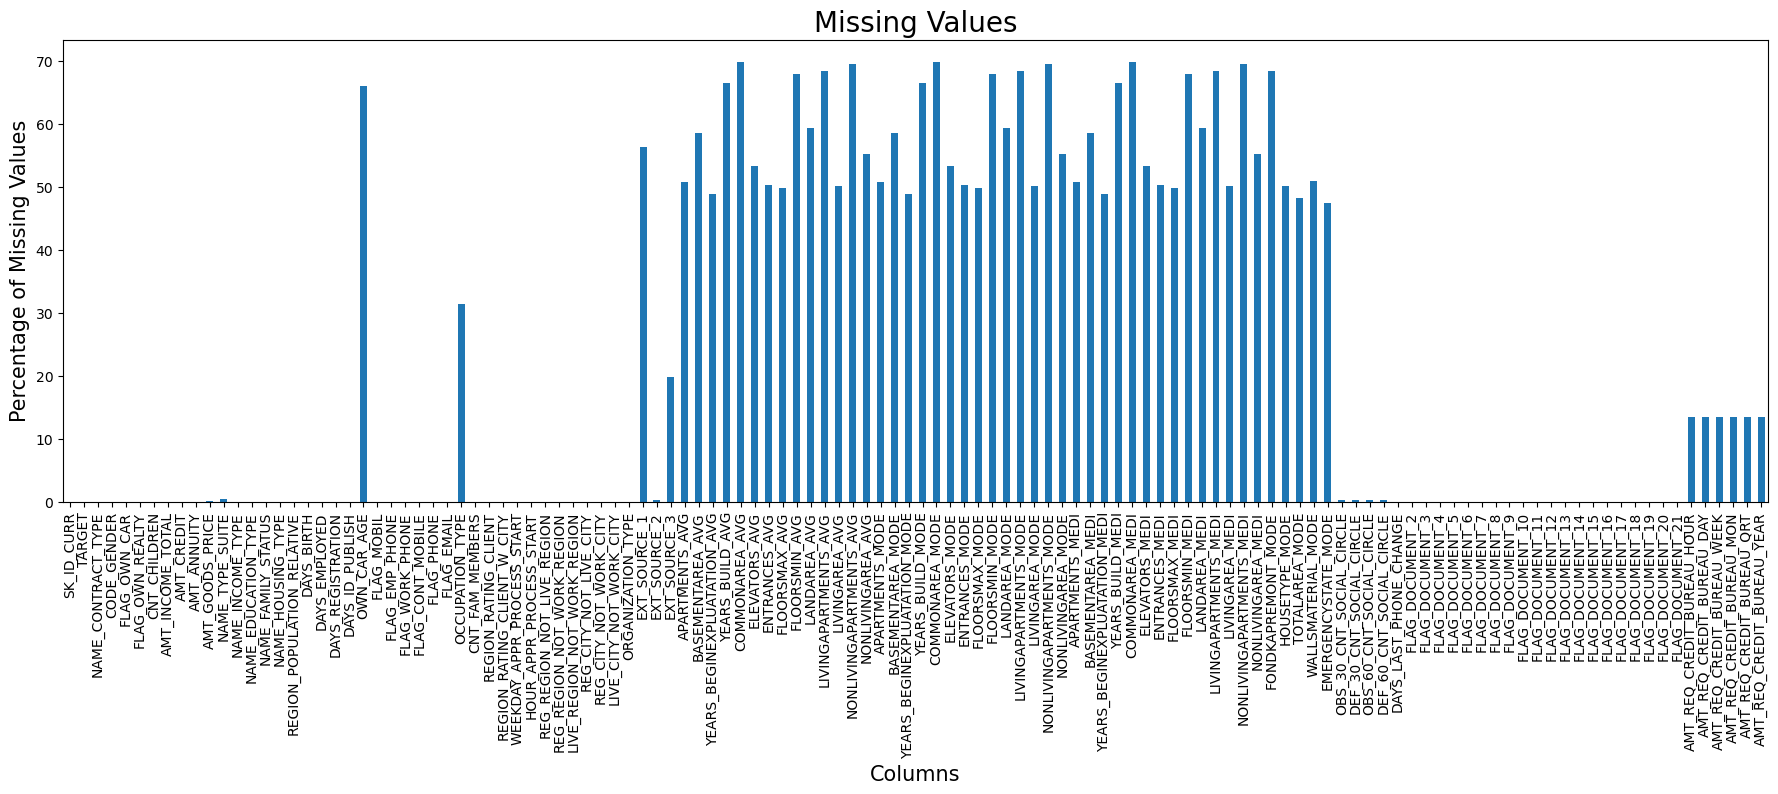

In [13]:
# Visulasing the Missing values of columns in graph

plt.figure(figsize = (22,6))
missing_values.plot.bar()
plt.title("Missing Values", fontsize=20)
plt.ylabel("Percentage of Missing Values", fontsize=15)
plt.xlabel('Columns', fontsize=15)
plt.show()

In [14]:
# List of columns having missing values 

missing_values = missing_values[missing_values>0]
missing_values

AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
OWN_CAR_AGE                     65.99
OCCUPATION_TYPE                 31.35
EXT_SOURCE_1                    56.38
EXT_SOURCE_2                     0.21
EXT_SOURCE_3                    19.83
APARTMENTS_AVG                  50.75
BASEMENTAREA_AVG                58.52
YEARS_BEGINEXPLUATATION_AVG     48.78
YEARS_BUILD_AVG                 66.50
COMMONAREA_AVG                  69.87
ELEVATORS_AVG                   53.30
ENTRANCES_AVG                   50.35
FLOORSMAX_AVG                   49.76
FLOORSMIN_AVG                   67.85
LANDAREA_AVG                    59.38
LIVINGAPARTMENTS_AVG            68.35
LIVINGAREA_AVG                  50.19
NONLIVINGAPARTMENTS_AVG         69.43
NONLIVINGAREA_AVG               55.18
APARTMENTS_MODE                 50.75
BASEMENTAREA_MODE               58.52
YEARS_BEGINEXPLUATATION_MODE    48.78
YEARS_BUILD_MODE                66.50
COMMONAREA_MODE                 69.87
ELEVATORS_MO

In [15]:
# List the columns having more than 50% missing values

cols_50_percent_missing_values = missing_values[missing_values >= 50]
cols_50_percent_missing_values

OWN_CAR_AGE                 65.99
EXT_SOURCE_1                56.38
APARTMENTS_AVG              50.75
BASEMENTAREA_AVG            58.52
YEARS_BUILD_AVG             66.50
COMMONAREA_AVG              69.87
ELEVATORS_AVG               53.30
ENTRANCES_AVG               50.35
FLOORSMIN_AVG               67.85
LANDAREA_AVG                59.38
LIVINGAPARTMENTS_AVG        68.35
LIVINGAREA_AVG              50.19
NONLIVINGAPARTMENTS_AVG     69.43
NONLIVINGAREA_AVG           55.18
APARTMENTS_MODE             50.75
BASEMENTAREA_MODE           58.52
YEARS_BUILD_MODE            66.50
COMMONAREA_MODE             69.87
ELEVATORS_MODE              53.30
ENTRANCES_MODE              50.35
FLOORSMIN_MODE              67.85
LANDAREA_MODE               59.38
LIVINGAPARTMENTS_MODE       68.35
LIVINGAREA_MODE             50.19
NONLIVINGAPARTMENTS_MODE    69.43
NONLIVINGAREA_MODE          55.18
APARTMENTS_MEDI             50.75
BASEMENTAREA_MEDI           58.52
YEARS_BUILD_MEDI            66.50
COMMONAREA_MED

In [16]:
cols_50_percent_missing_values.value_counts().sum()

41

In [17]:
df_app.shape

(307511, 122)

> <b>Deleting columns having missing values -</b>

I am deleting columns having 50% and more missing values to reduce the complexity, avoiding bias, improving the performance and focusing on the relevant information.

But it is not suggested to always delete the columns with missing values which may lead to data loss. Hence, in that case we will be imputing the missing values using the mean, mode or median values based on the specific characteristic of the data.


In [18]:
# Delete/Drop the columns having more than 50% missing values
df_app = df_app.drop(columns = cols_50_percent_missing_values.index)

In [19]:
df_app.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'YEARS_BEGINEXPLUATATION_AVG', 'FLOOR

In [20]:
df_app.shape

(307511, 81)

>checking missing values again

In [21]:
round((df_app.isnull().sum()/len(df_app))*100, 2)

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE                       0.00
FLAG_EMAIL  

>Now I have dealt with the >=50% null values, I will now take care of null values which are in less than <=13%. I won't be imputing the values, but will try to find values with which it can be imputed later

In [22]:
cols_13_percent_missing_values = missing_values[missing_values <= 13]
cols_13_percent_missing_values

AMT_GOODS_PRICE             0.09
NAME_TYPE_SUITE             0.42
EXT_SOURCE_2                0.21
OBS_30_CNT_SOCIAL_CIRCLE    0.33
DEF_30_CNT_SOCIAL_CIRCLE    0.33
OBS_60_CNT_SOCIAL_CIRCLE    0.33
DEF_60_CNT_SOCIAL_CIRCLE    0.33
dtype: float64

>As we can see there are few columns with percentage of null values >0 and <=13 and then among these the columns which have percentage of null values between 0-1 are very few. So, for these columns we can either drop them or impute them with mode value respectively.


>For columns having missing values around 13%, I will check them individually and determine what would be the best possible value to impute them with.

In [23]:
cols_15_percent_missing_values = missing_values[missing_values <= 15]
print("Number of columns with missing value <= 15% :", len(cols_15_percent_missing_values.index))
print(cols_15_percent_missing_values)

Number of columns with missing value <= 15% : 13
AMT_GOODS_PRICE                0.09
NAME_TYPE_SUITE                0.42
EXT_SOURCE_2                   0.21
OBS_30_CNT_SOCIAL_CIRCLE       0.33
DEF_30_CNT_SOCIAL_CIRCLE       0.33
OBS_60_CNT_SOCIAL_CIRCLE       0.33
DEF_60_CNT_SOCIAL_CIRCLE       0.33
AMT_REQ_CREDIT_BUREAU_HOUR    13.50
AMT_REQ_CREDIT_BUREAU_DAY     13.50
AMT_REQ_CREDIT_BUREAU_WEEK    13.50
AMT_REQ_CREDIT_BUREAU_MON     13.50
AMT_REQ_CREDIT_BUREAU_QRT     13.50
AMT_REQ_CREDIT_BUREAU_YEAR    13.50
dtype: float64


In [24]:
cols_15_percent_missing_values.index

Index(['AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'EXT_SOURCE_2',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

In [25]:
df_app[cols_15_percent_missing_values.index].nunique().sort_values(ascending=False)

EXT_SOURCE_2                  119831
AMT_GOODS_PRICE                 1002
OBS_30_CNT_SOCIAL_CIRCLE          33
OBS_60_CNT_SOCIAL_CIRCLE          33
AMT_REQ_CREDIT_BUREAU_YEAR        25
AMT_REQ_CREDIT_BUREAU_MON         24
AMT_REQ_CREDIT_BUREAU_QRT         11
DEF_30_CNT_SOCIAL_CIRCLE          10
DEF_60_CNT_SOCIAL_CIRCLE           9
AMT_REQ_CREDIT_BUREAU_DAY          9
AMT_REQ_CREDIT_BUREAU_WEEK         9
NAME_TYPE_SUITE                    7
AMT_REQ_CREDIT_BUREAU_HOUR         5
dtype: int64

>Observation 

Here, we can see that the first 2 variables, i.e, EXT_SOURCE_2, AMT_GOODS_PRICE are continuous variables as they have such high unique values and remaining are categorical variables given such less unique values.

<b> _Visualising Continuous variable_

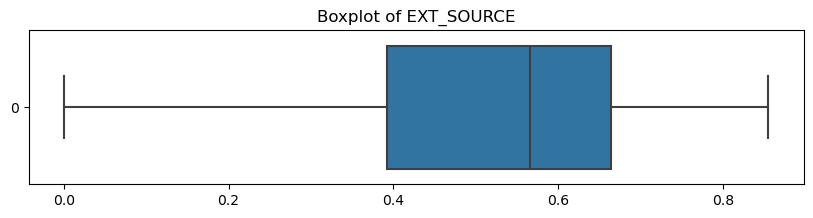

In [26]:
plt.figure(figsize=(10,2))
sns.boxplot(df_app['EXT_SOURCE_2'], orient='h')
plt.title('Boxplot of EXT_SOURCE', fontsize=12)
plt.show()

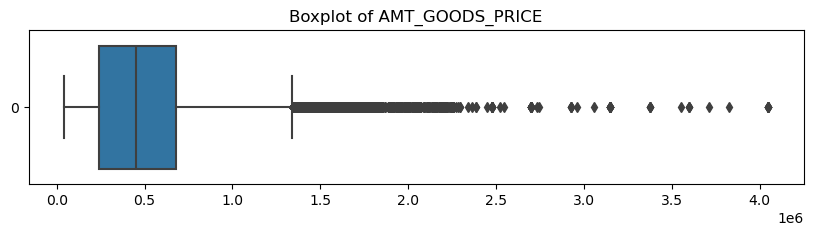

In [27]:
plt.figure(figsize=(10,2))
sns.boxplot(df_app['AMT_GOODS_PRICE'], orient='h')
plt.title('Boxplot of AMT_GOODS_PRICE', fontsize=12)
plt.show()

> Observation from Boxplots:

1. For 'EXT_SOURCE_2' - there are no outliers present. So data is rightly present.
2. For 'AMT_GOODS_PRICE' - there are outliers present in the data. so need to impute with median value.

In [28]:
df_app.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'YEARS_BEGINEXPLUATATION_AVG', 'FLOOR

>List and delete the columns which are not much relevant/needed for the analysis.

Suggestion - 

Syntax- df_app.drop(columns = irrelevant_cols, inplace=True)

In [29]:

irrelevant_cols = ['DAYS_REGISTRATION','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE',
                   'FLAG_PHONE','FLAG_EMAIL','WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','LIVE_REGION_NOT_WORK_REGION',
                   'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','DAYS_LAST_PHONE_CHANGE',
                  'OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE',
                  'NAME_TYPE_SUITE']
irrelevant_cols

['DAYS_REGISTRATION',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'DAYS_LAST_PHONE_CHANGE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'NAME_TYPE_SUITE']

In [30]:
#df_app.drop(columns = irrelevant_cols, inplace=True)

In [31]:
df_app.shape

(307511, 81)

<b>With this final dataframe for analysis, I will find the details of the variables to find out the insights

In [32]:
df_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 81 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nul

In [33]:
df_app.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH     FLAG_MOBIL  FLAG_EMP_PHONE  \
count      307511.000000    307511.000000  307511.000000   307511.000000   
mean        -4986.120328     -2994.202373       0.999997        0.819889   
std          3522.886321      1509.450419       0.001803        0.384280   
min        -24672.000000     -7197.000000       0.000000        0.000000   
25%         -7479.500000     -4299.000000       1.000000        1.000000   
50%         -4504.000000     -3254.000000       1.000000        1.000000   
75%         -2010.000000     -1720.000000       1.000000        1.000000   
max             0.000000         0.000000       1.000000        1.000000   

       FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE     FLAG_EMAIL  \
count    307511.000000     307511.000000  307511.000000  307511.000000   
mean          0.199368          0.998133       0.281066       0.056720   
std           0.399526          0.043164       0.449521       0.231307   
min           0.000000          0.000000       0.000000       0.000000   
25%           0.000000          1.000000       0.000000       0.000000   
50%           0.000000          1.000000       0.000000       0.000000   
75%           0.000000          1.000000       1.000000       0.000000   
max           1.000000          1.000000       1.000000       1.000000   

       CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
count    307509.000000         307511.000000                307511.000000   
mean          2.152665              2.052463                     2.031521   
std           0.910682              0.509034                     0.502737   
min           1.000000              1.000000                     1.000000   
25%           2.000000              2.000000                     2.000000   
50%           2.000000              2.000000                     2.000000   
75%           3.000000              2.000000                     2.000000   
max          20.000000              3.000000                     3.000000   

       HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
count            307511.000000               307511.000000   
mean                 12.063419                    0.015144   
std                   3.26583

<b>Check for the dtypes of each columns and change their dtype based on the values they contain

In [34]:
df_app.nunique().sort_values()

FLAG_DOCUMENT_3                      2
FLAG_PHONE                           2
FLAG_DOCUMENT_4                      2
FLAG_DOCUMENT_2                      2
REG_REGION_NOT_LIVE_REGION           2
REG_REGION_NOT_WORK_REGION           2
LIVE_REGION_NOT_WORK_REGION          2
REG_CITY_NOT_LIVE_CITY               2
REG_CITY_NOT_WORK_CITY               2
LIVE_CITY_NOT_WORK_CITY              2
FLAG_DOCUMENT_14                     2
FLAG_DOCUMENT_13                     2
FLAG_DOCUMENT_12                     2
FLAG_DOCUMENT_11                     2
FLAG_DOCUMENT_10                     2
FLAG_DOCUMENT_9                      2
FLAG_DOCUMENT_8                      2
FLAG_DOCUMENT_7                      2
EMERGENCYSTATE_MODE                  2
FLAG_DOCUMENT_6                      2
FLAG_CONT_MOBILE                     2
FLAG_WORK_PHONE                      2
FLAG_EMAIL                           2
FLAG_MOBIL                           2
TARGET                               2
NAME_CONTRACT_TYPE       

> <b>Observation 1 -></b>

We have 'XNA' value in the column 'CODE_GENDER' which means that the gender id not available. We can Imputate that value

In [35]:
df_app.CODE_GENDER.value_counts()

CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64

> <b>Solution to Observation 1 -></b>

The 'XNA' values are very low and the 'F' - Female values are majority. So, we can replace the XNA with gender 'F'

In [36]:
df_app.loc[df_app.CODE_GENDER == 'XNA', 'CODE_GENDER'] = 'F'

In [37]:
df_app.CODE_GENDER.value_counts()

CODE_GENDER
F    202452
M    105059
Name: count, dtype: int64

In [38]:
# Checking the 'CODE_GENDER'

df_app.CODE_GENDER.head(15)

0     M
1     F
2     M
3     F
4     M
5     M
6     F
7     M
8     F
9     M
10    F
11    F
12    F
13    M
14    F
Name: CODE_GENDER, dtype: object

In [39]:
df_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 81 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nul

> <b>Observation 2 -></b>

We can notice that <b>'DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH'</b> columns have negative values,which is not possible. so we will try to correct this

In [40]:
df_app.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   
2            -2531           1               1                1   
3            -2437           1               1                0   
4            -3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0             

In [41]:
df_app[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']].describe()

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH
count  307511.000000  307511.000000      307511.000000    307511.000000
mean   -16036.995067   63815.045904       -4986.120328     -2994.202373
std      4363.988632  141275.766519        3522.886321      1509.450419
min    -25229.000000  -17912.000000      -24672.000000     -7197.000000
25%    -19682.000000   -2760.000000       -7479.500000     -4299.000000
50%    -15750.000000   -1213.000000       -4504.000000     -3254.000000
75%    -12413.000000    -289.000000       -2010.000000     -1720.000000
max     -7489.000000  365243.000000           0.000000         0.000000

In [42]:
# negative values need to be converted to positive values

df_app.DAYS_BIRTH = df_app.DAYS_BIRTH.abs()
df_app.DAYS_EMPLOYED = df_app.DAYS_EMPLOYED.abs()
df_app.DAYS_REGISTRATION = df_app.DAYS_REGISTRATION.abs()
df_app.DAYS_ID_PUBLISH = df_app.DAYS_ID_PUBLISH.abs()

Check if the columns now have positive values

In [43]:
df_app[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']].describe()

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH
count  307511.000000  307511.000000      307511.000000    307511.000000
mean    16036.995067   67724.742149        4986.120328      2994.202373
std      4363.988632  139443.751806        3522.886321      1509.450419
min      7489.000000       0.000000           0.000000         0.000000
25%     12413.000000     933.000000        2010.000000      1720.000000
50%     15750.000000    2219.000000        4504.000000      3254.000000
75%     19682.000000    5707.000000        7479.500000      4299.000000
max     25229.000000  365243.000000       24672.000000      7197.000000

<b>Now check for dtypes of each columns and change their dtype based on the values they contain

In [44]:
df_app.nunique().sort_values()

FLAG_DOCUMENT_3                      2
FLAG_PHONE                           2
FLAG_DOCUMENT_4                      2
FLAG_DOCUMENT_2                      2
REG_REGION_NOT_LIVE_REGION           2
REG_REGION_NOT_WORK_REGION           2
LIVE_REGION_NOT_WORK_REGION          2
REG_CITY_NOT_LIVE_CITY               2
REG_CITY_NOT_WORK_CITY               2
LIVE_CITY_NOT_WORK_CITY              2
FLAG_DOCUMENT_14                     2
FLAG_DOCUMENT_13                     2
FLAG_DOCUMENT_12                     2
FLAG_DOCUMENT_11                     2
FLAG_DOCUMENT_10                     2
FLAG_DOCUMENT_9                      2
FLAG_DOCUMENT_8                      2
FLAG_DOCUMENT_7                      2
EMERGENCYSTATE_MODE                  2
FLAG_DOCUMENT_6                      2
FLAG_CONT_MOBILE                     2
FLAG_WORK_PHONE                      2
FLAG_EMAIL                           2
FLAG_MOBIL                           2
TARGET                               2
NAME_CONTRACT_TYPE       

> <b>Observation -></b>

We notice that till <b>'ORGANIZATION_TYPE'</b> all variables are categorical type. So, I will get their index and convert them to categorical columns.

In [45]:
df_app.nunique().sort_values().index

Index(['FLAG_DOCUMENT_3', 'FLAG_PHONE', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_2',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_11',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_7', 'EMERGENCYSTATE_MODE', 'FLAG_DOCUMENT_6',
       'FLAG_CONT_MOBILE', 'FLAG_WORK_PHONE', 'FLAG_EMAIL', 'FLAG_MOBIL',
       'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'FLAG_DOCUMENT_21', 'FLAG_DOCUMENT_20',
       'FLAG_EMP_PHONE', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
       'FLAG_DOCUMENT_18', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'NAME_EDUCATION_TYPE', 'NAME_HOUSING_TYPE', 

In [46]:
cat_cols = ['REG_REGION_NOT_LIVE_REGION', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_17',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_13', 'EMERGENCYSTATE_MODE', 'REG_REGION_NOT_WORK_REGION',
       'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_OWN_CAR',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'TARGET', 'FLAG_DOCUMENT_21',
       'NAME_CONTRACT_TYPE', 'FLAG_OWN_REALTY', 'CODE_GENDER',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'NAME_EDUCATION_TYPE',
       'NAME_HOUSING_TYPE', 'NAME_FAMILY_STATUS', 'NAME_INCOME_TYPE',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'CNT_CHILDREN', 'CNT_FAM_MEMBERS',
       'OCCUPATION_TYPE']

for col in cat_cols:
    df_app[col] = df_app[col].astype('category')

> <b>Observation -></b>

'SK_ID_CURR' is int data type, but it holds id of loan, and this variable cannot be manipulated; so we will convert it to object datatype

In [47]:
df_app['SK_ID_CURR'] = df_app['SK_ID_CURR'].astype('object')

Checking data types to confirm:

In [48]:
df_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 81 columns):
 #   Column                        Non-Null Count   Dtype   
---  ------                        --------------   -----   
 0   SK_ID_CURR                    307511 non-null  object  
 1   TARGET                        307511 non-null  category
 2   NAME_CONTRACT_TYPE            307511 non-null  category
 3   CODE_GENDER                   307511 non-null  category
 4   FLAG_OWN_CAR                  307511 non-null  category
 5   FLAG_OWN_REALTY               307511 non-null  category
 6   CNT_CHILDREN                  307511 non-null  category
 7   AMT_INCOME_TOTAL              307511 non-null  float64 
 8   AMT_CREDIT                    307511 non-null  float64 
 9   AMT_ANNUITY                   307499 non-null  float64 
 10  AMT_GOODS_PRICE               307233 non-null  float64 
 11  NAME_TYPE_SUITE               306219 non-null  object  
 12  NAME_INCOME_TYPE              

Converting the rest to numerical columns

In [49]:
num_col=['CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','REGION_POPULATION_RELATIVE',
                 'DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','HOUR_APPR_PROCESS_START',
                 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
                'DAYS_LAST_PHONE_CHANGE']

df_app[num_col] = df_app[num_col].apply(pd.to_numeric)
df_app.head(10)

SK_ID_CURR TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0     100002      1         Cash loans           M            N   
1     100003      0         Cash loans           F            N   
2     100004      0    Revolving loans           M            Y   
3     100006      0         Cash loans           F            N   
4     100007      0         Cash loans           M            N   
5     100008      0         Cash loans           M            N   
6     100009      0         Cash loans           F            Y   
7     100010      0         Cash loans           M            Y   
8     100011      0         Cash loans           F            N   
9     100012      0    Revolving loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   
5               Y             0           99000.0    490495.5      27517.5   
6               Y             1          171000.0   1560726.0      41301.0   
7               Y             0          360000.0   1530000.0      42075.0   
8               Y             0          112500.0   1019610.0      33826.5   
9               Y             0          135000.0    405000.0      20250.0   

   AMT_GOODS_PRICE  NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0         351000.0    Unaccompanied               Working   
1        1129500.0           Family         State servant   
2         135000.0    Unaccompanied               Working   
3         297000.0    Unaccompanied               Working   
4         513000.0    Unaccompanied               Working   
5         454500.0  Spouse, partner         State servant   
6        1395000.0    Unaccompanied  Commercial associate   
7        1530000.0    Unaccompanied         State servant   
8         913500.0         Children             Pensioner   
9         405000.0    Unaccompanied               Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   
5  Secondary / secondary special               Married  House / apartment   
6               Higher education               Married  House / apartment   
7               Higher education               Married  House / apartment   
8  Secondary / secondary special               Married  House / apartment   
9  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461            637             3648.0   
1                    0.003541       16765           1188             1186.0   
2                    0.010032       19046            225             4260.0   
3                    0.008019       19005           3039             9833.0   
4                    0.028663       19932           3038             4311.0   
5                    0.035792       16941           1588             4970.0   
6                    0.035792       13778           3130             1213.0   
7                    0.003122       18850            449             4597.0   
8                    0.018634       20099         365243             7427.0   
9                    0.019689       14469           2019            14437.0   

   DAYS_ID_PUBL

In [50]:
# Check dtypes to confirm

df_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 81 columns):
 #   Column                        Non-Null Count   Dtype   
---  ------                        --------------   -----   
 0   SK_ID_CURR                    307511 non-null  object  
 1   TARGET                        307511 non-null  category
 2   NAME_CONTRACT_TYPE            307511 non-null  category
 3   CODE_GENDER                   307511 non-null  category
 4   FLAG_OWN_CAR                  307511 non-null  category
 5   FLAG_OWN_REALTY               307511 non-null  category
 6   CNT_CHILDREN                  307511 non-null  int64   
 7   AMT_INCOME_TOTAL              307511 non-null  float64 
 8   AMT_CREDIT                    307511 non-null  float64 
 9   AMT_ANNUITY                   307499 non-null  float64 
 10  AMT_GOODS_PRICE               307233 non-null  float64 
 11  NAME_TYPE_SUITE               306219 non-null  object  
 12  NAME_INCOME_TYPE              

<b>Now check the 'AMT_INCOME_TOTAL' and 'AMT_CREDIT' variables</b>

In [51]:
df_app[['AMT_INCOME_TOTAL', 'AMT_CREDIT']].describe()

AMT_INCOME_TOTAL    AMT_CREDIT
count      3.075110e+05  3.075110e+05
mean       1.687979e+05  5.990260e+05
std        2.371231e+05  4.024908e+05
min        2.565000e+04  4.500000e+04
25%        1.125000e+05  2.700000e+05
50%        1.471500e+05  5.135310e+05
75%        2.025000e+05  8.086500e+05
max        1.170000e+08  4.050000e+06

## <b> _BINNING_

> <b>From Above Observation -></b>

1. We can see that these values ('AMT_INCOME_TOTAL' and 'AMT_CREDIT') are continuous, making it difficult to determine the type of customers.
Therefore, for easy understanding, I will make 2 new columns for these dividing them into categories.

In [52]:
bins = [0,100000,250000,500000,750000,1000000, 1250000, 1500000, 1750000, 2000000, 2250000,2500000,
        2750000,3000000,3250000,3500000, 3750000]

ranges = ['0-100000','100000-250000','250000-500000','500000-750000','750000-1000000', '1000000-1250000',
          '1250000-1500000','1500000-1750000','1750000-2000000','2000000-2250000','2250000-2500000',
          '2500000-2750000','2750000-3000000','3000000-3250000','3250000-3500000','3500000 and above']

In [53]:
df_app['AMT_INCOME_RANGE'] = pd.cut(df_app['AMT_INCOME_TOTAL'],bins,labels=ranges)
df_app['AMT_CREDIT_RANGE'] = pd.cut(df_app['AMT_CREDIT'],bins,labels=ranges)

In [54]:
df_app.head()

SK_ID_CURR TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0     100002      1         Cash loans           M            N   
1     100003      0         Cash loans           F            N   
2     100004      0    Revolving loans           M            Y   
3     100006      0         Cash loans           F            N   
4     100007      0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461            637             3648.0   
1                    0.003541       16765           1188             1186.0   
2                    0.010032       19046            225             4260.0   
3                    0.008019       19005           3039             9833.0   
4                    0.028663       19932           3038             4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             2120           1               1                0   
1              291           1               1                0   
2             2531           1               1                1   
3             2437           1               1                0   
4             3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers             1.0   
1                 1           1           0      Core staff             2.0   
2                 1           1           0        Laborers             1.0   
3                 1           0           0        Laborers             2.0   
4                 1           0           0      Core staff             1.0   

  REGION_RATING_CLIENT REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                    2                           2                  WEDNESDAY   
1                    1                           1                     MONDAY   
2                    2                           2                     MONDAY   
3                    2                           2                  WEDNESDAY   
4                    2                           2                   THURSDAY   

   HOUR_APPR_PROCESS_START REG_REGION_NOT_LIVE_REGION  \
0                       10                          0   
1                       11                          0   
2                        9                          0   
3                       17                          0   
4                       11                          0   

  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                          0                            0   
1                          0   

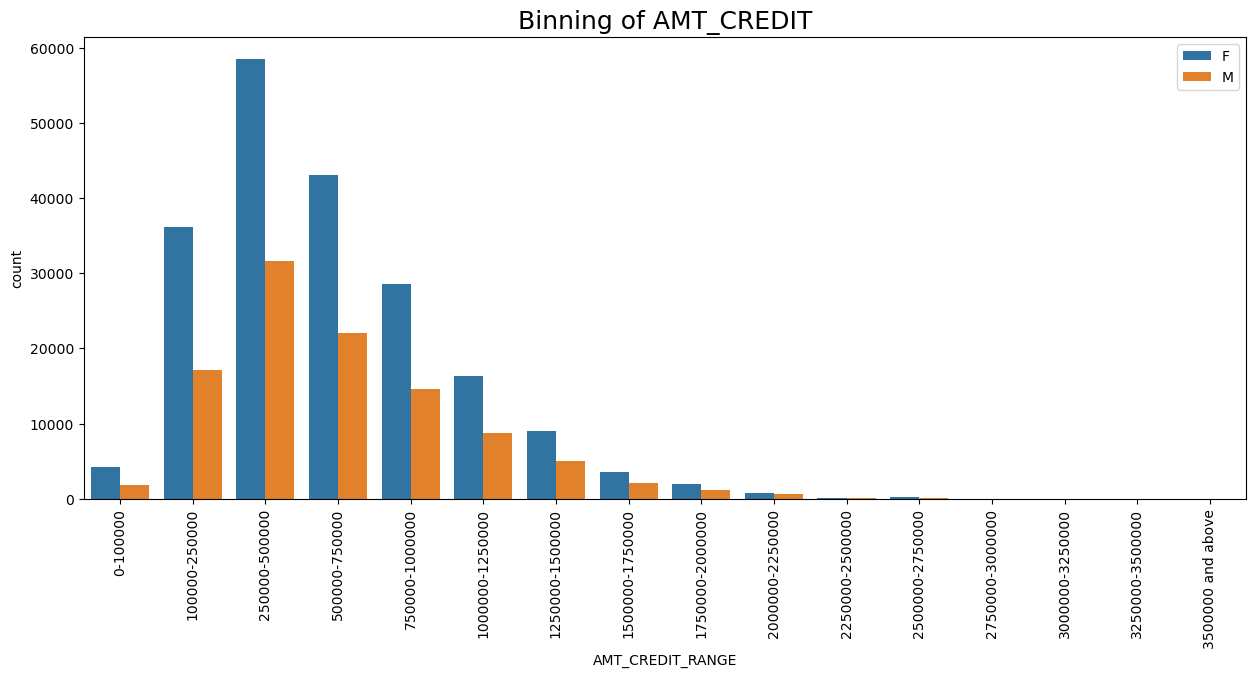

In [55]:
# Plot for AMT_CREDIT_RANGE

plt.figure(figsize=(15,6)) 
sns.countplot(data=df_app,x='AMT_CREDIT_RANGE', hue='CODE_GENDER')
plt.xticks(rotation=90)
plt.legend(loc='upper right')
plt.title('Binning of AMT_CREDIT', fontsize=18)
plt.show()

> <b>Observation -></b>

Now, from the above graph, we can say that - 
1. Female counts are higher than Male counts.
2. The credit range from 250000 - 500000 have more number of counts.
3. Very less count for credit range from 1250000 and above.

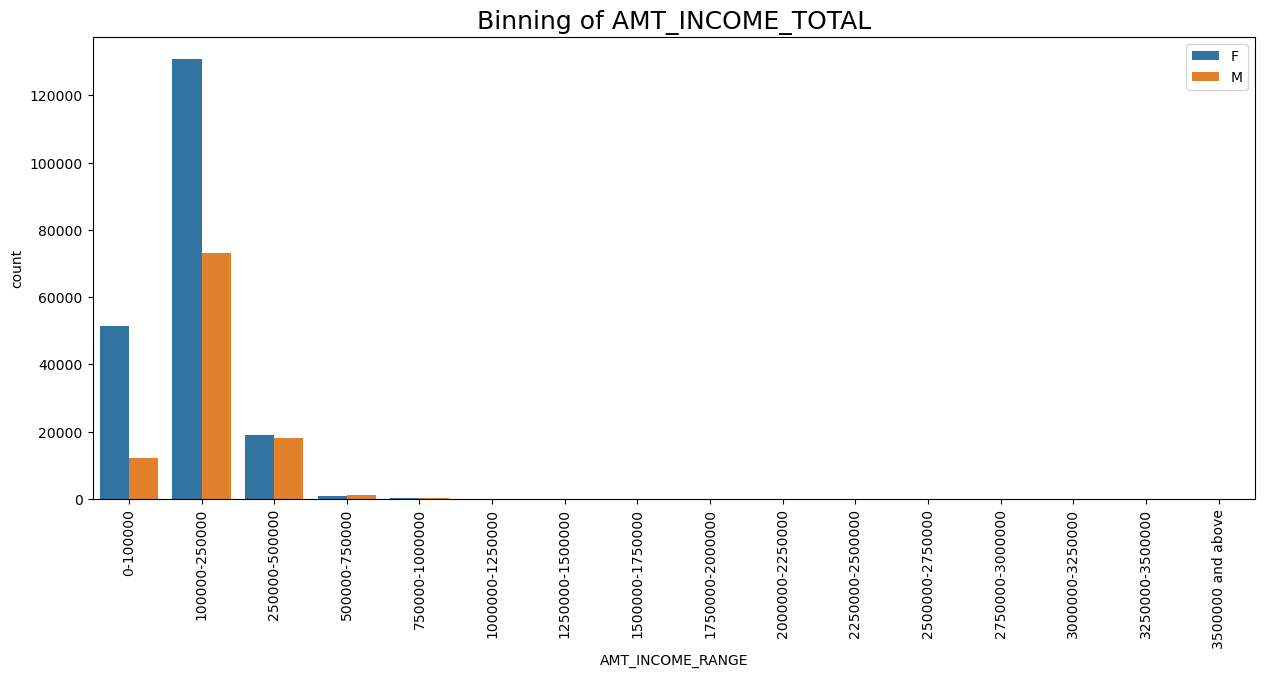

In [56]:
# plot for AMT_INCOME_RANGE

plt.figure(figsize=(15,6)) 
sns.countplot(data=df_app,x='AMT_INCOME_RANGE', hue='CODE_GENDER')
plt.xticks(rotation=90)
plt.legend(loc='upper right')
plt.title('Binning of AMT_INCOME_TOTAL', fontsize=18)
plt.show()

> Observation ->
1. For the Income Range '100000 - 250000', Females have the highest count.
2. The counts start decreasing from the income range 250000 and above.

2. Binning 'DAYS_BIRTH' column - convert it to years based on various 'AGE_GROUP'

In [57]:
df_app['DAYS_BIRTH'] = (df_app['DAYS_BIRTH']/365).astype(int)
df_app['DAYS_BIRTH'].unique()

array([25, 45, 52, 54, 46, 37, 51, 55, 39, 27, 36, 38, 23, 35, 26, 48, 31,
       50, 40, 30, 68, 43, 28, 41, 32, 33, 47, 57, 65, 44, 64, 21, 59, 49,
       56, 62, 53, 42, 29, 67, 63, 61, 58, 60, 34, 22, 24, 66, 69, 20])

In [58]:
df_app['AGE_GROUP'] =pd.cut(df_app['DAYS_BIRTH'], bins=[19, 35, 60, 100], labels = ['Young','Middle_Age','Senior_citizen'])

In [59]:
df_app[['DAYS_BIRTH','AGE_GROUP']].head()

DAYS_BIRTH   AGE_GROUP
0          25       Young
1          45  Middle_Age
2          52  Middle_Age
3          52  Middle_Age
4          54  Middle_Age

In [60]:
df_app[['DAYS_BIRTH','AGE_GROUP']].tail()

DAYS_BIRTH   AGE_GROUP
307506          25       Young
307507          56  Middle_Age
307508          41  Middle_Age
307509          32       Young
307510          46  Middle_Age

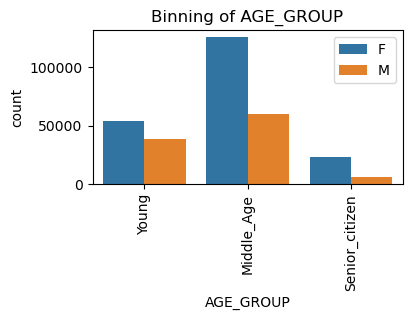

In [61]:
# Plot for AGE_GROUP

plt.figure(figsize=(4,2)) 
sns.countplot(data=df_app,x='AGE_GROUP', hue='CODE_GENDER')
plt.xticks(rotation=90)
plt.legend(loc='upper right')
plt.title('Binning of AGE_GROUP', fontsize=12)
plt.show()

> <b>Observation - </b>
1. There are more number of 'Females' than 'Males' in all age group.
2. Clients from the 'Middle Age' group are more in number and Clients who belong to 'Senior Citizen' group are less.

3. Binning Income Group

In [62]:
df_app['AMT_INCOME_TOTAL'].describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [63]:
# Defining a function for grouping the AMT_INCOME_TOTAL into Low, Medium and High

def income_group(x):
    if (x < 100000):
        return 'Low'
    elif(x >= 100000 and x < 150000):
        return 'Medium'
    else:
        return 'High'

In [64]:
df_app['INCOME_GROUP'] = df_app['AMT_INCOME_TOTAL'].apply(income_group)
df_app.head()

SK_ID_CURR TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0     100002      1         Cash loans           M            N   
1     100003      0         Cash loans           F            N   
2     100004      0    Revolving loans           M            Y   
3     100006      0         Cash loans           F            N   
4     100007      0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801          25            637             3648.0   
1                    0.003541          45           1188             1186.0   
2                    0.010032          52            225             4260.0   
3                    0.008019          52           3039             9833.0   
4                    0.028663          54           3038             4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             2120           1               1                0   
1              291           1               1                0   
2             2531           1               1                1   
3             2437           1               1                0   
4             3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers             1.0   
1                 1           1           0      Core staff             2.0   
2                 1           1           0        Laborers             1.0   
3                 1           0           0        Laborers             2.0   
4                 1           0           0      Core staff             1.0   

  REGION_RATING_CLIENT REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                    2                           2                  WEDNESDAY   
1                    1                           1                     MONDAY   
2                    2                           2                     MONDAY   
3                    2                           2                  WEDNESDAY   
4                    2                           2                   THURSDAY   

   HOUR_APPR_PROCESS_START REG_REGION_NOT_LIVE_REGION  \
0                       10                          0   
1                       11                          0   
2                        9                          0   
3                       17                          0   
4                       11                          0   

  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                          0                            0   
1                          0   

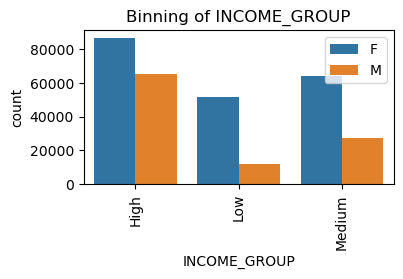

In [65]:
# Plot for INCOME_GROUP

plt.figure(figsize=(4,2)) 
sns.countplot(data=df_app,x='INCOME_GROUP', hue='CODE_GENDER')
plt.xticks(rotation=90)
plt.legend(loc='upper right')
plt.title('Binning of INCOME_GROUP', fontsize=12)
plt.show()

><b>Observation -</b>
1. Clients who are 'Females' are more in number than 'Males' in all income group.
2. Clients with 'High Income' are more in number and Clients with 'Low Income' are less in number.

### <b> _CHECKING FOR OUTLIERS_ </b>

In [66]:
df_app.describe()

CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT    AMT_ANNUITY  \
count  307511.000000      3.075110e+05  3.075110e+05  307499.000000   
mean        0.417052      1.687979e+05  5.990260e+05   27108.573909   
std         0.722121      2.371231e+05  4.024908e+05   14493.737315   
min         0.000000      2.565000e+04  4.500000e+04    1615.500000   
25%         0.000000      1.125000e+05  2.700000e+05   16524.000000   
50%         0.000000      1.471500e+05  5.135310e+05   24903.000000   
75%         1.000000      2.025000e+05  8.086500e+05   34596.000000   
max        19.000000      1.170000e+08  4.050000e+06  258025.500000   

       AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE     DAYS_BIRTH  \
count     3.072330e+05               307511.000000  307511.000000   
mean      5.383962e+05                    0.020868      43.435968   
std       3.694465e+05                    0.013831      11.954593   
min       4.050000e+04                    0.000290      20.000000   
25%       2.385000e+05                    0.010006      34.000000   
50%       4.500000e+05                    0.018850      43.000000   
75%       6.795000e+05                    0.028663      53.000000   
max       4.050000e+06                    0.072508      69.000000   

       DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH     FLAG_MOBIL  \
count  307511.000000      307511.000000    307511.000000  307511.000000   
mean    67724.742149        4986.120328      2994.202373       0.999997   
std    139443.751806        3522.886321      1509.450419       0.001803   
min         0.000000           0.000000         0.000000       0.000000   
25%       933.000000        2010.000000      1720.000000       1.000000   
50%      2219.000000        4504.000000      3254.000000       1.000000   
75%      5707.000000        7479.500000      4299.000000       1.000000   
max    365243.000000       24672.000000      7197.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  HOUR_APPR_PROCESS_START  LIVE_REGION_NOT_WORK_REGION  \
count  307511.000000            307511.000000                307511.000000   
mean        0.056720                12.063419                     0.040659   
std         0.231307                 3.265832                     0.197499   
min         0.000000                 0.000000                     0.000000   
25%         0.000000                10.000000                     0.000000   
50%         0.000000                12.000000                     0.000000   
75%         0.000000                14.000000                     0.000000   
max         1.000000                23.000000                     1.000000   

       REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
count           307511.000000           307511.000000   
mean                 0.078173                0.230454   
std                  0.268444                0.421124   
min                  0.000000                0.000000   
25%                  0.000000                0.000000   
50%                  0.000000                0.000000   
75%                  0.000000                0.000000   
max                  1.000000                1.000000   

       LIVE_CITY_NOT_WORK_CITY  EXT_SOURCE_2   EXT_SOURCE_3  \
count            307511.000000  3.068510e+05  246546.000000   
mean                  0.179555  5.143927e-01       

As viewed from the describe, the below variables have the outliers-

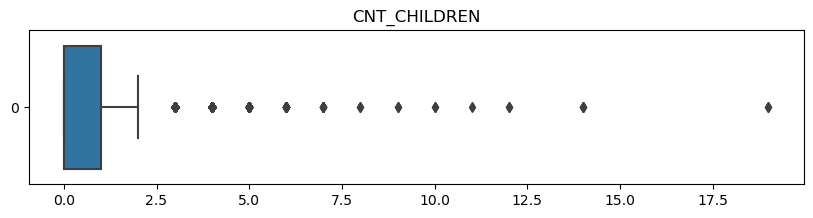

In [67]:
# 'CNT_CHILDREN' variable indicates Number of children the client has.

plt.figure(figsize=(10,2))
sns.boxplot(df_app['CNT_CHILDREN'], orient='h')
plt.title('CNT_CHILDREN', fontsize=12)
plt.show()

>Observations -

- From the plot, we can see that count of number of children goes more than 17.5, which is not possible in general case scenario.
Hence, this variable has an outlier.

- We can also notice that the 1st Quartile is missing for 'CNT_CHILDREN'. Hence, we can say that most of the data is present in the 1st quartile.

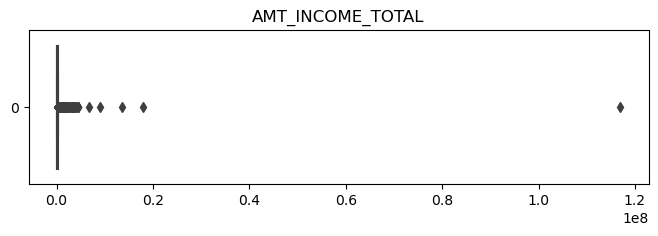

In [68]:
# 'AMT_INCOME_TOTAL' variable indictes the Income of the client.

plt.figure(figsize = (8,2))
sns.boxplot(df_app['AMT_INCOME_TOTAL'], orient = 'h')
plt.title('AMT_INCOME_TOTAL', fontsize=12)
plt.show()

>Observations -

- From the plot, we can see that there is only one value which is too high compared to others.
Hence, an outlier.

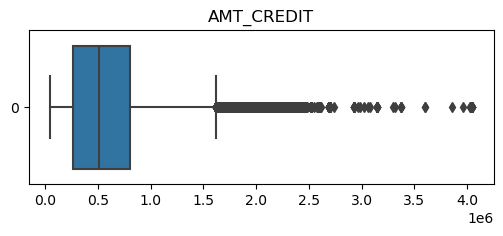

In [69]:
# 'AMT_CREDIT' variable indicates Credit amount of the loan

plt.figure(figsize = (6,2))
sns.boxplot(df_app['AMT_CREDIT'], orient='h')
plt.title('AMT_CREDIT', fontsize=12)
plt.show()

>Observations - 

This variable has more outliers

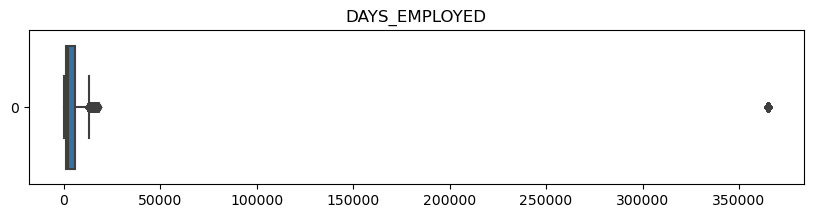

In [70]:
# this variable indicates How many days before the application the person started current employment

plt.figure(figsize = (10,2))
sns.boxplot(df_app['DAYS_EMPLOYED'], orient='h')
plt.title('DAYS_EMPLOYED', fontsize=12)
plt.show()

> Observation - 

From the above plot, we can see that this variable has an outlier

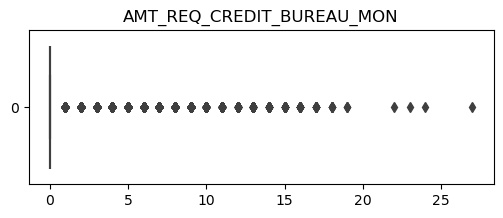

In [71]:
# this variable indicates Number of enquiries to Credit Bureau about the client one month before 
# application (excluding one week before application)

plt.figure(figsize = (6,2))
sns.boxplot(df_app['AMT_REQ_CREDIT_BUREAU_MON'], orient='h')
plt.title('AMT_REQ_CREDIT_BUREAU_MON',fontsize=12)
plt.show()

>Observation - We can see many outliers present

<b>_Dealing with Outliers -_</b>

Finding outliers in all the numerical columns with 1.5 IQR rule and removing the outlier records 

outlier_col = ['AMT_INCOME_TOTAL','AMT_CREDIT']

for col in outlier_col: 

    q1 = df_app[col].quantile(0.25)
    
    q3 = df_app[col].quantile(0.75)
    
    iqr = q3-q1
    
    range_low  = q1-1.5*iqr
    
    range_high = q3+1.5*iqr
    
    df_app = df_app.loc[(df_app[col] > range_low) & (df_app[col] < range_high)]
    


## <b> _ANALYSIS_</b>

I will divide the application dataset into 2 different dataframes based on the target variable's values.

"app_target0" and "app_target1" for values 0 and 1 respectively

- "app_target0" -> Non-Defaulters -> client without payment difficulties
- "app_target1" -> Defaulters -> client with payment difficulties

## <b> Checking for Imbalance of data

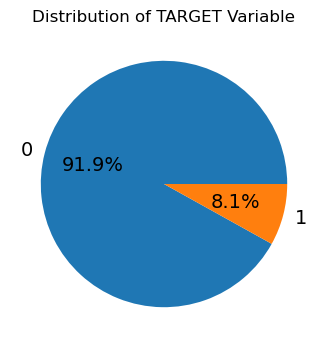

In [72]:
# Checking distribution of "TARGET" variable

target_type_counts = df_app['TARGET'].value_counts()
plt.figure(figsize = (6,4))
plt.pie(target_type_counts, labels=target_type_counts.index, autopct='%1.1f%%', textprops={'fontsize': 14})
plt.title("Distribution of TARGET Variable")
plt.show()

In [73]:
df_app['TARGET'].value_counts()

TARGET
0    282686
1     24825
Name: count, dtype: int64

In [74]:
# Creating the dataframe -

app_target0 = df_app.loc[df_app.TARGET == 0]
app_target1 = df_app.loc[df_app.TARGET == 1]


In [75]:
app_target0.head()

SK_ID_CURR TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
1     100003      0         Cash loans           F            N   
2     100004      0    Revolving loans           M            Y   
3     100006      0         Cash loans           F            N   
4     100007      0         Cash loans           M            N   
5     100008      0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   
5               Y             0           99000.0    490495.5      27517.5   

   AMT_GOODS_PRICE  NAME_TYPE_SUITE NAME_INCOME_TYPE  \
1        1129500.0           Family    State servant   
2         135000.0    Unaccompanied          Working   
3         297000.0    Unaccompanied          Working   
4         513000.0    Unaccompanied          Working   
5         454500.0  Spouse, partner    State servant   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   
5  Secondary / secondary special               Married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
1                    0.003541          45           1188             1186.0   
2                    0.010032          52            225             4260.0   
3                    0.008019          52           3039             9833.0   
4                    0.028663          54           3038             4311.0   
5                    0.035792          46           1588             4970.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
1              291           1               1                0   
2             2531           1               1                1   
3             2437           1               1                0   
4             3458           1               1                0   
5              477           1               1                1   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE CNT_FAM_MEMBERS  \
1                 1           1           0      Core staff             2.0   
2                 1           1           0        Laborers             1.0   
3                 1           0           0        Laborers             2.0   
4                 1           0           0      Core staff             1.0   
5                 1           1           0        Laborers             2.0   

  REGION_RATING_CLIENT REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
1                    1                           1                     MONDAY   
2                    2                           2                     MONDAY   
3                    2                           2                  WEDNESDAY   
4                    2                           2                   THURSDAY   
5                    2                           2                  WEDNESDAY   

   HOUR_APPR_PROCESS_START REG_REGION_NOT_LIVE_REGION  \
1                       11                          0   
2                        9                          0   
3                       17                          0   
4                       11                          0   
5                       16                          0   

  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
1                          0                            0   
2                        

In [76]:
app_target1.head()

SK_ID_CURR TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002      1         Cash loans           M            N   
26     100031      1         Cash loans           F            N   
40     100047      1         Cash loans           M            N   
42     100049      1         Cash loans           F            N   
81     100096      1         Cash loans           F            N   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                Y             0          202500.0    406597.5      24700.5   
26               Y             0          112500.0    979992.0      27076.5   
40               Y             0          202500.0   1193580.0      35028.0   
42               N             0          135000.0    288873.0      16258.5   
81               Y             0           81000.0    252000.0      14593.5   

    AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0          351000.0   Unaccompanied               Working   
26         702000.0   Unaccompanied               Working   
40         855000.0   Unaccompanied  Commercial associate   
42         238500.0   Unaccompanied               Working   
81         252000.0   Unaccompanied             Pensioner   

              NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0   Secondary / secondary special  Single / not married  House / apartment   
26  Secondary / secondary special                 Widow  House / apartment   
40  Secondary / secondary special               Married  House / apartment   
42  Secondary / secondary special        Civil marriage  House / apartment   
81  Secondary / secondary special               Married  House / apartment   

    REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                     0.018801          25            637             3648.0   
26                    0.018029          51           2628             6573.0   
40                    0.025164          47           1262             1182.0   
42                    0.007305          36           3597               45.0   
81                    0.028663          67         365243             5391.0   

    DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0              2120           1               1                0   
26             1827           1               1                0   
40             1029           1               1                0   
42             4409           1               1                1   
81             4199           1               0                0   

    FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE CNT_FAM_MEMBERS  \
0                  1           1           0        Laborers             1.0   
26                 1           0           0   Cooking staff             1.0   
40                 1           0           0        Laborers             2.0   
42                 1           1           0     Sales staff             2.0   
81                 1           0           0             NaN             2.0   

   REGION_RATING_CLIENT REGION_RATING_CLIENT_W_CITY  \
0                     2                           2   
26                    3                           2   
40                    2                           2   
42                    3                           3   
81                    2                           2   

   WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                   WEDNESDAY                       10   
26                     MONDAY                        9   
40                    TUESDAY                        9   
42                   THURSDAY                       11   
81                   THURSDAY                       10   

   REG_REGION_NOT_LIVE_REGION REG_REGION_NOT_WORK_REGION  \
0                           0                          0   
26                          0                          0   
40                          0                       

In [77]:
app_target0.shape

(282686, 85)

In [78]:
app_target1.shape

(24825, 85)

## <b> _Calculating Imbalance percentage -_</b>

Since the majority is app_target0 and minority is app_target1

In [79]:
imb = round(len(app_target0)/len(app_target1),2)
print("imbalance ratio: ", imb)

imbalance ratio:  11.39


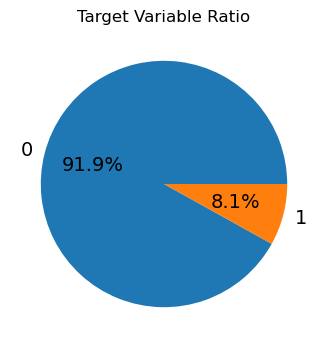

In [80]:
target_type_counts = df_app['TARGET'].value_counts()
plt.figure(figsize=(6, 4))
plt.pie(target_type_counts, labels=target_type_counts.index, autopct='%1.1f%%', textprops={'fontsize': 14})
plt.title("Target Variable Ratio")
plt.show()

>Observation -

From the imbalance ratio 'imb', we can say that the ratio is in 11.39 : 1 ratio. This indicates that for every 1, there is almost 11 number of 0's. This is a highly imbalanced dataset.

### <b> _Checking Imbalance for few other columns_ </b>

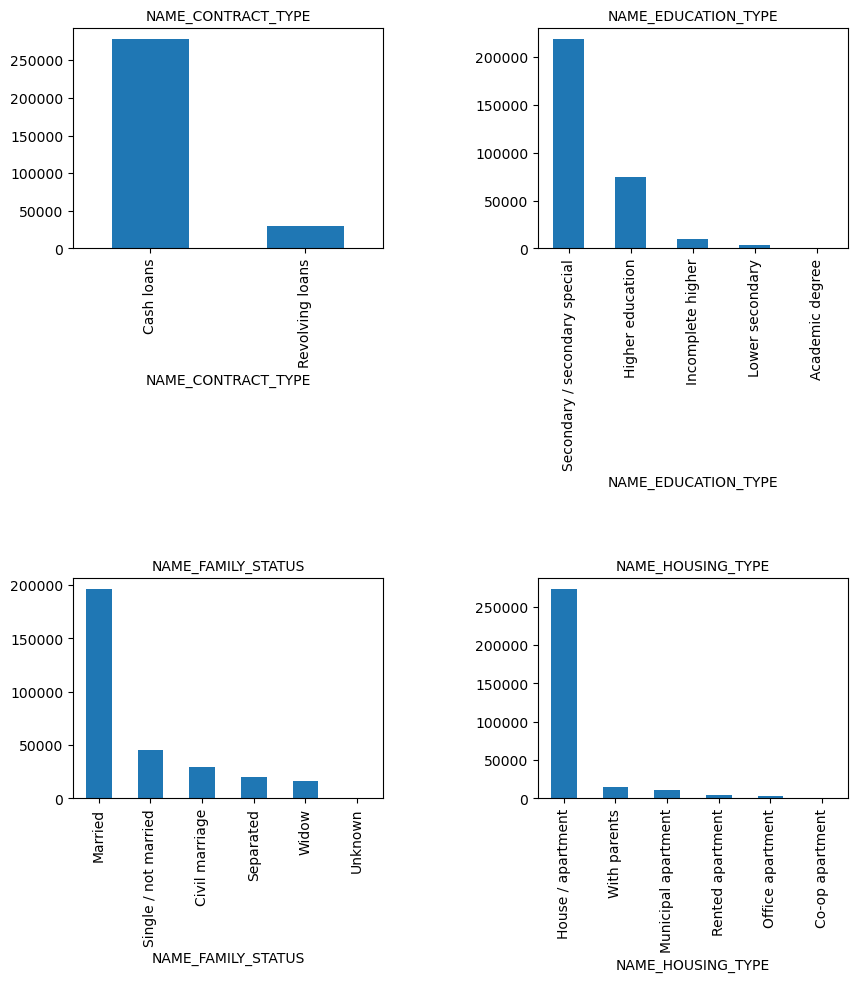

In [81]:
col_list = ['NAME_CONTRACT_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE']
k=0
plt.figure(figsize=(10,10))
for col in col_list:    
    k=k+1
    plt.subplot(2, 2,k)   
    df_app[col].value_counts().plot(kind='bar');
    plt.title(col, fontsize=10)
    plt.xticks(rotation=90, fontsize=10)
    plt.yticks(rotation=360, fontsize=10)
    
    
# Adjusting space between the plots
plt.subplots_adjust(wspace=0.5, hspace=1.5)

plt.show()

><b>Observations - </b>
1. NAME_CONTRACT_TYPE - There are very few 'Revolving loans' than 'Cash loans'.
2. NAME_EDUCATION_TYPE - Most of the loans are applied by 'Secondary/Secondary special' educated people
3. NAME_FAMILY_STATUS - Most of the loans are applied by 'Married' people.
4. NAME_HOUSING_TYPE - Most of the application came from 'Home/appartment' owner.

# <B> _ANALYSIS_

## <b>_Correlation between the target dataframes -_</b>

In [82]:
# Few columns related for correlation matrix

corr_cols = ['CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_EMPLOYED','CNT_FAM_MEMBERS','EXT_SOURCE_2','EXT_SOURCE_3']

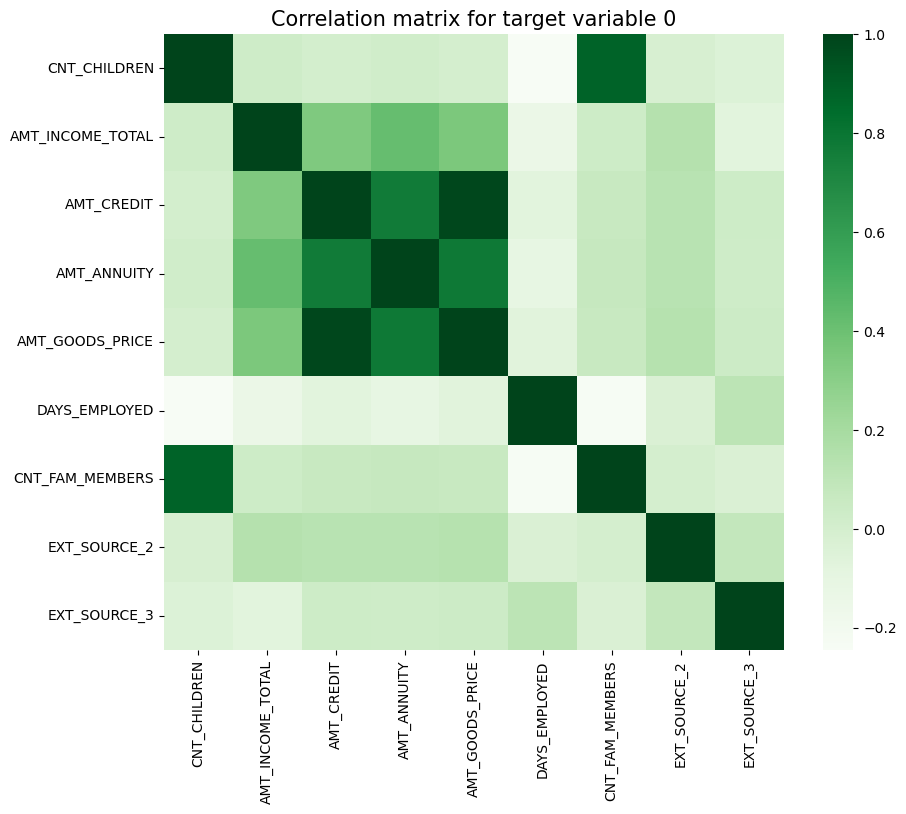

In [83]:
# For target variable = 0 ; i.e app_target0

# dataframe for target0
df_corr_target0 = app_target0[corr_cols]

#correlation matrix -
df_corr_target0.corr()

#plotting Correlation for target0
plt.figure(figsize=(10,8)) 
sns.heatmap(df_corr_target0.corr(), cmap="Greens",annot=False)
plt.title('Correlation matrix for target variable 0', fontsize=15)
plt.yticks(rotation=360)
plt.show()

> <b> Insights - </b>
The below columns have high Correlation -
1. CNT_FAM_MEMBERS & CNT_CHILDREN
2. AMT_GOODS_PRICE & AMT_CREDIT
3. AMT_CREDIT & AMT_ANNUITY
4. AMT_GOODS_PRICE & AMT_ANNUITY

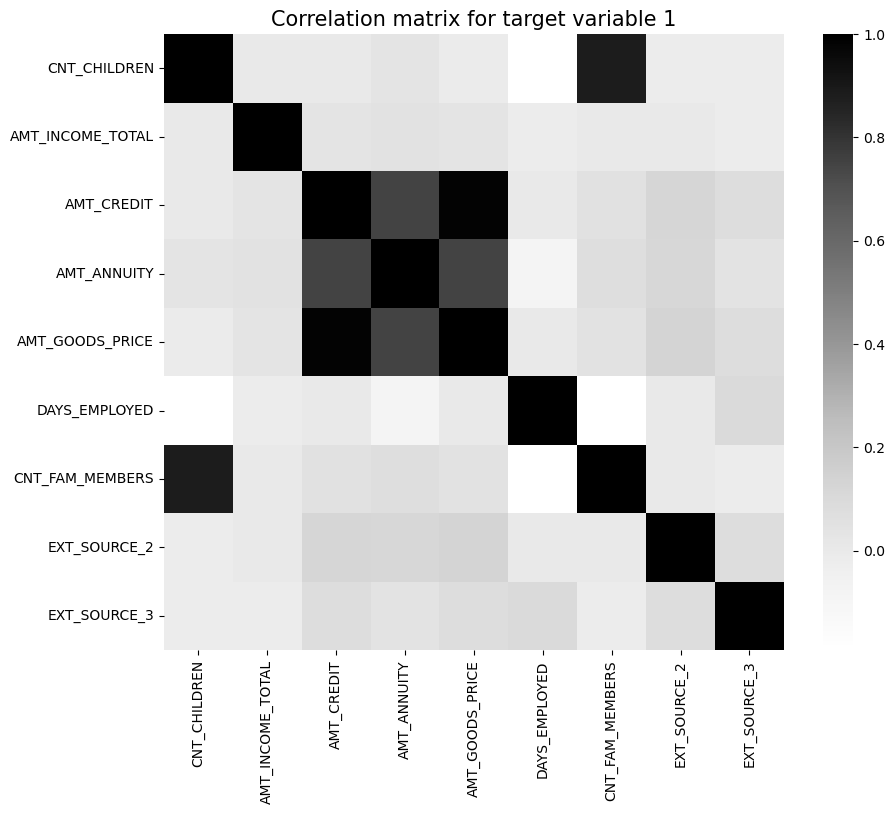

In [84]:
# For target variable = 1 ; i.e app_target1

# dataframe for target0
df_corr_target1 = app_target1[corr_cols]

#correlation matrix -
df_corr_target1.corr()

#plotting Correlation for target0
plt.figure(figsize=(10,8)) 
sns.heatmap(df_corr_target1.corr(), annot=False, cmap="Greys")
plt.title('Correlation matrix for target variable 1', fontsize=15)
plt.show()

> <b>Insights-</b>
1. CNT_FAM_MEMBERS & CNT_CHILDREN
2. ANT_CREDIT & AMT_ANNUITY
3. AMT_CREDIT & AMT_GOODS_PRICE
4. AMT_ANNUITY & AMT_GOODS_PRICE

# <b> _UNIVARIATE ANALYSIS_ </b>

>###  <b>_a) For Numerical/Continuous Variables with respect to Target Variables -->_</b>

> <b> a) 1) Target Analysis on the basis of credit amount of the loan

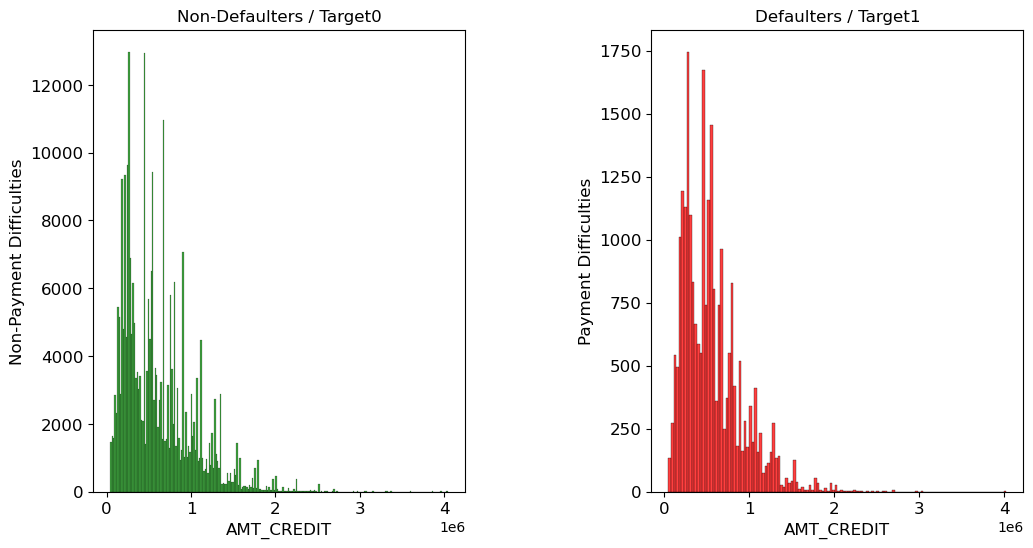

In [171]:
# Target Variables on the basis of credit amount of the loan

plt.figure(figsize=(12,6)) 

plt.subplot(1,2,1)
sns.histplot(app_target0['AMT_CREDIT'], color='g')
plt.yscale('linear')
plt.ylabel('Non-Payment Difficulties', fontsize=12)
plt.xlabel('AMT_CREDIT', fontsize=12)
plt.title('Non-Defaulters / Target0', fontsize = 12)
plt.xticks(rotation=360, fontsize=12)
plt.yticks(rotation=360, fontsize=12)


plt.subplot(1,2,2)
sns.histplot(app_target1['AMT_CREDIT'], color='r')
plt.yscale('linear')
plt.ylabel('Payment Difficulties', fontsize=12)
plt.xlabel('AMT_CREDIT', fontsize=12)
plt.title('Defaulters / Target1', fontsize = 12)
plt.xticks(rotation=360, fontsize=12)
plt.yticks(rotation=360, fontsize=12)

plt.subplots_adjust(wspace=0.5, hspace=0.5)

> Observation/Analysis - 

1. Non defaulters - If the credit amount is less, there is lesser chance of being defaulted. And gradually the chance is being decreased with the loan credit amount.
2. Defaulters - We can notice that the lesser the credit amount of the loan, the more chances of being defaulter. 


> <b> a) 2) Target Analysis on the basis of Annuity

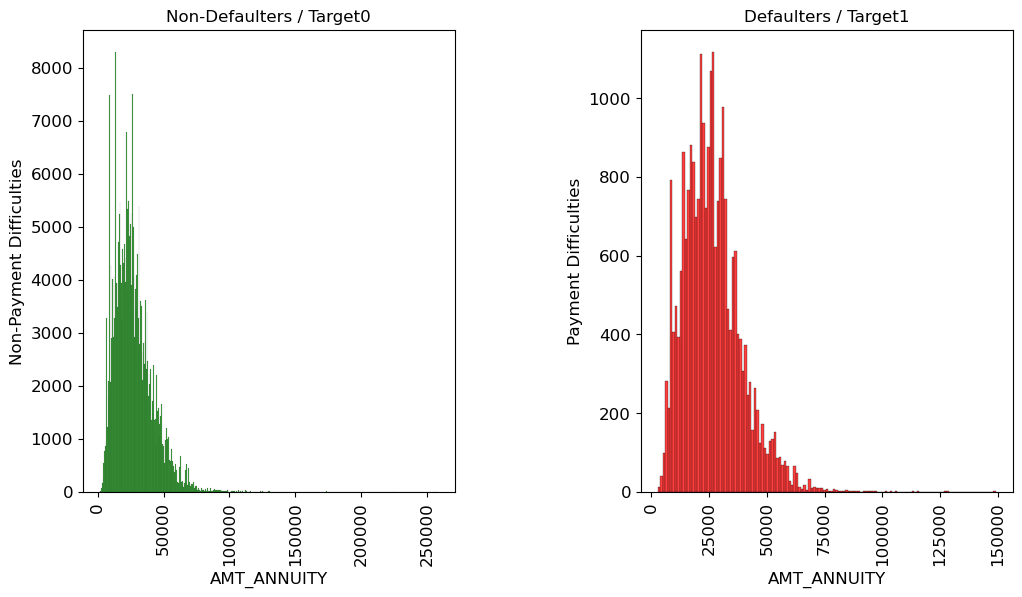

In [175]:
# Target Variables on the basis of Annuity 

plt.figure(figsize=(12,6)) 

plt.subplot(1,2,1)
sns.histplot(app_target0['AMT_ANNUITY'], color='g')
plt.yscale('linear')
plt.ylabel('Non-Payment Difficulties', fontsize=12)
plt.xlabel('AMT_ANNUITY', fontsize=12)
plt.title('Non-Defaulters / Target0', fontsize = 12)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(rotation=360, fontsize=12)


plt.subplot(1,2,2)
sns.histplot(app_target1['AMT_ANNUITY'], color='r')
plt.yscale('linear')
plt.ylabel('Payment Difficulties', fontsize=12)
plt.xlabel('AMT_ANNUITY', fontsize=12)
plt.title('Defaulters / Target1', fontsize = 12)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(rotation=360, fontsize=12)

plt.subplots_adjust(wspace=0.5, hspace=0.5)

> Insights - 
1. AMT_ANNUITY has more number of non-payment difficulties
2. Less Defaulters in AMT_ANNUITY

> <b> a) 3) Target Analysis on the basis of Goods Price and Income of the Client


Non-Defaulters Target Variables:



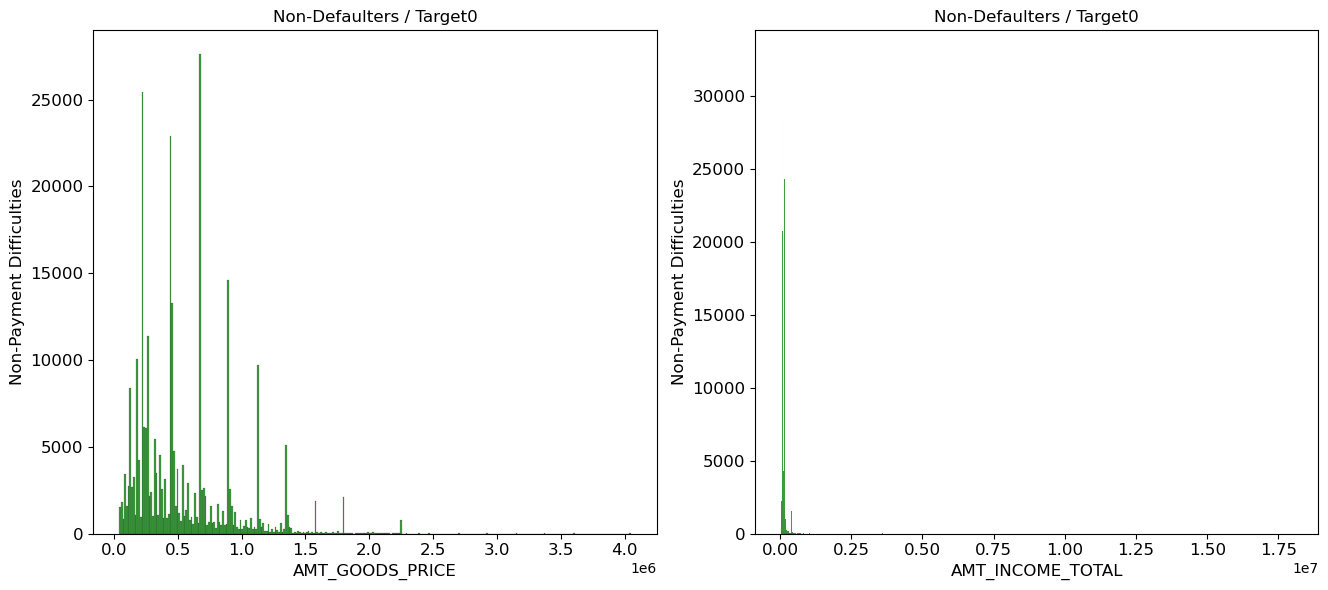


Defaulters Target Variables:



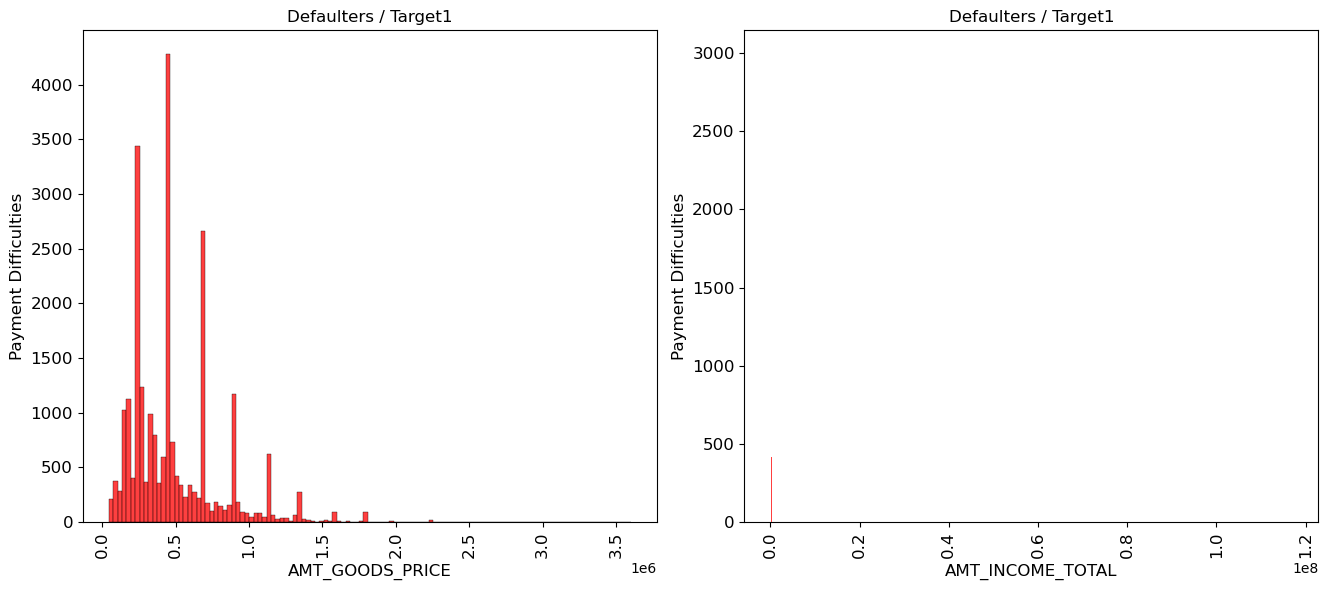

In [178]:
# Target Variables on the basis of Goods price and Income of the client

col = ['AMT_GOODS_PRICE','AMT_INCOME_TOTAL']
plt.figure(figsize=(20,6)) 
k = 0
print("\nNon-Defaulters Target Variables:\n")
for c in col:
        k = k+1
        plt.subplot(1,3,k)
        sns.histplot(app_target0[c], color='g')
        plt.yscale('linear')
        plt.ylabel('Non-Payment Difficulties', fontsize=12)
        plt.xlabel(c, fontsize=12)
        plt.title('Non-Defaulters / Target0', fontsize = 12)
        plt.xticks(rotation=360, fontsize=12)
        plt.yticks(rotation=360, fontsize=12)
plt.tight_layout()
plt.show()

plt.figure(figsize=(20,6)) 
k=0
print("\nDefaulters Target Variables:\n")
for c in col:
        k = k+1
        plt.subplot(1,3,k)
        sns.histplot(app_target1[c], color='r')
        plt.yscale('linear')
        plt.ylabel('Payment Difficulties', fontsize=12)
        plt.xlabel(c, fontsize=12)
        plt.title('Defaulters / Target1', fontsize = 12)
        plt.xticks(rotation=90, fontsize=12)
        plt.yticks(rotation=360, fontsize=12)
plt.tight_layout()
plt.show()

>Overall Observation/Insights -

1. Target 1 has largely staggered income as compared to target 0. 
2. Distribution plot shows that the shape in Income total, Annuity, Credit and Good Price is similar for Target 0 and similar for Target 1.
3. The plots also illustrate that individuals experiencing challenges in loan repayment exhibit correlations with their income, loan amount, goods prices associated with the loan, and annuity.


> ### <b>_b) For Categorical Variables with respect to Target Variables -->_</b>

> <b> b)1) Target Analysis on Basis of Gender

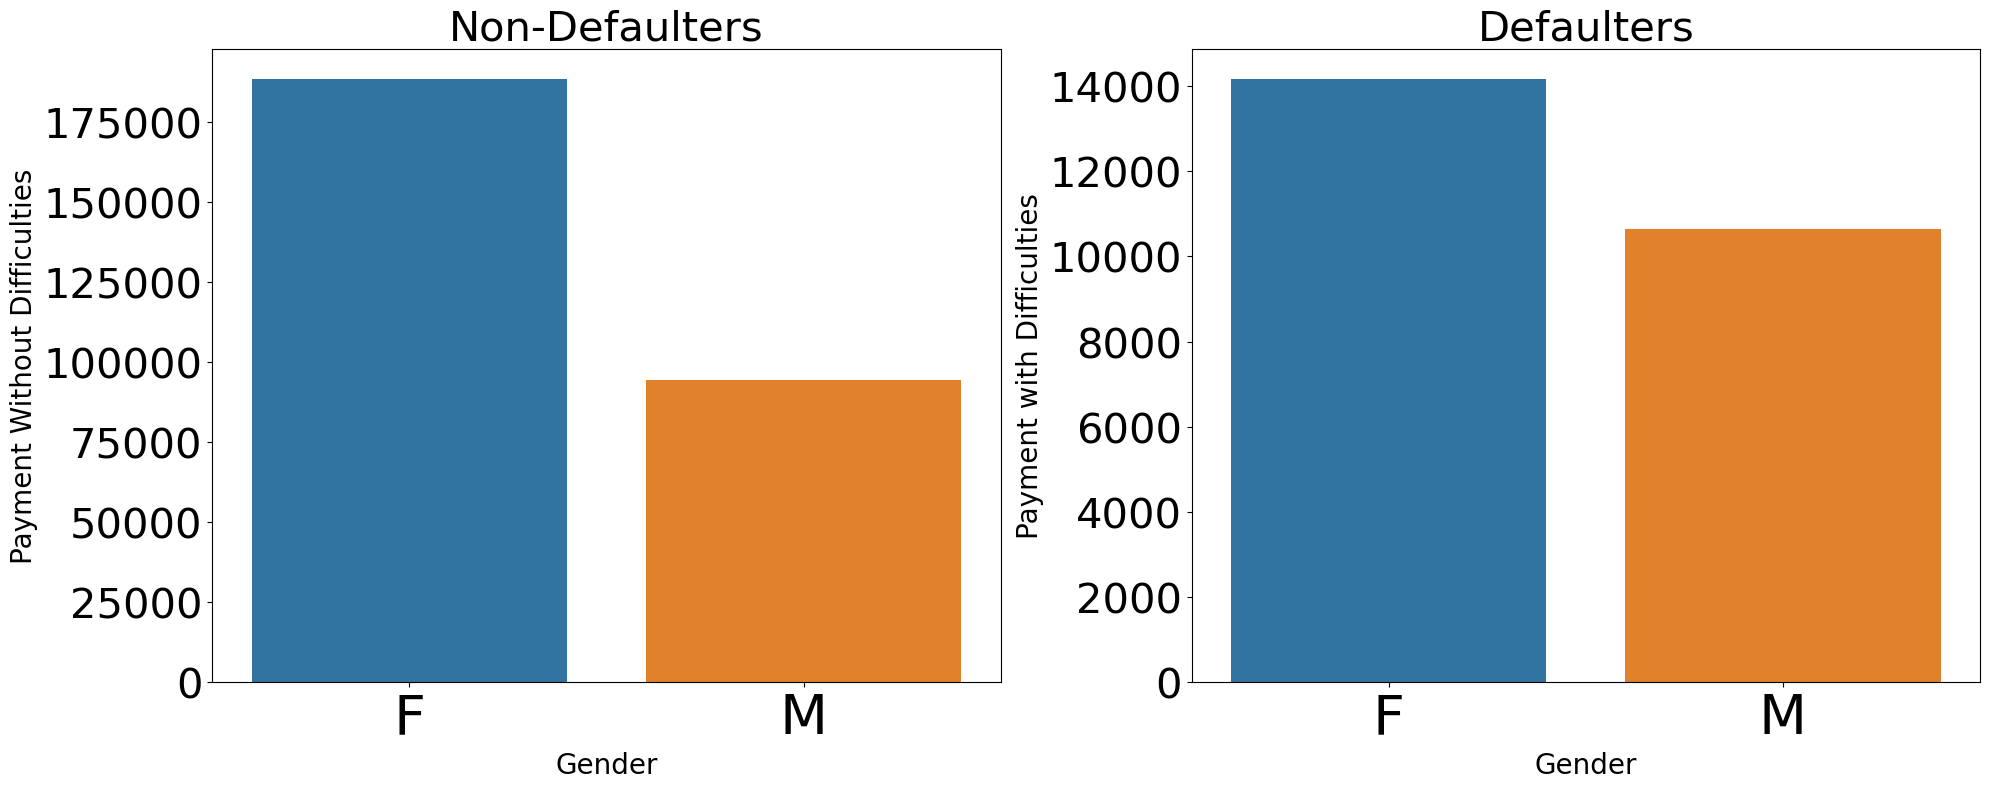

In [88]:
# Plotting target variables on basis of gender

plt.figure(figsize=(20,8))

plt.subplot(1,2,1)    
sns.countplot(x = 'CODE_GENDER',data = app_target0)
plt.title('Non-Defaulters', fontsize = 30)
plt.xlabel('Gender', fontsize = 20)
plt.ylabel('Payment Without Difficulties', fontsize = 20)
plt.xticks(rotation=360, fontsize=40)
plt.yticks(rotation=360, fontsize=30)

plt.subplot(1,2,2) 
sns.countplot(x = 'CODE_GENDER',data = app_target1)
plt.title('Defaulters', fontsize = 30)
plt.xlabel('Gender', fontsize = 20)
plt.ylabel('Payment with Difficulties', fontsize = 20)
plt.xticks(rotation=360, fontsize=40)
plt.yticks(rotation=360, fontsize=30)

plt.tight_layout()
plt.show()

>Observation/Insights - 

1. We can see that the number of females is more in Non-defaulters (target0) than in Defaulters(target1). 
2. We can also see that females are major in both the targets compared to male.

><b> b)2) Target Analysis on basis of Contract Type

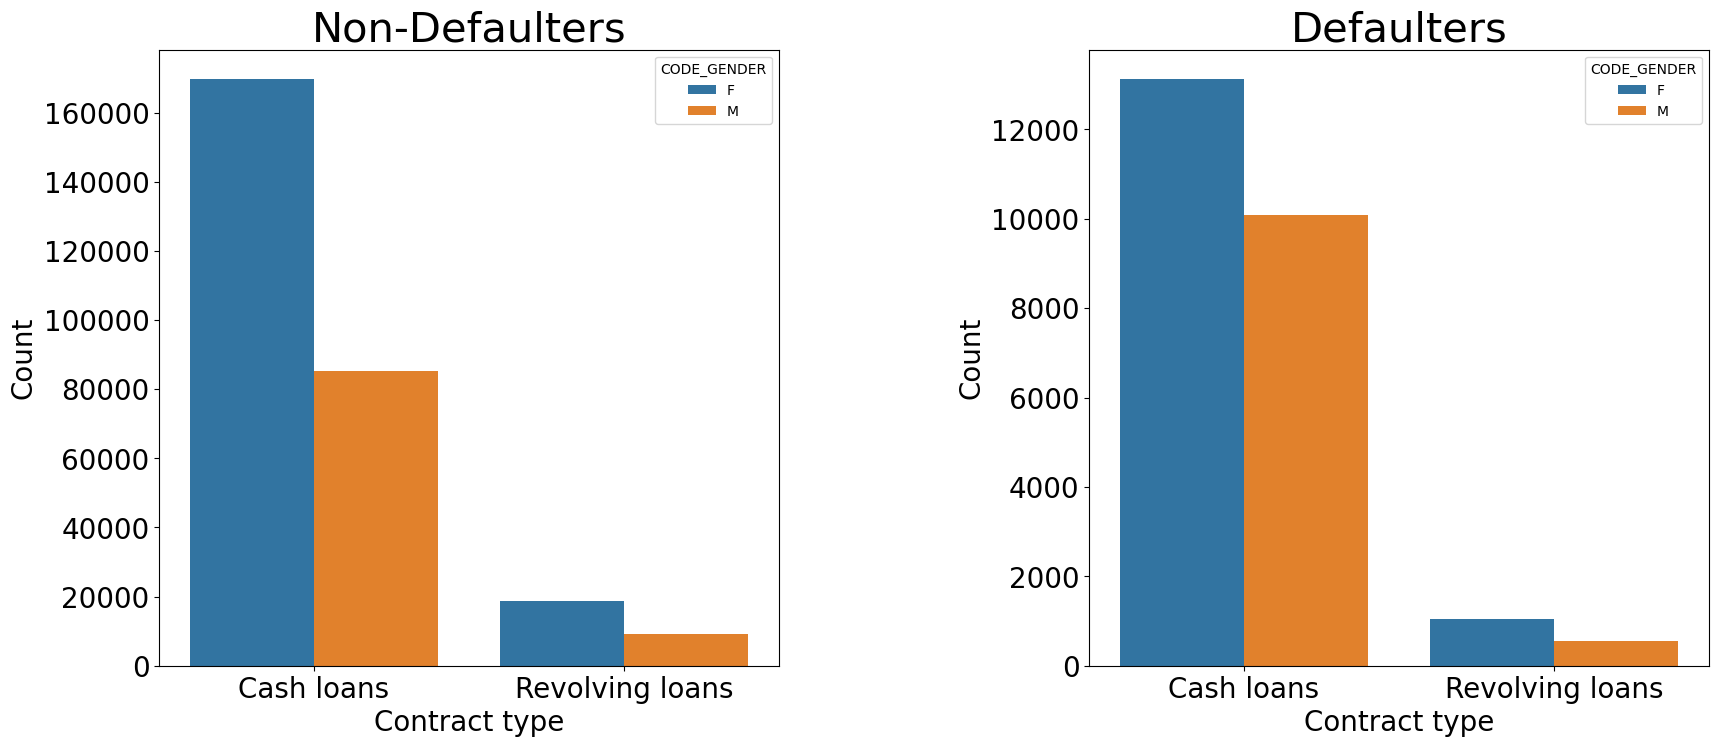

In [89]:
# Plotting Target Variables on basis of Contract type

plt.figure(figsize=(20,8))
plt.subplot(1,2,1)    
sns.countplot(x = 'NAME_CONTRACT_TYPE',data = app_target0, hue = 'CODE_GENDER')
plt.title('Non-Defaulters', fontsize = 30)
plt.xlabel('Contract type', fontsize = 20)
plt.ylabel('Count', fontsize = 20)
plt.xticks(rotation=360, fontsize=20)
plt.yticks(rotation=360, fontsize=20)


plt.subplot(1,2,2) 
sns.countplot(x = 'NAME_CONTRACT_TYPE',data = app_target1, hue='CODE_GENDER')
plt.title('Defaulters', fontsize = 30)
plt.xlabel('Contract type', fontsize = 20)
plt.ylabel('Count', fontsize = 20)
plt.xticks(rotation=360, fontsize=20)
plt.yticks(rotation=360, fontsize=20)

plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

>Insights - 
1. The Contract type 'Cash loans' have higher number of credits than 'Revolving loans' contract type.
2. The Female have more number of counts.

> <b> b) 3) Target Analysis on Basis of Education Type

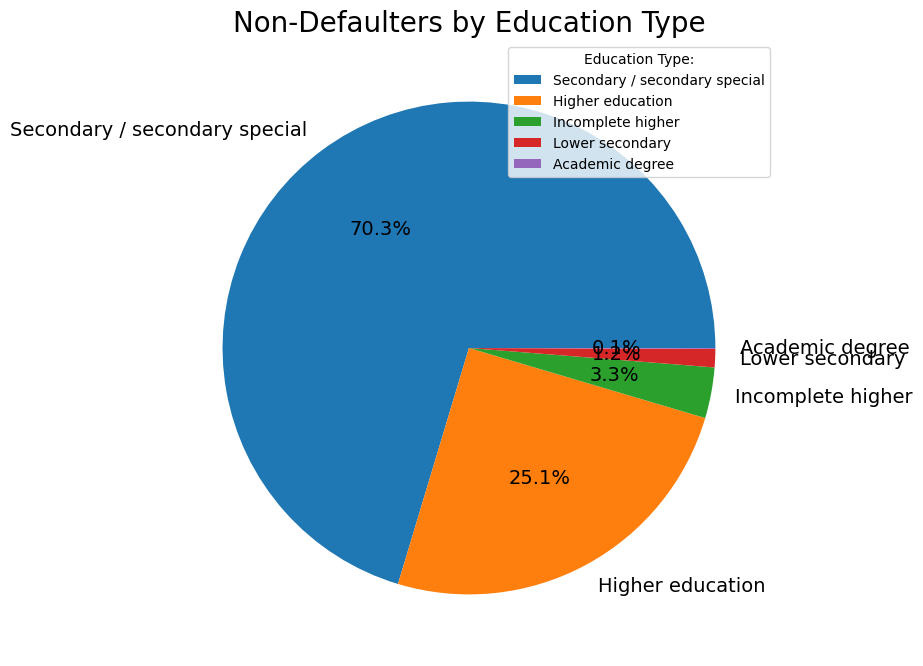

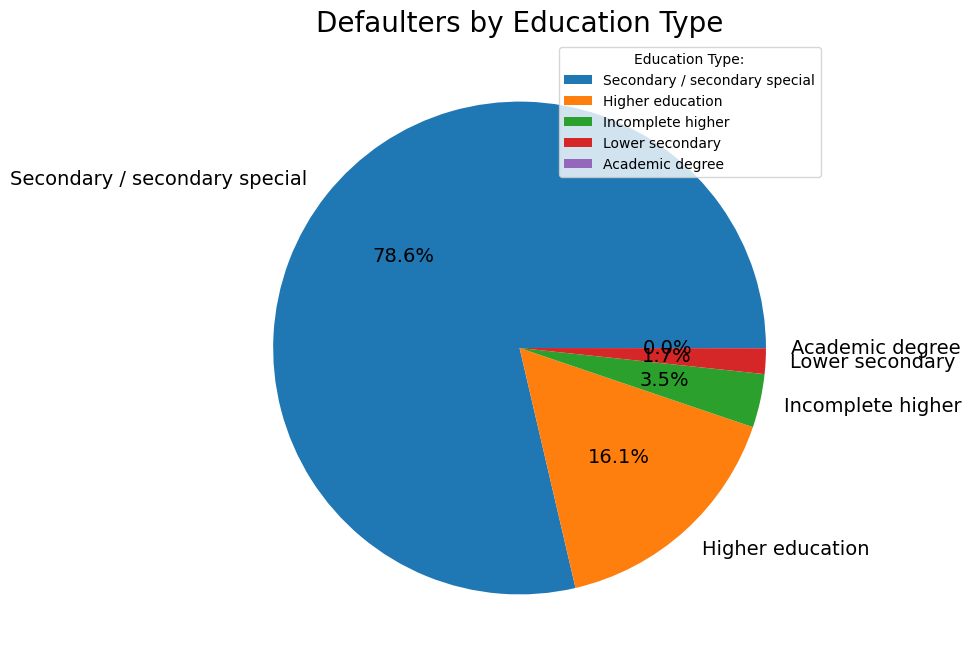

In [90]:
# Education Type for Target 0 / Non-Defaulter ->

education_type_counts = app_target0['NAME_EDUCATION_TYPE'].value_counts()
plt.figure(figsize=(10, 8))
plt.pie(education_type_counts, labels=education_type_counts.index, autopct='%1.1f%%', textprops={'fontsize': 14})
plt.title('Non-Defaulters by Education Type', fontsize=20)
plt.legend(title = "Education Type:")
plt.show()

# Education Type for Target 1 / Defaulter ->

education_type_counts = app_target1['NAME_EDUCATION_TYPE'].value_counts()
plt.figure(figsize=(10, 8))
plt.pie(education_type_counts, labels=education_type_counts.index, autopct='%1.1f%%', textprops={'fontsize': 14})
plt.title('Defaulters by Education Type', fontsize=20)
plt.legend(title = "Education Type:")
plt.show()



> Insights - 
1. We can see that the Education with Secondary/Secondary Special type of customers in both Defaulters and Non-Defaulters compared to other customers with other Education types.
2. Also, the Education with Academic degree have the lowest or least (almost none) customers in both Defaulters and Non-Defaulters. 

> <b> b) 4) Target Analysis on Basis of Income Type

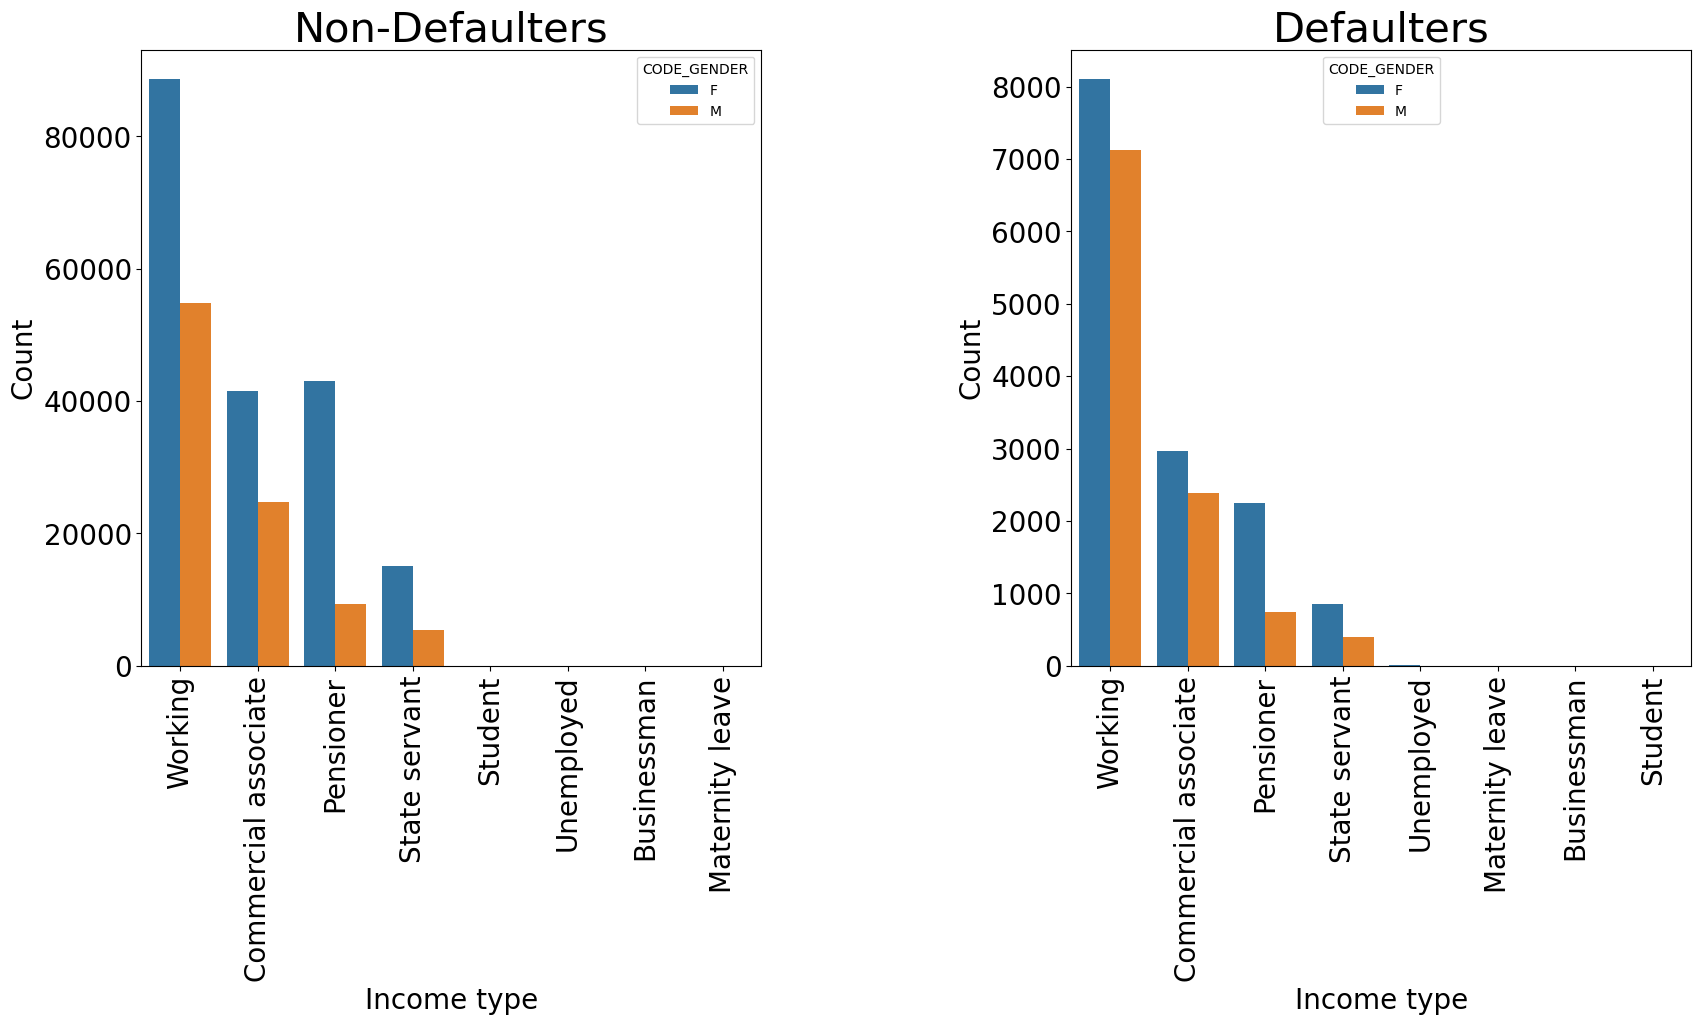

In [91]:
# Income Type for Target 0 / Non-Defaulter ->

income_type_counts0 = app_target0['NAME_INCOME_TYPE'].value_counts().sort_values(ascending=False).index
income_type_counts1 = app_target1['NAME_INCOME_TYPE'].value_counts().sort_values(ascending=False).index

plt.figure(figsize=(20,8))
plt.subplot(1,2,1)    
sns.countplot(x = 'NAME_INCOME_TYPE',data = app_target0, hue = 'CODE_GENDER',order=income_type_counts0)
plt.title('Non-Defaulters', fontsize = 30)
plt.xlabel('Income type', fontsize = 20)
plt.ylabel('Count', fontsize = 20)
plt.xticks(rotation=90, fontsize=20)
plt.yticks(rotation=360, fontsize=20)

# Income Type for Target 1 / Defaulter ->

plt.subplot(1,2,2) 
sns.countplot(x = 'NAME_INCOME_TYPE',data = app_target1, hue='CODE_GENDER', order=income_type_counts1)
plt.title('Defaulters', fontsize = 30)
plt.xlabel('Income type', fontsize = 20)
plt.ylabel('Count', fontsize = 20)
plt.xticks(rotation=90, fontsize=20)
plt.yticks(rotation=360, fontsize=20)

plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

> Insights - 
1. For Income Type 'Working','Commercial Associate' and 'Pensioner' has higher number of credit counts compared to others.
2. Also, Females have more in number than Males.

> <b> b) 5) Target Analysis on Basis of Family Status

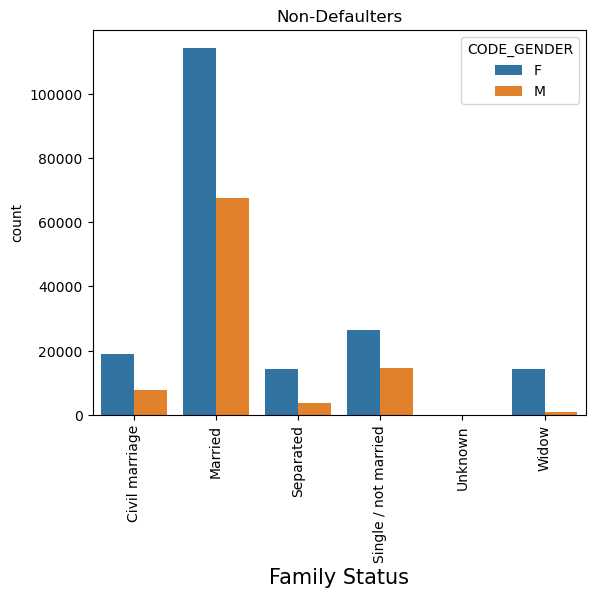

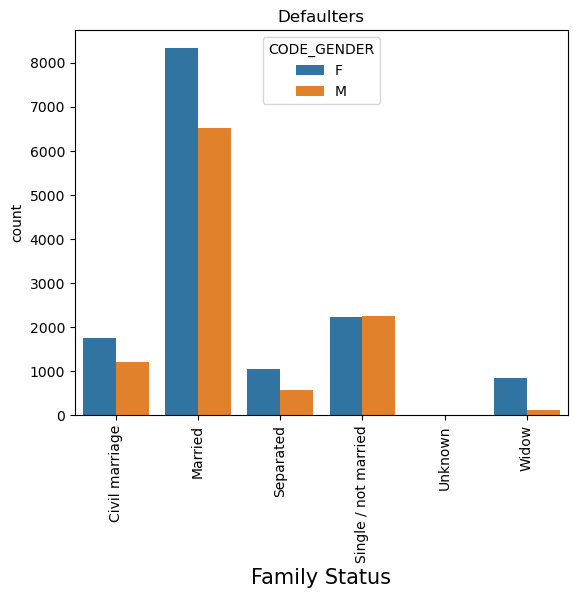

In [92]:
# Plotting Target Variables on basis of Family Status

plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.countplot(x = 'NAME_FAMILY_STATUS', data = app_target0, hue='CODE_GENDER')
plt.title('Non-Defaulters')
plt.xlabel('Family Status', fontsize=15)
plt.xticks(rotation=90)

plt.figure(figsize=(14,5))
plt.subplot(1,2,2)
sns.countplot(x = 'NAME_FAMILY_STATUS', data = app_target1, hue='CODE_GENDER')
plt.title('Defaulters')
plt.xlabel('Family Status', fontsize=15)
plt.xticks(rotation=90)

plt.show()

> Insights

1. People with Family Status 'Married' are more in number in both the targets compared to other family status.
2. Again, Female are more in number than Male.

> ## <b> c) Segmented Univariate analysis

> 1) Percentage of age group for Target Variables

showing how much percentage of each age group(Young, Mid age and Senior citizen) for Target0 and Target1

In [93]:
# percentage of each age group who was defaulted.

young_1 = round(100*len(df_app[(df_app['AGE_GROUP'] == 'Young') & (df_app['TARGET'] == 1)])/len(df_app[df_app['AGE_GROUP'] == 'Young']),2)
midage_1 = round(100*len(df_app[(df_app['AGE_GROUP'] == 'Middle_Age') & (df_app['TARGET'] == 1)])/len(df_app[df_app['AGE_GROUP'] == 'Middle_Age']),2)
senior_1 = round(100*len(df_app[(df_app['AGE_GROUP'] == 'Senior_citizen') & (df_app['TARGET'] == 1)])/len(df_app[df_app['AGE_GROUP'] == 'Senior_citizen']),2)

In [94]:
# creating a dataframe for age group defaulted

app_agegrp1 = {'AGE_GROUP':['Young', 'Middle_Age', 'Senior_citizen'], 'Percentage':[young_1, midage_1, senior_1]} 
df_app_agegrp1 = pd.DataFrame(app_agegrp1) 
df_app_agegrp1

AGE_GROUP  Percentage
0           Young       10.79
1      Middle_Age        7.22
2  Senior_citizen        4.92

In [95]:
# percentage of each age group who was not defaulted.

young_0 = round(100*len(df_app[(df_app['AGE_GROUP'] == 'Young') & (df_app['TARGET'] == 0)])/len(df_app[df_app['AGE_GROUP'] == 'Young']),2)
midage_0 = round(100*len(df_app[(df_app['AGE_GROUP'] == 'Middle_Age') & (df_app['TARGET'] == 0)])/len(df_app[df_app['AGE_GROUP'] == 'Middle_Age']),2)
senior_0 = round(100*len(df_app[(df_app['AGE_GROUP'] == 'Senior_citizen') & (df_app['TARGET'] == 0)])/len(df_app[df_app['AGE_GROUP'] == 'Senior_citizen']),2)

In [96]:
# creating a dataframe for age group non-defaulted

app_agegrp0 = {'AGE_GROUP':['Young', 'Middle_Age', 'Senior_citizen'], 'Percentage':[young_0, midage_0, senior_0]} 
df_app_agegrp0 = pd.DataFrame(app_agegrp0) 
df_app_agegrp0

AGE_GROUP  Percentage
0           Young       89.21
1      Middle_Age       92.78
2  Senior_citizen       95.08

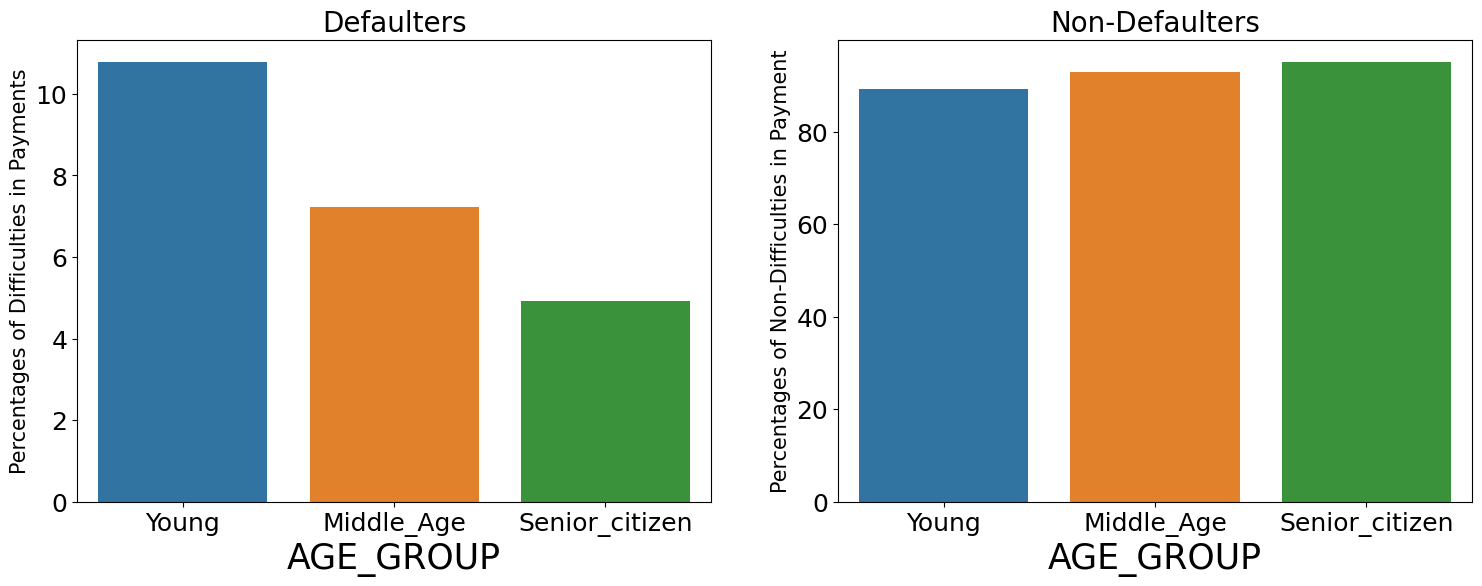

In [97]:
# Plotting from the above 2 dataframes 

plt.figure(figsize=(18,6))

plt.subplot(1,2,1) 
sns.barplot(x='AGE_GROUP',y='Percentage',data=df_app_agegrp1)
plt.title('Defaulters', fontsize = 20)
plt.xticks(fontsize=18)
plt.xlabel('AGE_GROUP',fontsize=25)
plt.yticks(fontsize=18)
plt.ylabel('Percentages of Difficulties in Payments',fontsize=15)

plt.subplot(1,2,2)
sns.barplot(x='AGE_GROUP',y='Percentage',data=df_app_agegrp0)
plt.title('Non-Defaulters', fontsize=20)
plt.xticks(fontsize=18)
plt.xlabel('AGE_GROUP',fontsize=25)
plt.yticks(fontsize=18)
plt.ylabel('Percentages of Non-Difficulties in Payment',fontsize=15)

plt.show()

> Insights 
1. From the plot, we can say that Young people are likely to be Defaulters.
2. Also, in Non-Defaulters, there is not much difference in the age groups. By comparing carefully, we can see that Senior Citizen people are slightly higher than the other age groups.

> 2) Income Group for Target Variables

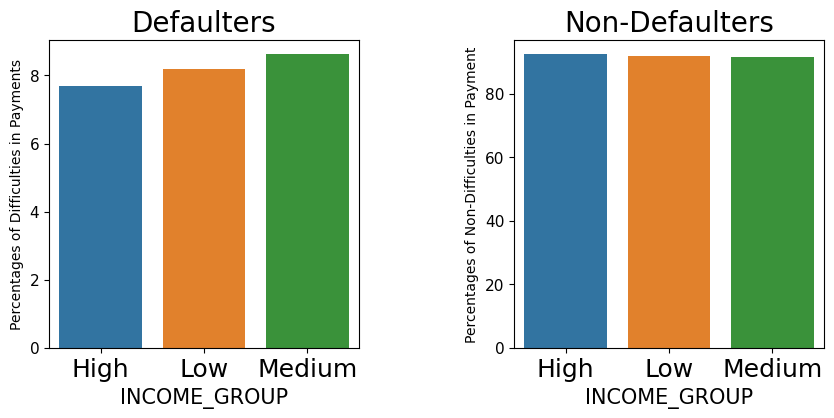

In [98]:
# percentage of each age group who was not defaulted.

high_0 = round(100*len(df_app[(df_app['INCOME_GROUP'] == 'High') & (df_app['TARGET'] == 0)])/len(df_app[df_app['INCOME_GROUP'] == 'High']),2)
low_0 = round(100*len(df_app[(df_app['INCOME_GROUP'] == 'Low') & (df_app['TARGET'] == 0)])/len(df_app[df_app['INCOME_GROUP'] == 'Low']),2)
medium_0 = round(100*len(df_app[(df_app['INCOME_GROUP'] == 'Medium') & (df_app['TARGET'] == 0)])/len(df_app[df_app['INCOME_GROUP'] == 'Medium']),2)

# percentage of each age group who was defaulted.

high_1 = round(100*len(df_app[(df_app['INCOME_GROUP'] == 'High') & (df_app['TARGET'] == 1)])/len(df_app[df_app['INCOME_GROUP'] == 'High']),2)
low_1 = round(100*len(df_app[(df_app['INCOME_GROUP'] == 'Low') & (df_app['TARGET'] == 1)])/len(df_app[df_app['INCOME_GROUP'] == 'Low']),2)
medium_1 = round(100*len(df_app[(df_app['INCOME_GROUP'] == 'Medium') & (df_app['TARGET'] == 1)])/len(df_app[df_app['INCOME_GROUP'] == 'Medium']),2)

# creating a dataframe for age group non-defaulted

app_incomegrp0 = {'INCOME_GROUP':['High', 'Low', 'Medium'], 'Percentage':[high_0, low_0, medium_0]} 
df_app_incomegrp0 = pd.DataFrame(app_incomegrp0) 
df_app_incomegrp0

# creating a dataframe for age group defaulted

app_incomegrp1 = {'INCOME_GROUP':['High', 'Low', 'Medium'], 'Percentage':[high_1, low_1, medium_1]} 
df_app_incomegrp1 = pd.DataFrame(app_incomegrp1) 
df_app_incomegrp1

# Plotting from the above 2 dataframes 

plt.figure(figsize=(10,4))

plt.subplot(1,2,1) 
sns.barplot(x='INCOME_GROUP',y='Percentage',data=df_app_incomegrp1)
plt.title('Defaulters', fontsize = 20)
plt.xticks(fontsize=18)
plt.xlabel('INCOME_GROUP',fontsize=15)
plt.yticks(fontsize=11)
plt.ylabel('Percentages of Difficulties in Payments',fontsize=10)
plt.subplots_adjust(wspace=0.5)
plt.subplot(1,2,2)
sns.barplot(x='INCOME_GROUP',y='Percentage',data=df_app_incomegrp0)
plt.title('Non-Defaulters', fontsize=20)
plt.xticks(fontsize=18)
plt.xlabel('INCOME_GROUP',fontsize=15)
plt.yticks(fontsize=11)
plt.ylabel('Percentages of Non-Difficulties in Payment',fontsize=10)

plt.show()

> Insights
1. The count of Non-Defaulters are are almost same for all income groups.
2. The count of Defaulters are more in Medium Income Group, then Low and then High Income Groups.

# <b> _BIVARIATE ANALYSIS_

> <b>a) Numerical-Numerical Bivariate Analysis

In [99]:
# Listing few relevant columns to find the correlation

corr_cols = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','REGION_RATING_CLIENT']

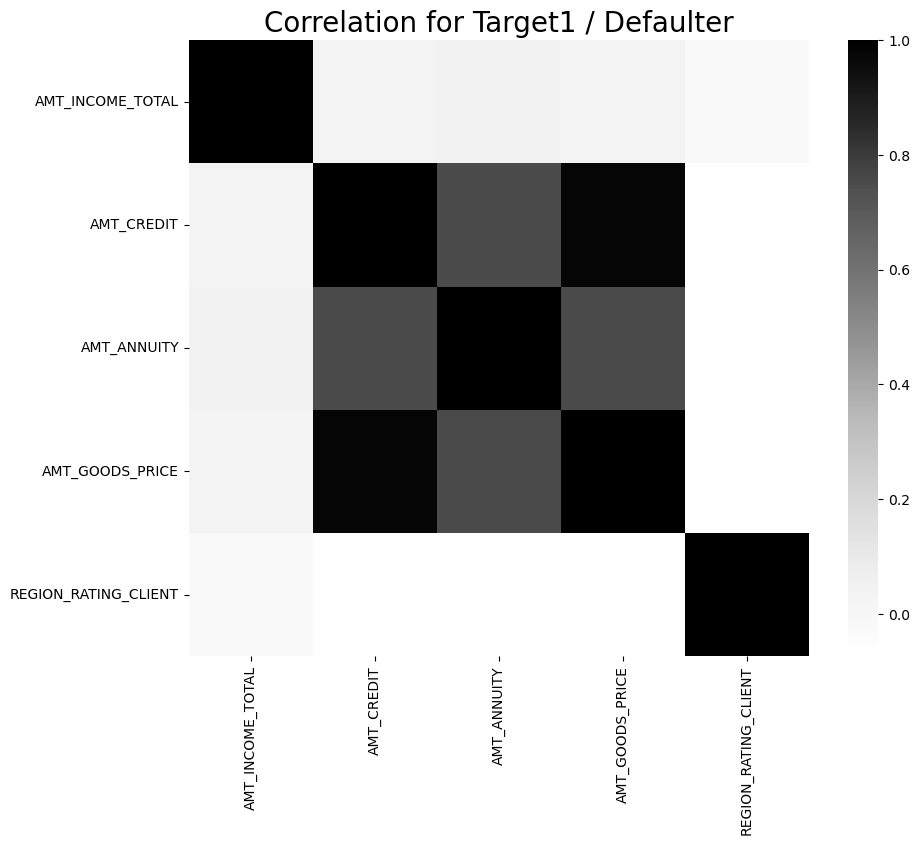

In [100]:
# Creating dataframe for target1

df_corr_target1 = app_target1[corr_cols]

# Correlation Matrix -->

df_corr_target1.corr()

# Plotting the Correlation for Target1 / Defaulter -->

plt.figure(figsize=(10,8))
plt.title("Correlation for Target1 / Defaulter", fontsize=20)
sns.heatmap(df_corr_target1.corr(),cmap="Greys",annot=False)
plt.yticks(rotation=360)
plt.show()

> Insights - High Corelate columns for Defaulters ->
1. AMT_CREDIT and AMT_ANNUITY 
2. AMT_CREDIT and AMT_GOODS_PRICE 
3. AMT_ANNUITY and AMT_GOODS_PRICE 

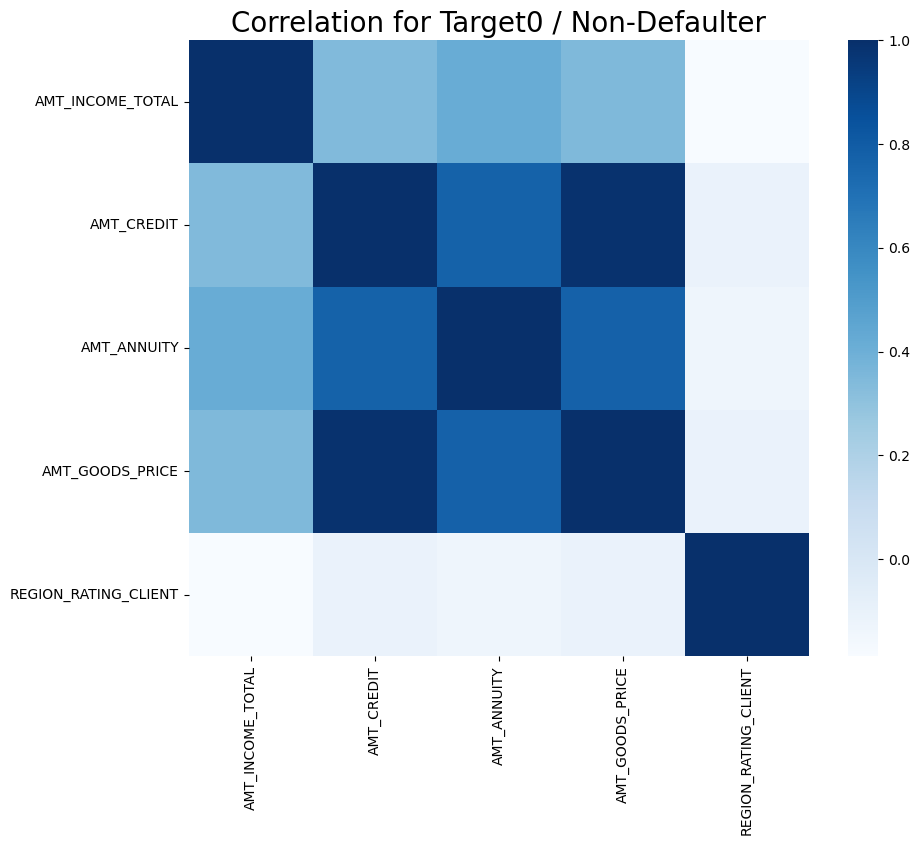

In [101]:
# Creating dataframe for target0

df_corr_target0 = app_target0[corr_cols]

# Correlation Matrix -->

df_corr_target0.corr()

# Plotting the Correlation for Target1 / Defaulter -->

plt.figure(figsize=(10,8))
plt.title("Correlation for Target0 / Non-Defaulter", fontsize=20)
sns.heatmap(df_corr_target0.corr(),cmap="Blues",annot=False)
plt.yticks(rotation=360)
plt.show()

> Insights - High Corelate Columns for Target0 / Non-Defaulters ->
1. AMT_CREDIT & AMT_ANNUITY 
2. AMT_CREDIT & AMT_GOODS_PRICE 
3. AMT_ANNUITY & AMT_GOODS_PRICE 

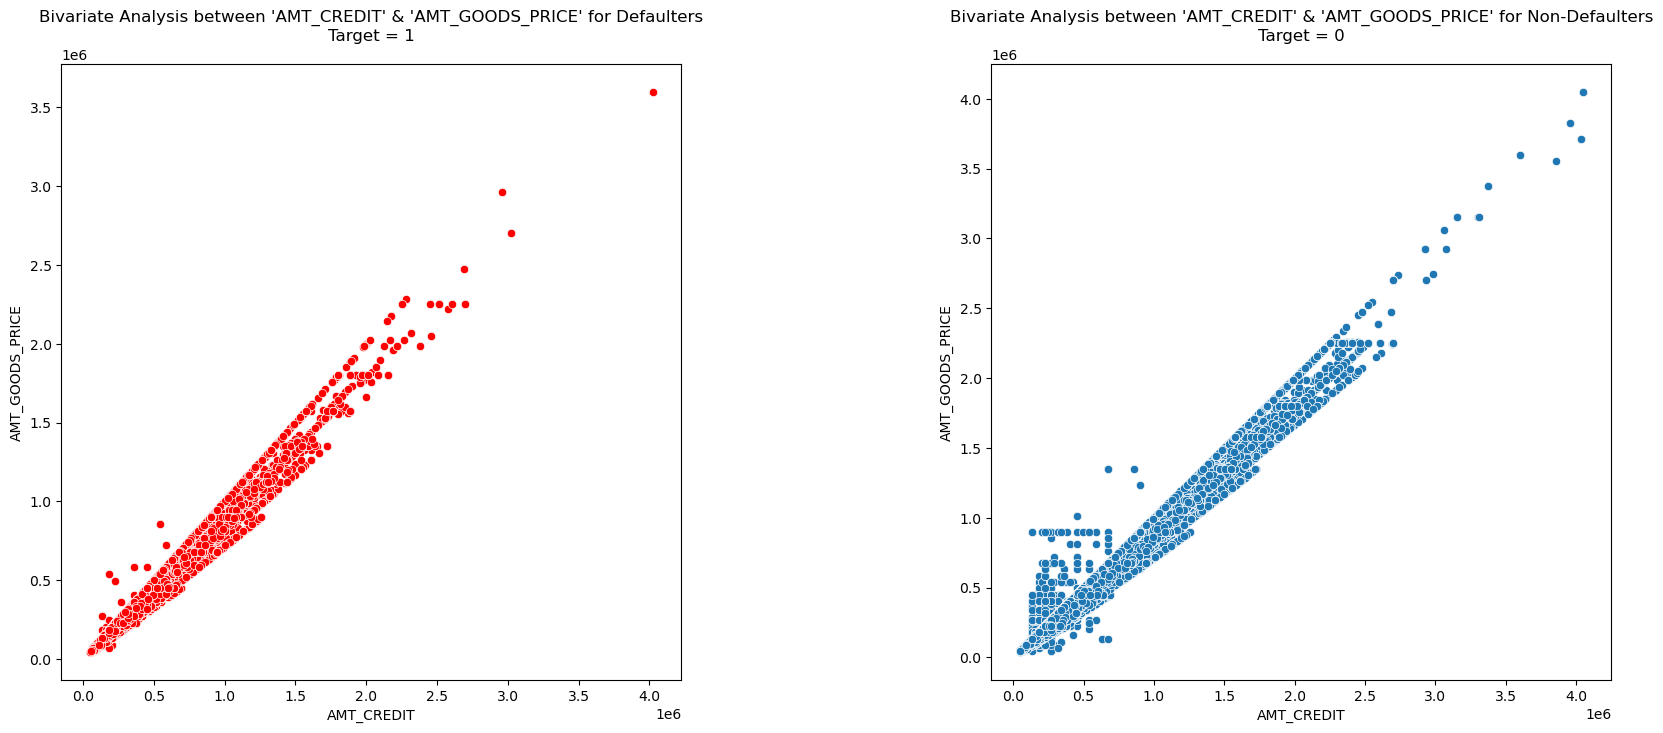

In [102]:
plt.figure(figsize = [20, 8])

plt.subplot(1,2,1)
plt.title("Bivariate Analysis between 'AMT_CREDIT' & 'AMT_GOODS_PRICE' for Defaulters\nTarget = 1", fontsize=12)
sns.scatterplot(x = 'AMT_CREDIT', y = 'AMT_GOODS_PRICE', data = app_target1, color = 'red')

plt.subplots_adjust(wspace = 0.5)
plt.subplot(1,2,2)
plt.title("Bivariate Analysis between 'AMT_CREDIT' & 'AMT_GOODS_PRICE' for Non-Defaulters\nTarget = 0", fontsize=12)
sns.scatterplot(x = 'AMT_CREDIT', y = 'AMT_GOODS_PRICE', data = app_target0)
plt.show()

> Insights -
'AMT_CREDIT' and 'AMT_GOODS_PRICE' are showing the same kind of trend as the credit amount maybe same or less than goods price.

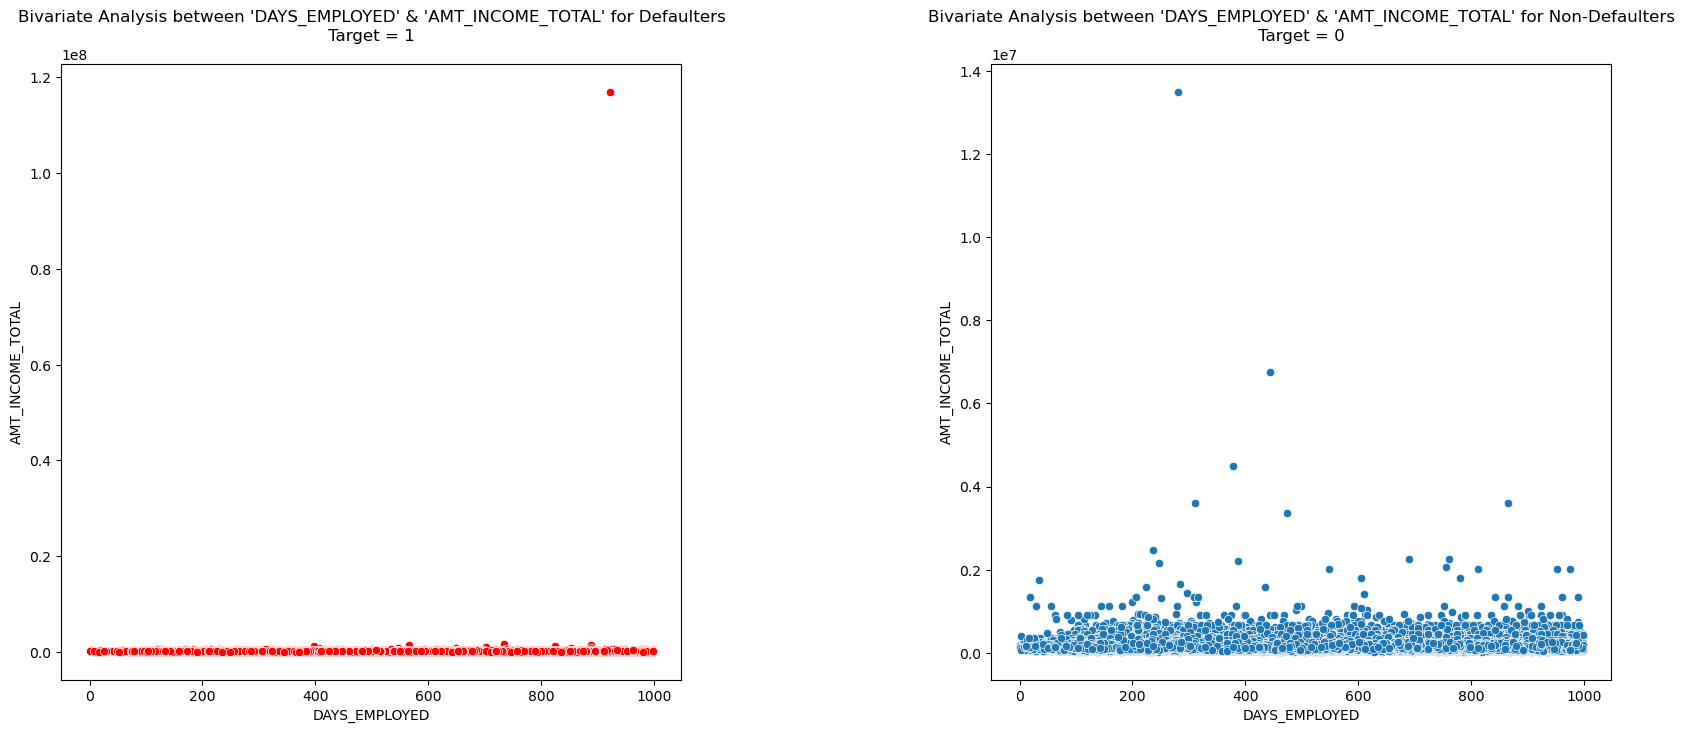

In [103]:
plt.figure(figsize = [20, 8])

plt.subplot(1,2,1)
plt.title("Bivariate Analysis between 'DAYS_EMPLOYED' & 'AMT_INCOME_TOTAL' for Defaulters\nTarget = 1", fontsize=12)
sns.scatterplot(x = 'DAYS_EMPLOYED', y = 'AMT_INCOME_TOTAL', data = app_target1[app_target1['DAYS_EMPLOYED'] < 1000], color = 'red')

plt.subplots_adjust(wspace = 0.5)
plt.subplot(1,2,2)
plt.title("Bivariate Analysis between 'DAYS_EMPLOYED' & 'AMT_INCOME_TOTAL' for Non-Defaulters\nTarget = 0", fontsize=12)
sns.scatterplot(x = 'DAYS_EMPLOYED', y = 'AMT_INCOME_TOTAL', data = app_target0[app_target0['DAYS_EMPLOYED'] < 1000])
plt.show()

> Insights - 
1. Most of the dafaulters have less income irrespective of their duration of employment in days.
2. Non-defaulters have higher income than defaulters.

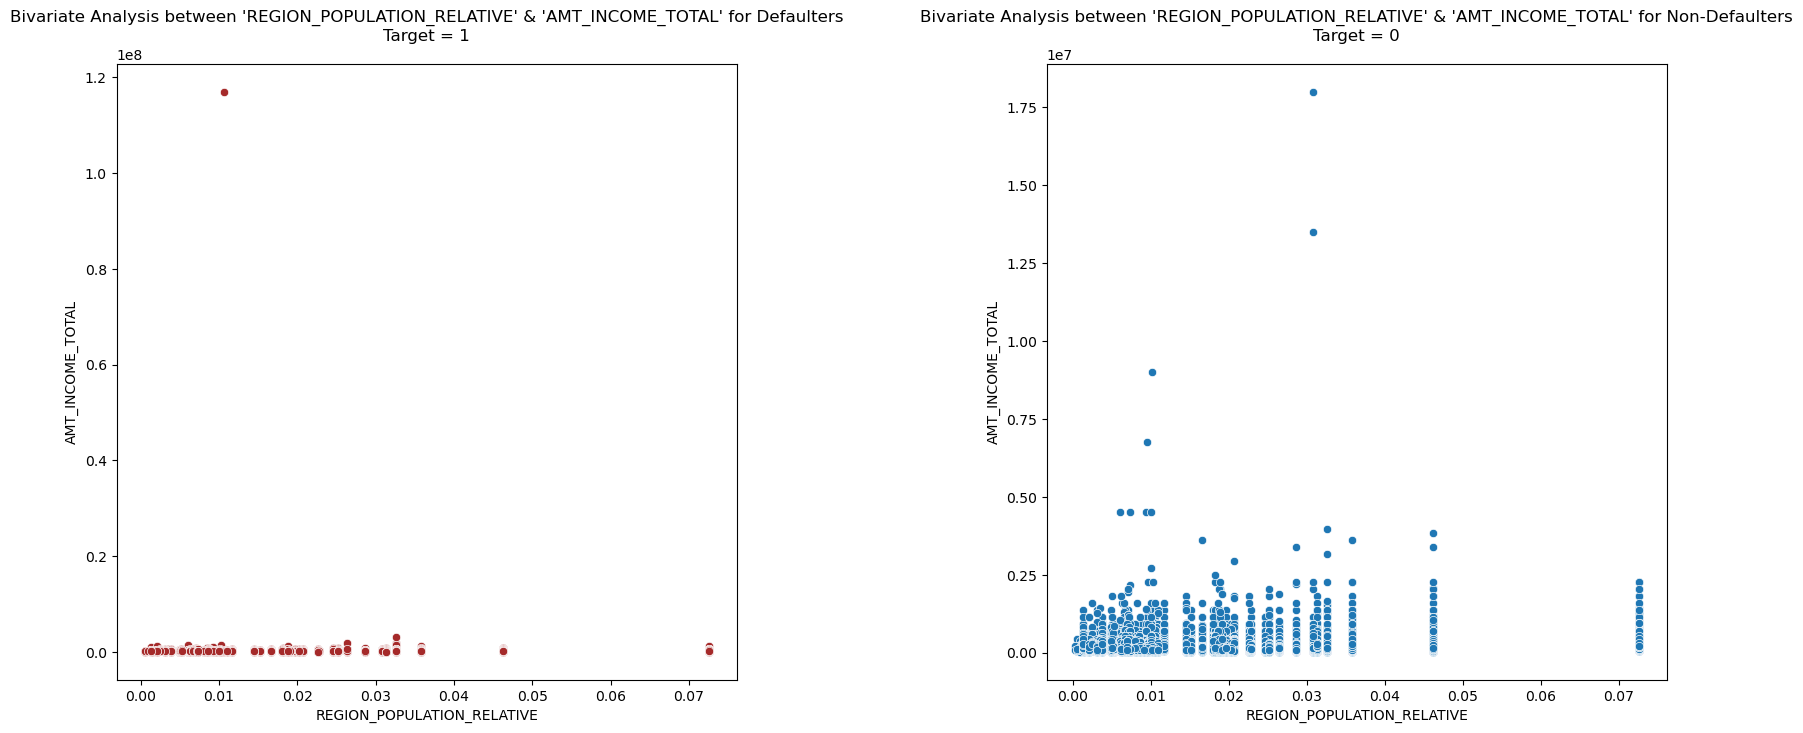

In [104]:
plt.figure(figsize = [20, 8])
plt.subplot(1,2,1)
plt.title("Bivariate Analysis between 'REGION_POPULATION_RELATIVE' & 'AMT_INCOME_TOTAL' for Defaulters\nTarget = 1", fontsize=12)
sns.scatterplot(x = 'REGION_POPULATION_RELATIVE', y = 'AMT_INCOME_TOTAL', data = app_target1, color = 'brown')

plt.subplots_adjust(wspace = 0.5)
plt.subplot(1,2,2)
plt.title("Bivariate Analysis between 'REGION_POPULATION_RELATIVE' & 'AMT_INCOME_TOTAL' for Non-Defaulters\nTarget = 0", fontsize=12)
sns.scatterplot(x = 'REGION_POPULATION_RELATIVE', y = 'AMT_INCOME_TOTAL', data = app_target0)
plt.show()

> Insights -
1. Defaulters have very low income where region population is less dense.
2. Non-defaulters have higher income than defaulters in the same population regions.

> <b> b) Numerical-Categorical Bivariate Analysis

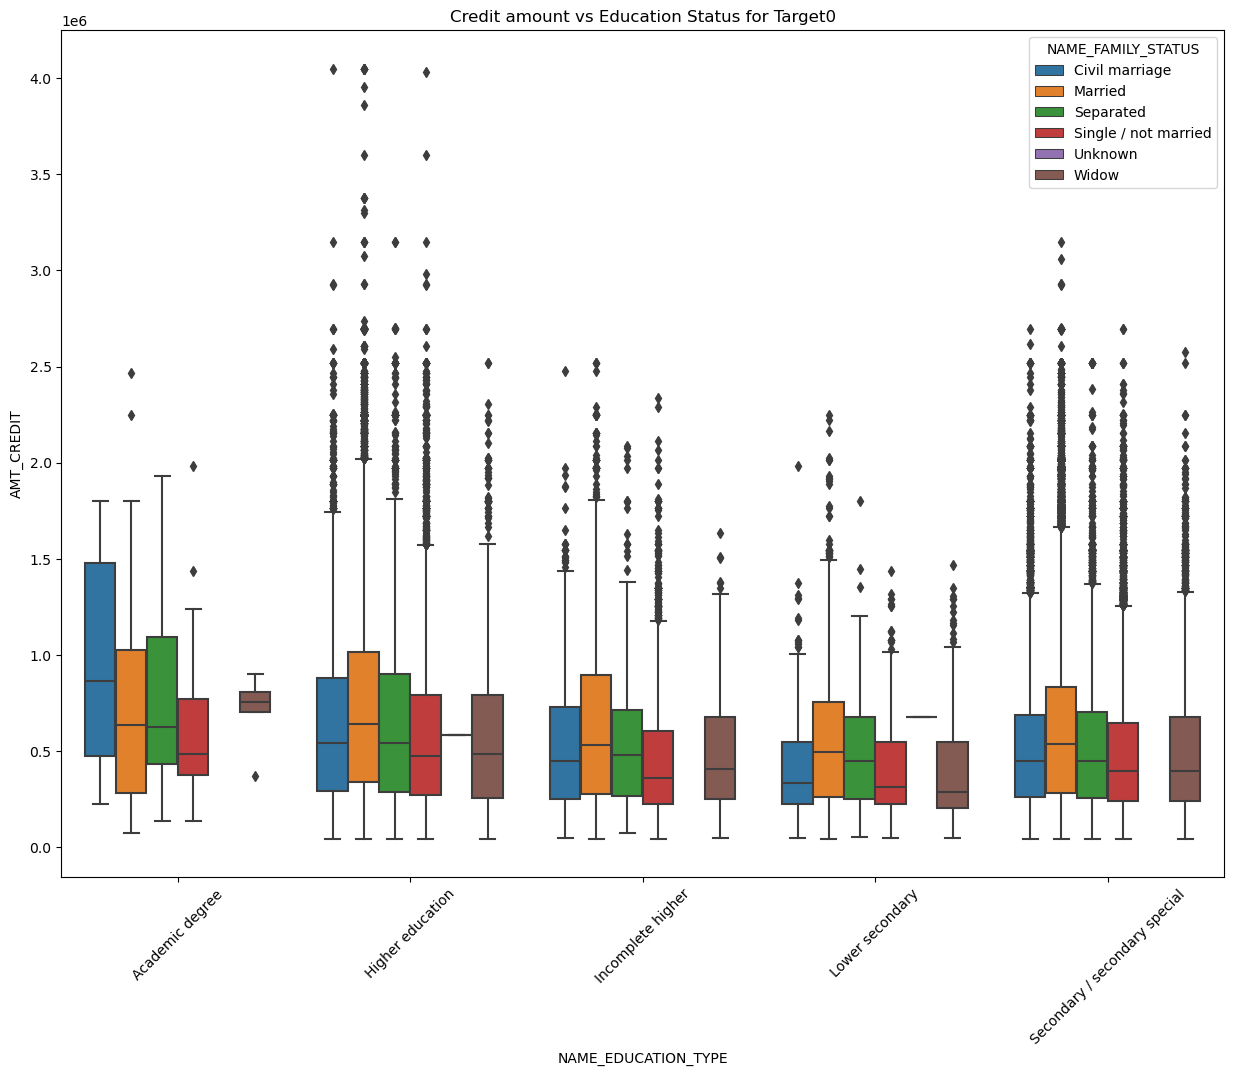

In [105]:
# Box plotting for Credit amount for Target 0

plt.figure(figsize=(15,11))
plt.xticks(rotation=45)
sns.boxplot(data =app_target0, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit amount vs Education Status for Target0')
plt.show()

> Insights - From the plot, 
1. Family status with 'Civil Marriage','Separated' and 'Married' from the 'Academic Degree' have higher number of credits than others.
2. Also, 'Higher Education' has more number of outliers.
3. The 'Civil Marriage' family status in the 'Academic Degree' have most of the credits in the third Quartile (Q3).

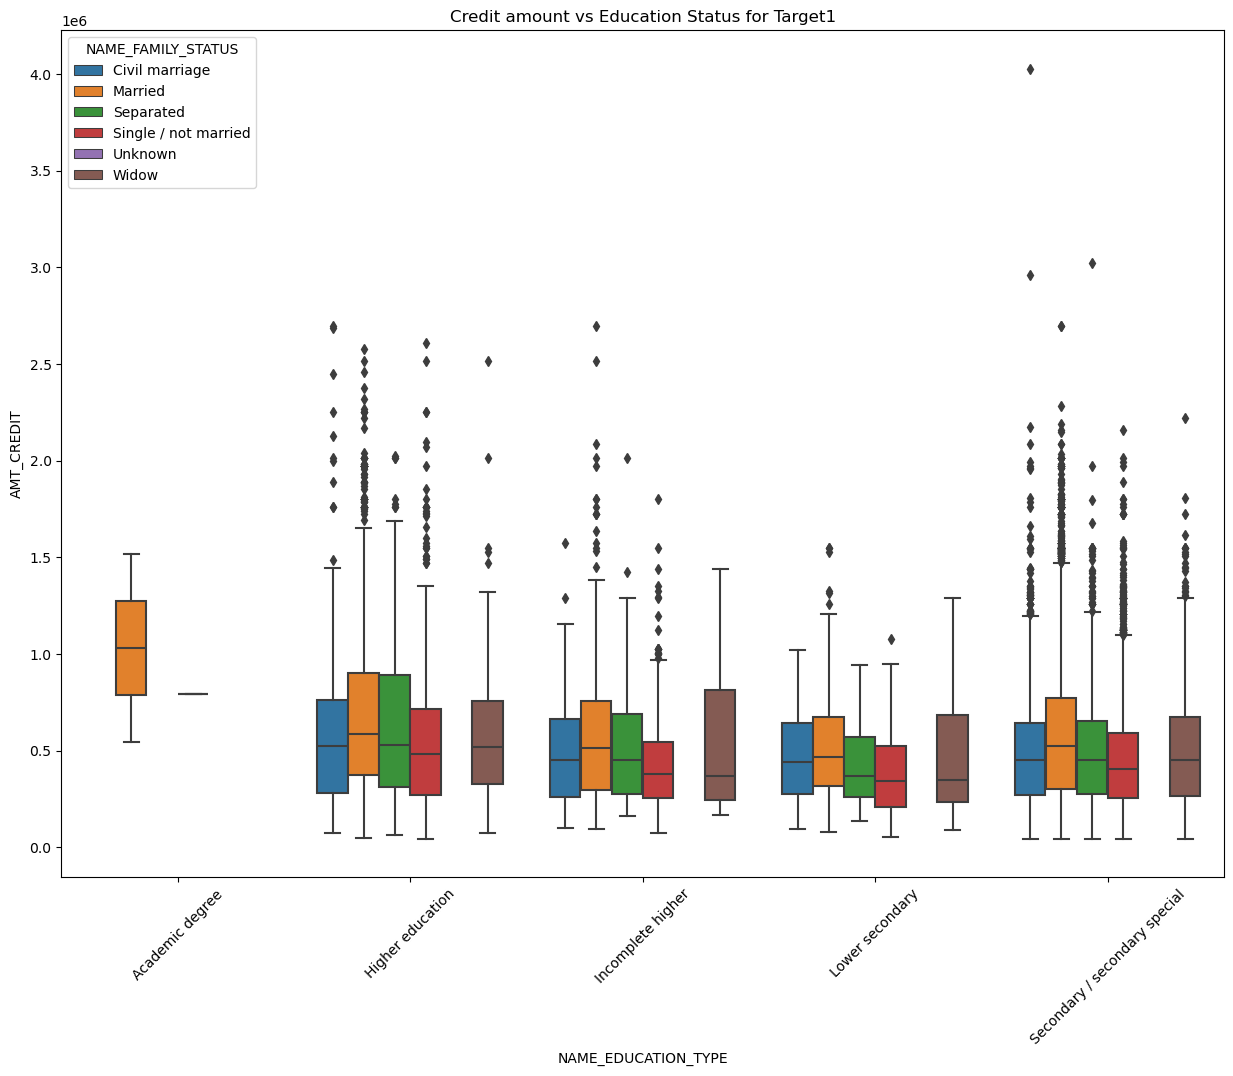

In [106]:
# Box plotting for Credit amount for Target 1

plt.figure(figsize=(15,11))
plt.xticks(rotation=45)
sns.boxplot(data =app_target1, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit amount vs Education Status for Target1')
plt.show()

>Insights - From the above boxplot, we can say that -
1. 'Married' family status of the 'Academic degree' education type has higher number of credits than others.
2. 'Secondary/Secondary Special' education type has higher number of outliers.
2. 'Academic degree' education type has no outliers and has no family status except for 'Married'.

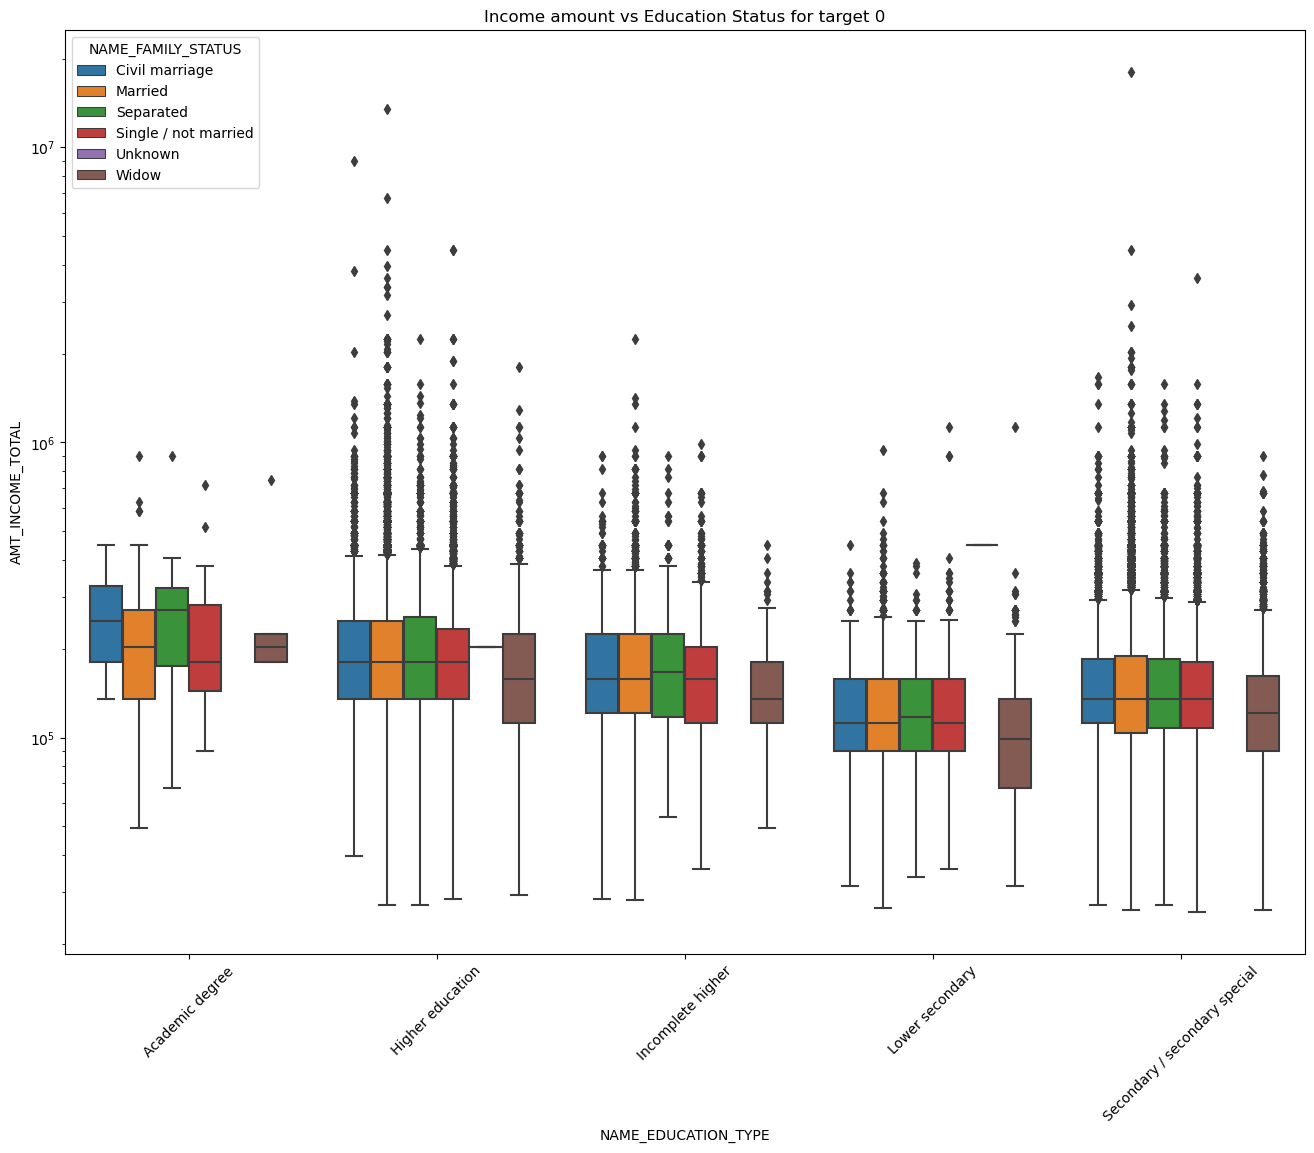

In [107]:
# Box plotting for Income amount for Target 0

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =app_target0, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status for target 0')
plt.show()

> Insights - From the above boxplot,
1. The income amount of Education Type 'Higher Education' is mostly equal to the family status.
2. The 'Higher Education' contains many outliers.
3. The 'Academic Degree' contains less outliers.
4. The income amount of 'Academic Degree' is higher than other Education types.

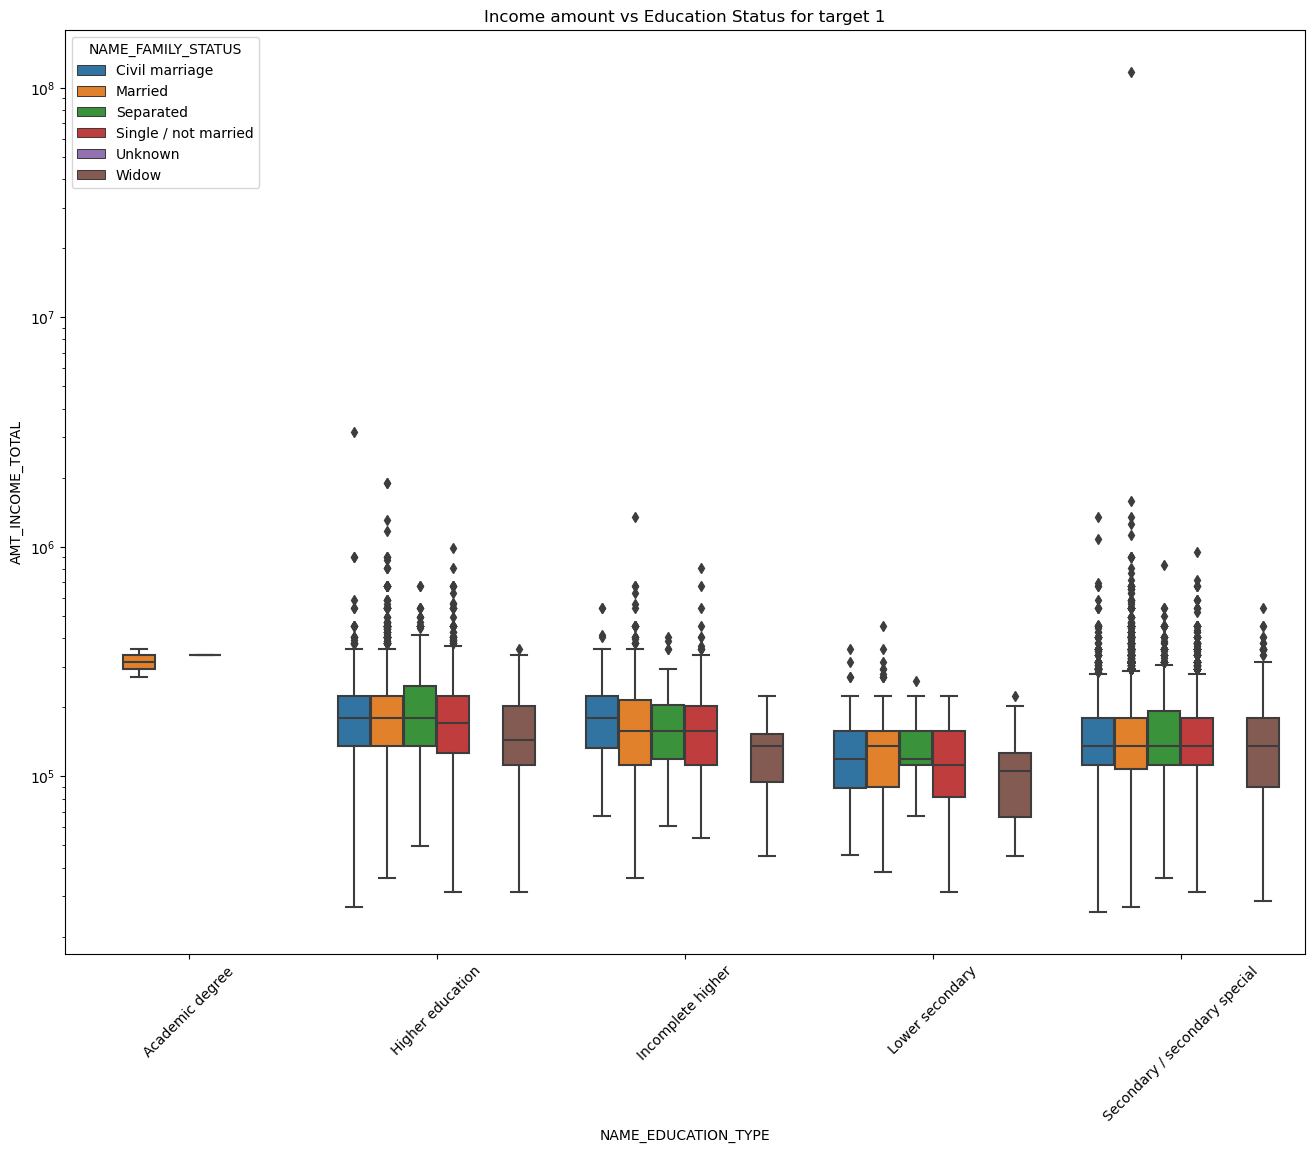

In [108]:
# Box plotting for Income amount for Target 1

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =app_target1, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status for target 1')
plt.show()

>Insights - From the above plot -
1. 'Higher Education' type has more number of outliers.
2. 'Academic degree' type has no outliers and no other family status except for 'Married'.
3. The 'Widow' family status of 'Lower Secondary' education type has less amount of income than others.
4. The 'Married' faily status of 'Academic Degree' education type has the highest amount of income.

# <b>_Two Segmented Analysis_ -

The 'TARGET' variable represents whether a loan applicant defaulted on a loan (1) or not (0), then a mean value closer to 1 would indicate a higher likelihood of default for a particular group, while a mean value closer to 0 would indicate a lower likelihood of default.

In [109]:
df_app['TARGET'] = pd.to_numeric(df_app['TARGET'])

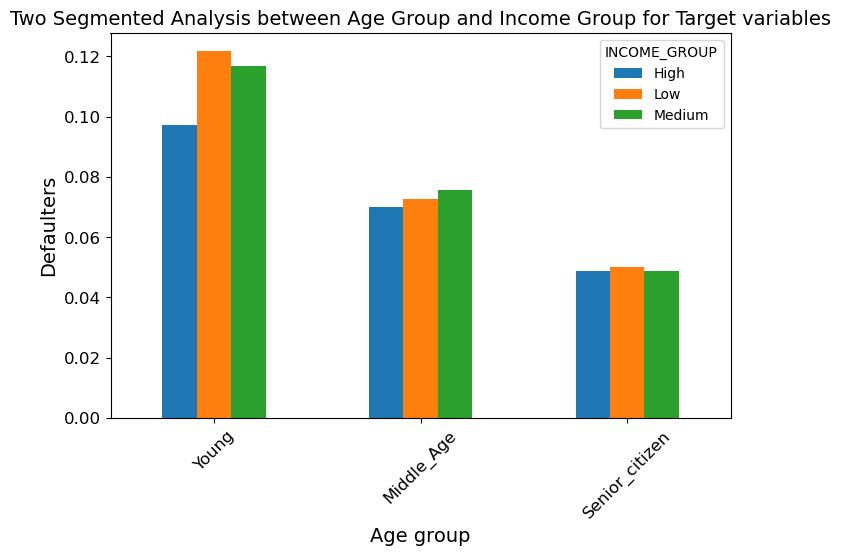

In [110]:
# Age Group and Income Group -
# Here the y-axis represents the mean value of the target. 
# If the mean value is closer to 1 - it indicates default/target 1
# If the mean value is closer to 0 - it indicates non-default/target 0

df_app.pivot_table(values='TARGET',index='AGE_GROUP',columns='INCOME_GROUP',aggfunc='mean').plot.bar(figsize=(8,5),rot=45)
plt.xlabel('Age group', fontsize=14)
plt.ylabel('Defaulters', fontsize=14)
plt.title("Two Segmented Analysis between Age Group and Income Group for Target variables", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

>Insights - 
1. 'Young' clients are more defaulted than others.
2. 'Young' 'Low' Income Group are more defaulted.

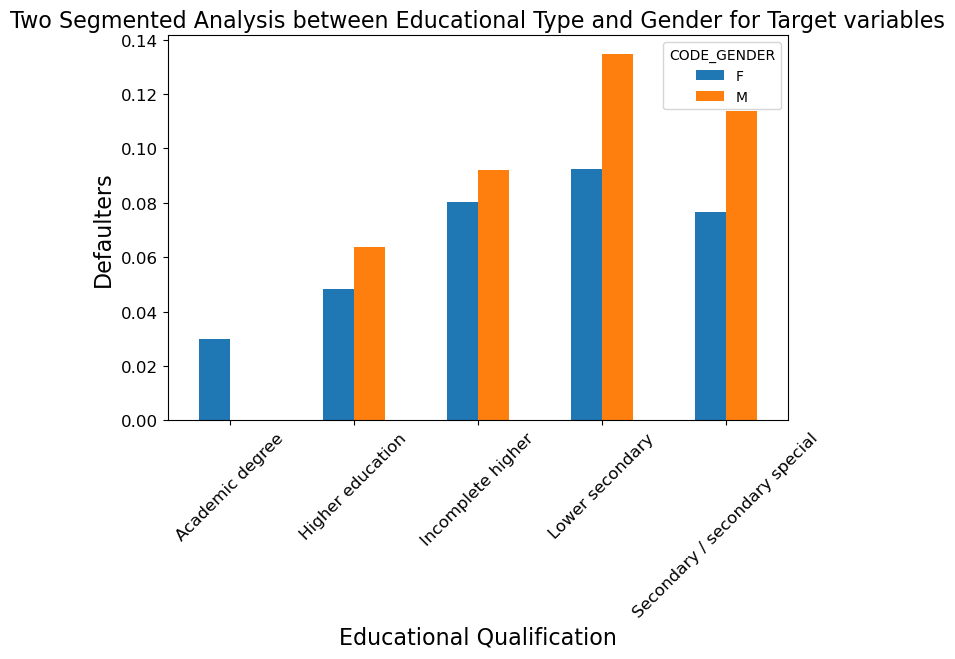

In [111]:
# Education and Gender -
# Here the y-axis represents the mean value of the target. 
# If the mean value is closer to 1 - it indicates default/target 1
# If the mean value is closer to 0 - it indicates non-default/target 0

df_app.pivot_table(values='TARGET',index='NAME_EDUCATION_TYPE',columns='CODE_GENDER',aggfunc='mean').plot.bar(figsize=(8,5),rot=45)
plt.xlabel('Educational Qualification', fontsize=16)
plt.ylabel('Defaulters', fontsize=16)
plt.title("Two Segmented Analysis between Educational Type and Gender for Target variables", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

> Insights -
1. 'Male' from 'Lower Secondary' and 'Secondary/Secondary special' education qualification are highly defaulted.
2. There are no 'Male' Defaulters in 'Academic degree' Educational Qualification.

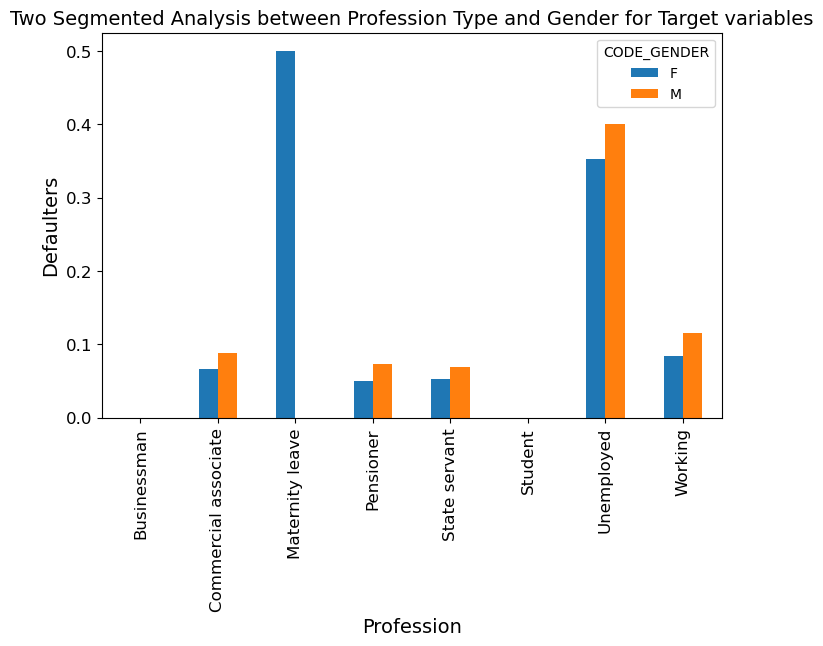

In [112]:
# Profession and Gender -
# Here the y-axis represents the mean value of the target. 
# If the mean value is closer to 1 - it indicates default/target 1
# If the mean value is closer to 0 - it indicates non-default/target 0

df_app.pivot_table(values='TARGET',index='NAME_INCOME_TYPE',columns='CODE_GENDER',aggfunc='mean').plot.bar(figsize=(8,5),rot=45)
plt.xlabel('Profession', fontsize=14)
plt.ylabel('Defaulters', fontsize=14)
plt.title("Two Segmented Analysis between Profession Type and Gender for Target variables", fontsize=14)
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=12)
plt.show()

> Insights - 
1. The 'Maternity leave' and 'Unemployed' clients are more defaulted.
2. The default rate is lesser in all other professions.
3. Males are more defaulted with their respective professions compared to females other than Maternity leave.

# <b> 2. _Previous Application_

### <b>_Data Loading and Inspection_

In [113]:
df_prev = pd.read_csv('previous_application.csv')

In [114]:
df_prev.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [115]:
df_prev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [116]:
df_prev.shape

(1670214, 37)

In [117]:
df_prev.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  \
count            5951.000000               5951.000000   1.670214e+06   
mean                0.188357                  0.773503  -8.806797e+02   
std                 0.087671                  0.100879   7.790997e+02   
min                 0.034781                  0.373150  -2.922000e+03   
25%                 0.160716                  0.715645  -1.300000e+03   
50%                 0.189122                  0.835095  -5.810000e+02   
75%                 0.193330                  0.852537  -2.800000e+02   
max                 1.000000                  1.000000  -1.000000e+00   

       SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count      1.670214e+06  1.297984e+06       997149.000000   997149.000000   
mean       3.139511e+02  1.605408e+01       342209.855039    13826.269337   
std        7.127443e+03  1.456729e+01        88916.115834    72444.869708   
min       -1.000000e+00  0.000000e+00        -2922.000000    -2892.000000   
25%       -1.000000e+00  6.000000e+00       365243.000000    -1628.000000   
50%        3.000000e+00  1.200000e+01       365243.000000     -831.000000   
75%        8.200000e+01  2.400000e+01       365243.000000     -411.000000   
max        4.000000e+06  8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.0000

### <b> _Data Cleaning and Missing Values Check_

In [118]:
# Replacing all XNA and XAP to np.nan because these values entered maybe blank or 'may not be applicable'.

df_prev.replace('XNA',np.nan,inplace=True)
df_prev.replace('XAP',np.nan,inplace=True)

In [119]:
# finding missing values in Previous Application dataset

prev_miss_values = round((df_app.isnull().sum()/len(df_app))*100, 2)
prev_miss_values

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE                       0.00
FLAG_EMAIL  

In [120]:
# Above 0% missing values in Previous Application dataset
prev_miss_values0 = prev_miss_values[prev_miss_values>0]
prev_miss_values0

AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
OCCUPATION_TYPE                 31.35
EXT_SOURCE_2                     0.21
EXT_SOURCE_3                    19.83
YEARS_BEGINEXPLUATATION_AVG     48.78
FLOORSMAX_AVG                   49.76
YEARS_BEGINEXPLUATATION_MODE    48.78
FLOORSMAX_MODE                  49.76
YEARS_BEGINEXPLUATATION_MEDI    48.78
FLOORSMAX_MEDI                  49.76
TOTALAREA_MODE                  48.27
EMERGENCYSTATE_MODE             47.40
OBS_30_CNT_SOCIAL_CIRCLE         0.33
DEF_30_CNT_SOCIAL_CIRCLE         0.33
OBS_60_CNT_SOCIAL_CIRCLE         0.33
DEF_60_CNT_SOCIAL_CIRCLE         0.33
AMT_REQ_CREDIT_BUREAU_HOUR      13.50
AMT_REQ_CREDIT_BUREAU_DAY       13.50
AMT_REQ_CREDIT_BUREAU_WEEK      13.50
AMT_REQ_CREDIT_BUREAU_MON       13.50
AMT_REQ_CREDIT_BUREAU_QRT       13.50
AMT_REQ_CREDIT_BUREAU_YEAR      13.50
dtype: float64

In [121]:
# Check for 50% and above missing values in Previous Application dataset 
prev_miss_values50 = prev_miss_values[prev_miss_values>=50]
prev_miss_values50

Series([], dtype: float64)

As there are none of the columns having missing values more than 50%, we need not delete any column on this basis.

### <b> _Dropping few unnecessary columns_ - 

We can drop few irrelevant columns that is not needed for analysis.

irrelevant_col =['HOUR_APPR_PROCESS_START','NFLAG_LAST_APPL_IN_DAY','DAYS_DECISION','SELLERPLACE_AREA']

df_prev.drop(axis=1, columns=irrelevant_col, inplace=True)

df_prev.shape

### <b> _DATA IMBALANCE_

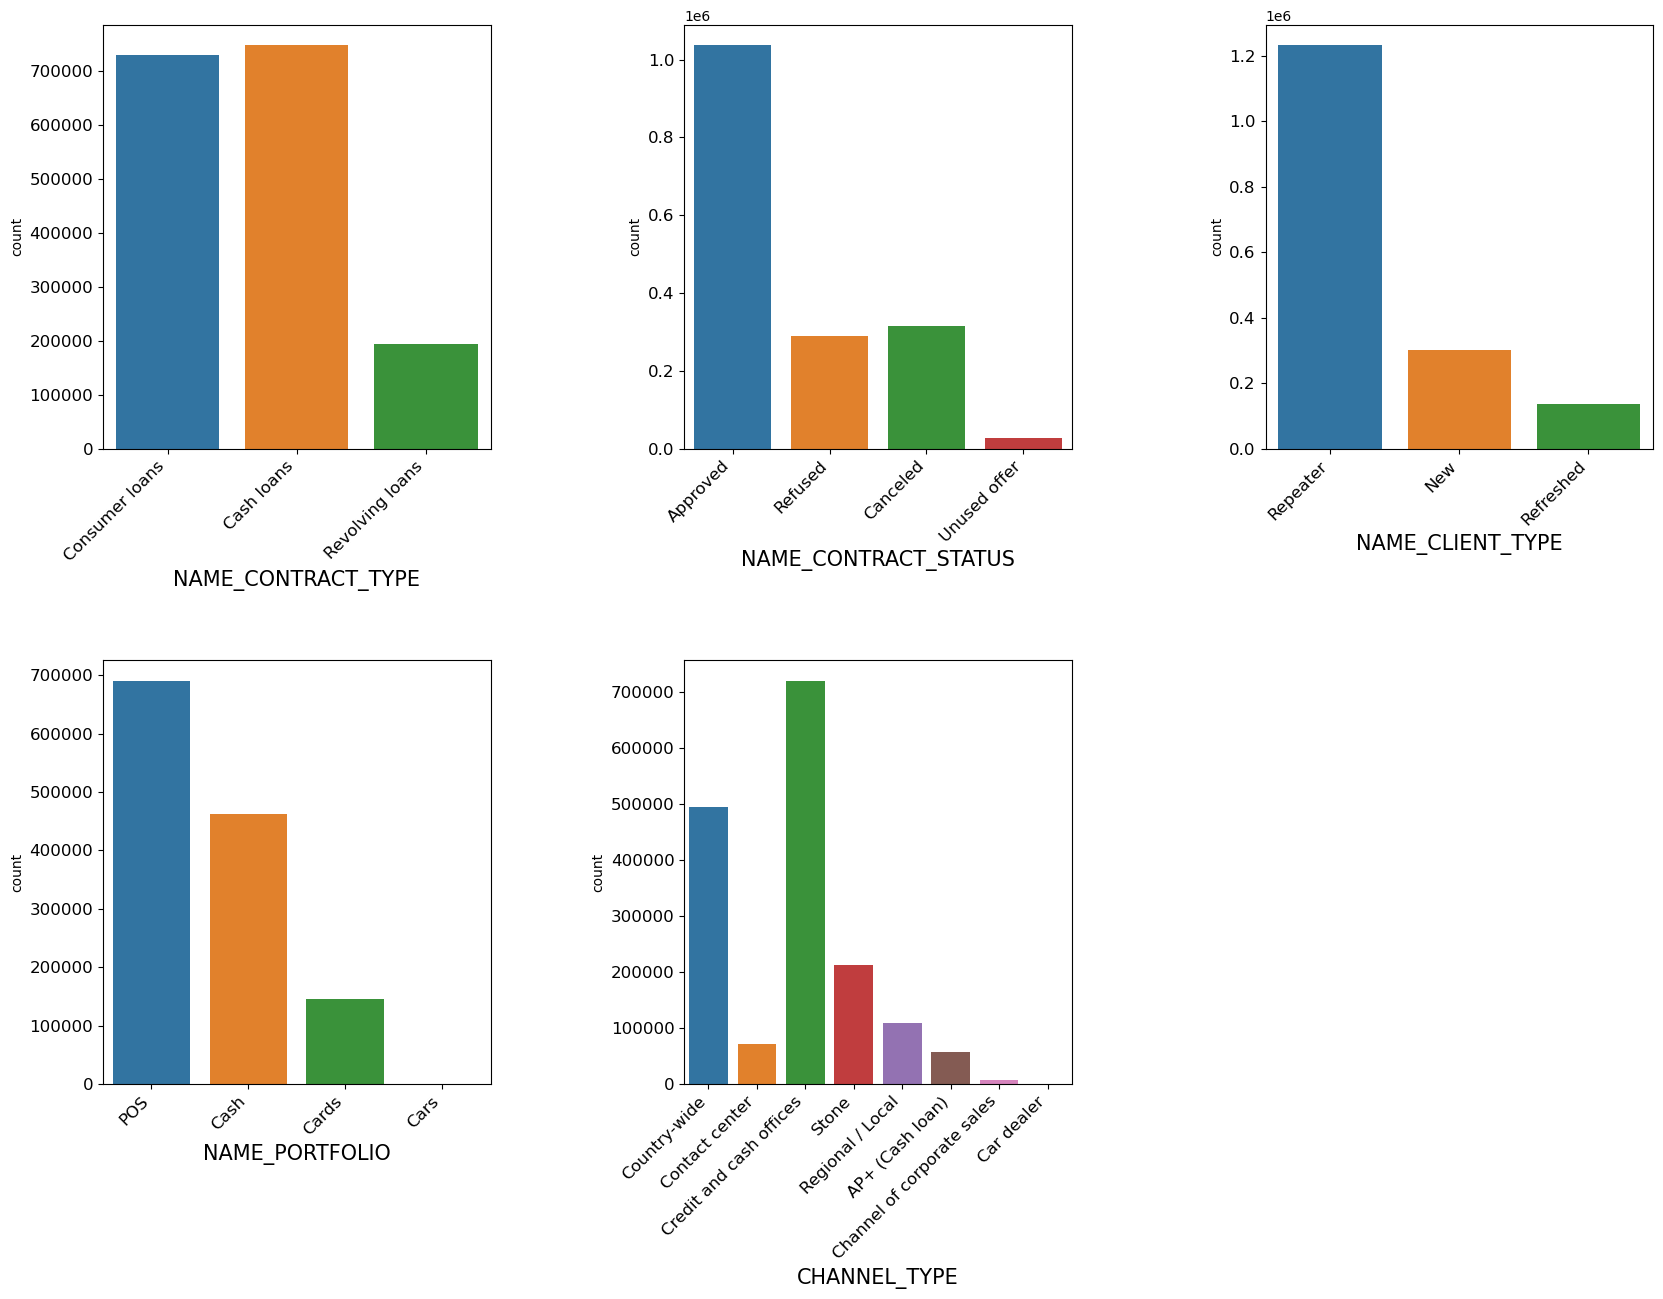

In [122]:
# Listing columns for check data imbalance and plotting them - Previous Application dataset

col_list = ['NAME_CONTRACT_TYPE','NAME_CONTRACT_STATUS','NAME_CLIENT_TYPE','NAME_PORTFOLIO','CHANNEL_TYPE']            
k=0
plt.figure(figsize=(20,22))
for col in col_list:    
    k=k+1
    plt.subplot(3, 3,k)    
    sns.countplot(x = col , data = df_prev )
    plt.xticks(rotation = 45, horizontalalignment='right', fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel(col,fontsize=15)
    plt.subplots_adjust(wspace = 0.5, hspace=0.5)

> Insights - 
1. NAME_CONTRACT_TYPE - There are very few 'Revolving Loans'.
2. NAME_CONTRACT_STATUS - There are few 'Refused' and 'Cancelled' loans and very few 'Un-used Offer' loans.
3. NAME_CLIENT_TYPE - There are few 'New Applicants' and fewer 'Refreshed Applicants'.
4. NAME_PORTFOLIO - Few applicants for Cards and almost non for Cars.
5. CHANNEL_TYPE - All other applicants are few in number exception for 'Country-wide' and 'Credit and cash offices'.

In [123]:
# DAYS_DECISION column has negative values.
# I will convert this column to MONTH_DECISION and to positive values for readability and analysis.

df_prev['DAYS_DECISION'].describe()

count    1.670214e+06
mean    -8.806797e+02
std      7.790997e+02
min     -2.922000e+03
25%     -1.300000e+03
50%     -5.810000e+02
75%     -2.800000e+02
max     -1.000000e+00
Name: DAYS_DECISION, dtype: float64

In [124]:
df_prev['MONTH_DECISION'] = abs(df_prev['DAYS_DECISION']//30)

In [125]:
df_prev['MONTH_DECISION'].describe()

count    1.670214e+06
mean     2.984034e+01
std      2.597065e+01
min      1.000000e+00
25%      1.000000e+01
50%      2.000000e+01
75%      4.400000e+01
max      9.800000e+01
Name: MONTH_DECISION, dtype: float64

In [126]:
# Dropping 'DAYS_DECISION' column

df_prev = df_prev.drop(['DAYS_DECISION'],axis=1)

In [127]:
df_prev.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    NaN             Approved   
1                       NaN                    NaN             Approved   
2                       NaN                    NaN             Approved   
3                       NaN                    NaN             Approved   
4                       NaN                Repairs              Refused   

       NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE NAME_CLIENT_TYPE  \
0  Cash through the bank                NaN              NaN         Repeater   
1                    NaN                NaN    Unaccompanied         Repeater   
2  Cash through the bank                NaN  Spouse, partner         Repeater   
3  Cash through the bank                NaN              NaN         Repeater   
4  Cash through the bank                 HC              NaN         Repeater   

  NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0              Mobile            POS               NaN   
1                 NaN           Cash            x-sell   
2                 NaN           Cash            x-sell   
3                 NaN           Cash            x-sell   
4                 NaN           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  NaN   
2  Credit and cash offices                -1                  NaN   
3  Credit and cash offices                -1                  NaN   
4  Credit and cash offices                -1                  NaN   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
0           -

In [128]:
# Converting negative values to positive values.

df_prev['SELLERPLACE_AREA'] = abs(df_prev['SELLERPLACE_AREA'])
df_prev['DAYS_FIRST_DUE'] = abs(df_prev['DAYS_FIRST_DUE'])
df_prev['DAYS_LAST_DUE_1ST_VERSION'] = abs(df_prev['DAYS_LAST_DUE_1ST_VERSION'])
df_prev['DAYS_LAST_DUE'] = abs(df_prev['DAYS_LAST_DUE'])
df_prev['DAYS_TERMINATION'] = abs(df_prev['DAYS_TERMINATION'])

In [129]:
df_prev.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    NaN             Approved   
1                       NaN                    NaN             Approved   
2                       NaN                    NaN             Approved   
3                       NaN                    NaN             Approved   
4                       NaN                Repairs              Refused   

       NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE NAME_CLIENT_TYPE  \
0  Cash through the bank                NaN              NaN         Repeater   
1                    NaN                NaN    Unaccompanied         Repeater   
2  Cash through the bank                NaN  Spouse, partner         Repeater   
3  Cash through the bank                NaN              NaN         Repeater   
4  Cash through the bank                 HC              NaN         Repeater   

  NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0              Mobile            POS               NaN   
1                 NaN           Cash            x-sell   
2                 NaN           Cash            x-sell   
3                 NaN           Cash            x-sell   
4                 NaN           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                 1                  NaN   
2  Credit and cash offices                 1                  NaN   
3  Credit and cash offices                 1                  NaN   
4  Credit and cash offices                 1                  NaN   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
0            

# <b> _Merging Current Application and Previous Application datasets_

In [130]:
# Relevant Columns taken from application_data.csv dataset for easier analysis

cols_current = ['SK_ID_CURR','TARGET','CODE_GENDER','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','AGE_GROUP','INCOME_GROUP']

In [131]:
# creating new dataset from current application for merging

df_current_to_merge = df_app[cols_current]
df_current_to_merge.head()

SK_ID_CURR  TARGET CODE_GENDER            NAME_EDUCATION_TYPE  \
0     100002       1           M  Secondary / secondary special   
1     100003       0           F               Higher education   
2     100004       0           M  Secondary / secondary special   
3     100006       0           F  Secondary / secondary special   
4     100007       0           M  Secondary / secondary special   

     NAME_FAMILY_STATUS   AGE_GROUP INCOME_GROUP  
0  Single / not married       Young         High  
1               Married  Middle_Age         High  
2  Single / not married  Middle_Age          Low  
3        Civil marriage  Middle_Age       Medium  
4  Single / not married  Middle_Age       Medium

In [132]:
# Deleting Unnecessary Columns not needed for analysis

cols_prev_to_drop = ['SELLERPLACE_AREA','PRODUCT_COMBINATION','AMT_GOODS_PRICE','AMT_DOWN_PAYMENT','NFLAG_LAST_APPL_IN_DAY','FLAG_LAST_APPL_PER_CONTRACT','RATE_DOWN_PAYMENT','RATE_INTEREST_PRIMARY','RATE_INTEREST_PRIVILEGED']

In [133]:
# Creating a dataset from previous application for merging

df_prev_to_merge = df_prev.drop(cols_prev_to_drop,axis=1)
df_prev_to_merge.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0     17145.0                   SATURDAY                       15   
1    679671.0                   THURSDAY                       11   
2    136444.5                    TUESDAY                       11   
3    470790.0                     MONDAY                        7   
4    404055.0                   THURSDAY                        9   

  NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS      NAME_PAYMENT_TYPE  \
0                    NaN             Approved  Cash through the bank   
1                    NaN             Approved                    NaN   
2                    NaN             Approved  Cash through the bank   
3                    NaN             Approved  Cash through the bank   
4                Repairs              Refused  Cash through the bank   

  CODE_REJECT_REASON  NAME_TYPE_SUITE NAME_CLIENT_TYPE NAME_GOODS_CATEGORY  \
0                NaN              NaN         Repeater              Mobile   
1                NaN    Unaccompanied         Repeater                 NaN   
2                NaN  Spouse, partner         Repeater                 NaN   
3                NaN              NaN         Repeater                 NaN   
4                 HC              NaN         Repeater                 NaN   

  NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  \
0            POS               NaN             Country-wide   
1           Cash            x-sell           Contact center   
2           Cash            x-sell  Credit and cash offices   
3           Cash            x-sell  Credit and cash offices   
4           Cash           walk-in  Credit and cash offices   

  NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP  DAYS_FIRST_DRAWING  \
0         Connectivity         12.0           middle            365243.0   
1                  NaN         36.0       low_action            365243.0   
2                  NaN         12.0             high            365243.0   
3                  NaN         12.0           middle            365243.0   
4                  NaN         24.0             high                 NaN   

   DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
0            42.0                      300.0           42.0              37.0   
1           134.0                      916.0       365243.0          365243.0   
2           271.0                       59.0       365243.0          365243.0   
3           482.0                      152.0          182.0             177.0   
4             NaN                        NaN            NaN               NaN   

   NFLAG_INSURED_ON_APPROVAL  MONTH_DECISION  
0                        0.0               3  
1                        1.0               6  
2                        1.0              11  
3                        1.0              18  
4                        NaN              27

In [134]:
# Merging both the datasets

df_merged = pd.merge(df_prev_to_merge,df_current_to_merge, on='SK_ID_CURR', how='left')
df_merged.head()

SK_ID_PREV SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495     271877     Consumer loans     1730.430          17145.0   
1     2802425     108129         Cash loans    25188.615         607500.0   
2     2523466     122040         Cash loans    15060.735         112500.0   
3     2819243     176158         Cash loans    47041.335         450000.0   
4     1784265     202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0     17145.0                   SATURDAY                       15   
1    679671.0                   THURSDAY                       11   
2    136444.5                    TUESDAY                       11   
3    470790.0                     MONDAY                        7   
4    404055.0                   THURSDAY                        9   

  NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS      NAME_PAYMENT_TYPE  \
0                    NaN             Approved  Cash through the bank   
1                    NaN             Approved                    NaN   
2                    NaN             Approved  Cash through the bank   
3                    NaN             Approved  Cash through the bank   
4                Repairs              Refused  Cash through the bank   

  CODE_REJECT_REASON  NAME_TYPE_SUITE NAME_CLIENT_TYPE NAME_GOODS_CATEGORY  \
0                NaN              NaN         Repeater              Mobile   
1                NaN    Unaccompanied         Repeater                 NaN   
2                NaN  Spouse, partner         Repeater                 NaN   
3                NaN              NaN         Repeater                 NaN   
4                 HC              NaN         Repeater                 NaN   

  NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  \
0            POS               NaN             Country-wide   
1           Cash            x-sell           Contact center   
2           Cash            x-sell  Credit and cash offices   
3           Cash            x-sell  Credit and cash offices   
4           Cash           walk-in  Credit and cash offices   

  NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP  DAYS_FIRST_DRAWING  \
0         Connectivity         12.0           middle            365243.0   
1                  NaN         36.0       low_action            365243.0   
2                  NaN         12.0             high            365243.0   
3                  NaN         12.0           middle            365243.0   
4                  NaN         24.0             high                 NaN   

   DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
0            42.0                      300.0           42.0              37.0   
1           134.0                      916.0       365243.0          365243.0   
2           271.0                       59.0       365243.0          365243.0   
3           482.0                      152.0          182.0             177.0   
4             NaN                        NaN            NaN               NaN   

   NFLAG_INSURED_ON_APPROVAL  MONTH_DECISION  TARGET CODE_GENDER  \
0                        0.0               3     0.0           F   
1                        1.0               6     0.0           F   
2                        1.0              11     0.0           F   
3                        1.0              18     0.0           M   
4                        NaN              27     0.0           F   

             NAME_EDUCATION_TYPE NAME_FAMILY_STATUS   AGE_GROUP INCOME_GROUP  
0              Incomplete higher            Married  Middle_Age         High  
1  Secondary / secondary special     Civil marriage  Middle_Age          Low  
2  Secondary / secondary special            Married       Young          Low  
3  Secondary / secondary special            Married  Middle_Age         High  
4  Secondary / secondary special            Married       Young         High

In [135]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 34 columns):
 #   Column                      Non-Null Count    Dtype   
---  ------                      --------------    -----   
 0   SK_ID_PREV                  1670214 non-null  int64   
 1   SK_ID_CURR                  1670214 non-null  object  
 2   NAME_CONTRACT_TYPE          1669868 non-null  object  
 3   AMT_ANNUITY                 1297979 non-null  float64 
 4   AMT_APPLICATION             1670214 non-null  float64 
 5   AMT_CREDIT                  1670213 non-null  float64 
 6   WEEKDAY_APPR_PROCESS_START  1670214 non-null  object  
 7   HOUR_APPR_PROCESS_START     1670214 non-null  int64   
 8   NAME_CASH_LOAN_PURPOSE      69635 non-null    object  
 9   NAME_CONTRACT_STATUS        1670214 non-null  object  
 10  NAME_PAYMENT_TYPE           1042830 non-null  object  
 11  CODE_REJECT_REASON          311877 non-null   object  
 12  NAME_TYPE_SUITE             849809 non-nul

In [136]:
df_merged.shape

(1670214, 34)

In [137]:
df_merged.describe()

SK_ID_PREV   AMT_ANNUITY  AMT_APPLICATION    AMT_CREDIT  \
count  1.670214e+06  1.297979e+06     1.670214e+06  1.670213e+06   
mean   1.923089e+06  1.595512e+04     1.752339e+05  1.961140e+05   
std    5.325980e+05  1.478214e+04     2.927798e+05  3.185746e+05   
min    1.000001e+06  0.000000e+00     0.000000e+00  0.000000e+00   
25%    1.461857e+06  6.321780e+03     1.872000e+04  2.416050e+04   
50%    1.923110e+06  1.125000e+04     7.104600e+04  8.054100e+04   
75%    2.384280e+06  2.065842e+04     1.803600e+05  2.164185e+05   
max    2.845382e+06  4.180581e+05     6.905160e+06  6.905160e+06   

       HOUR_APPR_PROCESS_START   CNT_PAYMENT  DAYS_FIRST_DRAWING  \
count             1.670214e+06  1.297984e+06       997149.000000   
mean              1.248418e+01  1.605408e+01       342209.855039   
std               3.334028e+00  1.456729e+01        88916.115834   
min               0.000000e+00  0.000000e+00        -2922.000000   
25%               1.000000e+01  6.000000e+00       365243.000000   
50%               1.200000e+01  1.200000e+01       365243.000000   
75%               1.500000e+01  2.400000e+01       365243.000000   
max               2.300000e+01  8.400000e+01       365243.000000   

       DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  \
count   997149.000000              997149.000000  997149.000000   
mean     15949.224065               35163.363265   78152.730207   
std      72007.270877              106405.950190  148833.342466   
min          2.000000                   0.000000       2.000000   
25%        475.000000                 257.000000     455.000000   
50%        921.000000                 741.000000    1155.000000   
75%       1825.000000                1735.000000    2418.000000   
max     365243.000000              365243.000000  365243.000000   

       DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL  MONTH_DECISION  \
count     997149.000000              997149.000000    1.670214e+06   
mean       83505.775017                   0.332570    2.984034e+01   
std       152484.418802                   0.471134    2.597065e+01   
min            2.000000                   0.000000    1.000000e+00   
25%          447.000000                   0.000000    1.000000e+01   
50%         1171.000000                   0.000000    2.000000e+01   
75%         2501.000000                   1.000000    4.400000e+01   
max       365243.000000                   1.000000    9.800000e+01   

             TARGET  
count  1.413701e+06  
mean   8.655296e-02  
std    2.811789e-01  
min    0.000000e+00  
25%    0.000000e+00  
50%    0.000000e+00  
75%    0.000000e+00  
max    1.000000e+00

In [138]:
df_merged.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON',
       'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY',
       'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE',
       'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL',
       'MONTH_DECISION', 'TARGET', 'CODE_GENDER', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'AGE_GROUP', 'INCOME_GROUP'],
      dtype='object')

<b> Data Cleaning and Missing Value Check

Check if there are any null values present in the TARGET Variable after merging

In [139]:
len(df_merged[np.isnan(df_merged['TARGET'])])

256513

As there are records of null values present, I will remove them for easier analysis

In [140]:
df_merged = df_merged[(~(np.isnan(df_merged['TARGET'])))]  

In [141]:
# Converting TARGET column from float64 to Int64

df_merged['TARGET'] = df_merged['TARGET'].astype('int64')

In [142]:
df_merged.head()

SK_ID_PREV SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495     271877     Consumer loans     1730.430          17145.0   
1     2802425     108129         Cash loans    25188.615         607500.0   
2     2523466     122040         Cash loans    15060.735         112500.0   
3     2819243     176158         Cash loans    47041.335         450000.0   
4     1784265     202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0     17145.0                   SATURDAY                       15   
1    679671.0                   THURSDAY                       11   
2    136444.5                    TUESDAY                       11   
3    470790.0                     MONDAY                        7   
4    404055.0                   THURSDAY                        9   

  NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS      NAME_PAYMENT_TYPE  \
0                    NaN             Approved  Cash through the bank   
1                    NaN             Approved                    NaN   
2                    NaN             Approved  Cash through the bank   
3                    NaN             Approved  Cash through the bank   
4                Repairs              Refused  Cash through the bank   

  CODE_REJECT_REASON  NAME_TYPE_SUITE NAME_CLIENT_TYPE NAME_GOODS_CATEGORY  \
0                NaN              NaN         Repeater              Mobile   
1                NaN    Unaccompanied         Repeater                 NaN   
2                NaN  Spouse, partner         Repeater                 NaN   
3                NaN              NaN         Repeater                 NaN   
4                 HC              NaN         Repeater                 NaN   

  NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  \
0            POS               NaN             Country-wide   
1           Cash            x-sell           Contact center   
2           Cash            x-sell  Credit and cash offices   
3           Cash            x-sell  Credit and cash offices   
4           Cash           walk-in  Credit and cash offices   

  NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP  DAYS_FIRST_DRAWING  \
0         Connectivity         12.0           middle            365243.0   
1                  NaN         36.0       low_action            365243.0   
2                  NaN         12.0             high            365243.0   
3                  NaN         12.0           middle            365243.0   
4                  NaN         24.0             high                 NaN   

   DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
0            42.0                      300.0           42.0              37.0   
1           134.0                      916.0       365243.0          365243.0   
2           271.0                       59.0       365243.0          365243.0   
3           482.0                      152.0          182.0             177.0   
4             NaN                        NaN            NaN               NaN   

   NFLAG_INSURED_ON_APPROVAL  MONTH_DECISION  TARGET CODE_GENDER  \
0                        0.0               3       0           F   
1                        1.0               6       0           F   
2                        1.0              11       0           F   
3                        1.0              18       0           M   
4                        NaN              27       0           F   

             NAME_EDUCATION_TYPE NAME_FAMILY_STATUS   AGE_GROUP INCOME_GROUP  
0              Incomplete higher            Married  Middle_Age         High  
1  Secondary / secondary special     Civil marriage  Middle_Age          Low  
2  Secondary / secondary special            Married       Young          Low  
3  Secondary / secondary special            Married  Middle_Age         High  
4  Secondary / secondary special            Married       Young         High

# _Analysis on Merged DataSet_

<b> a) UNIVARIATE ANALYSIS on Merged Dataset

>On Categorical Variable

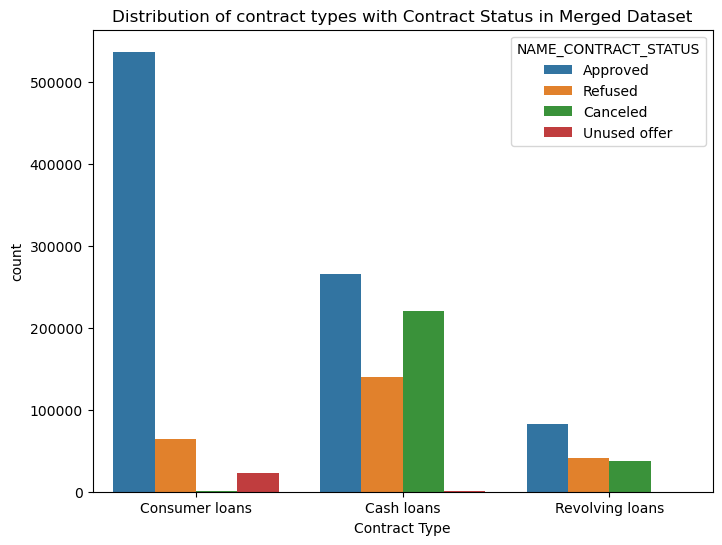

In [143]:
#  Contract Type

plt.figure(figsize=(8,6))   
sns.countplot(x = 'NAME_CONTRACT_TYPE',hue = 'NAME_CONTRACT_STATUS',data=df_merged)
plt.xlabel('Contract Type')
plt.title('Distribution of contract types with Contract Status in Merged Dataset')
plt.show()

>Insights - 
1. 'Consumer' type of loan has the highest number of 'Approved' counts.
2. 'Consumer' type of loan has the least or almost none number of 'Cancelled' loan status.

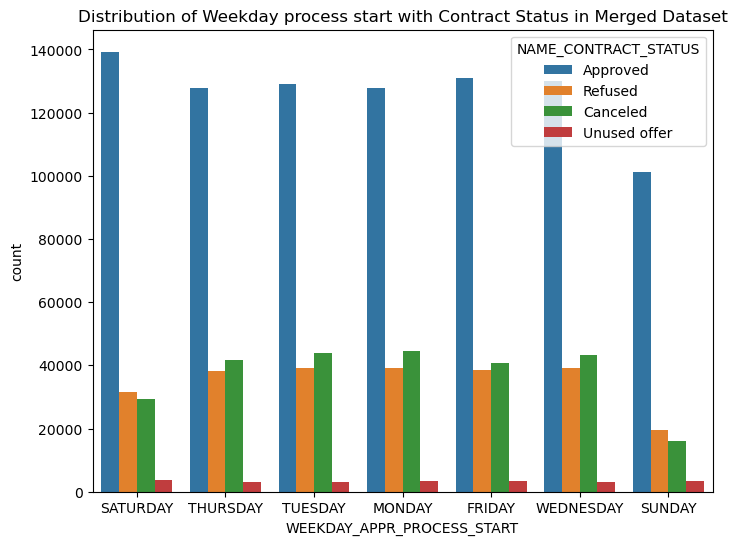

In [144]:
# Client Type

plt.figure(figsize=(8,6))   
sns.countplot(x = 'WEEKDAY_APPR_PROCESS_START',hue = 'NAME_CONTRACT_STATUS',data=df_merged)
plt.xlabel('WEEKDAY_APPR_PROCESS_START')
plt.title('Distribution of Weekday process start with Contract Status in Merged Dataset')
plt.show()

> Insights - Saturday has the highest Approval rate.

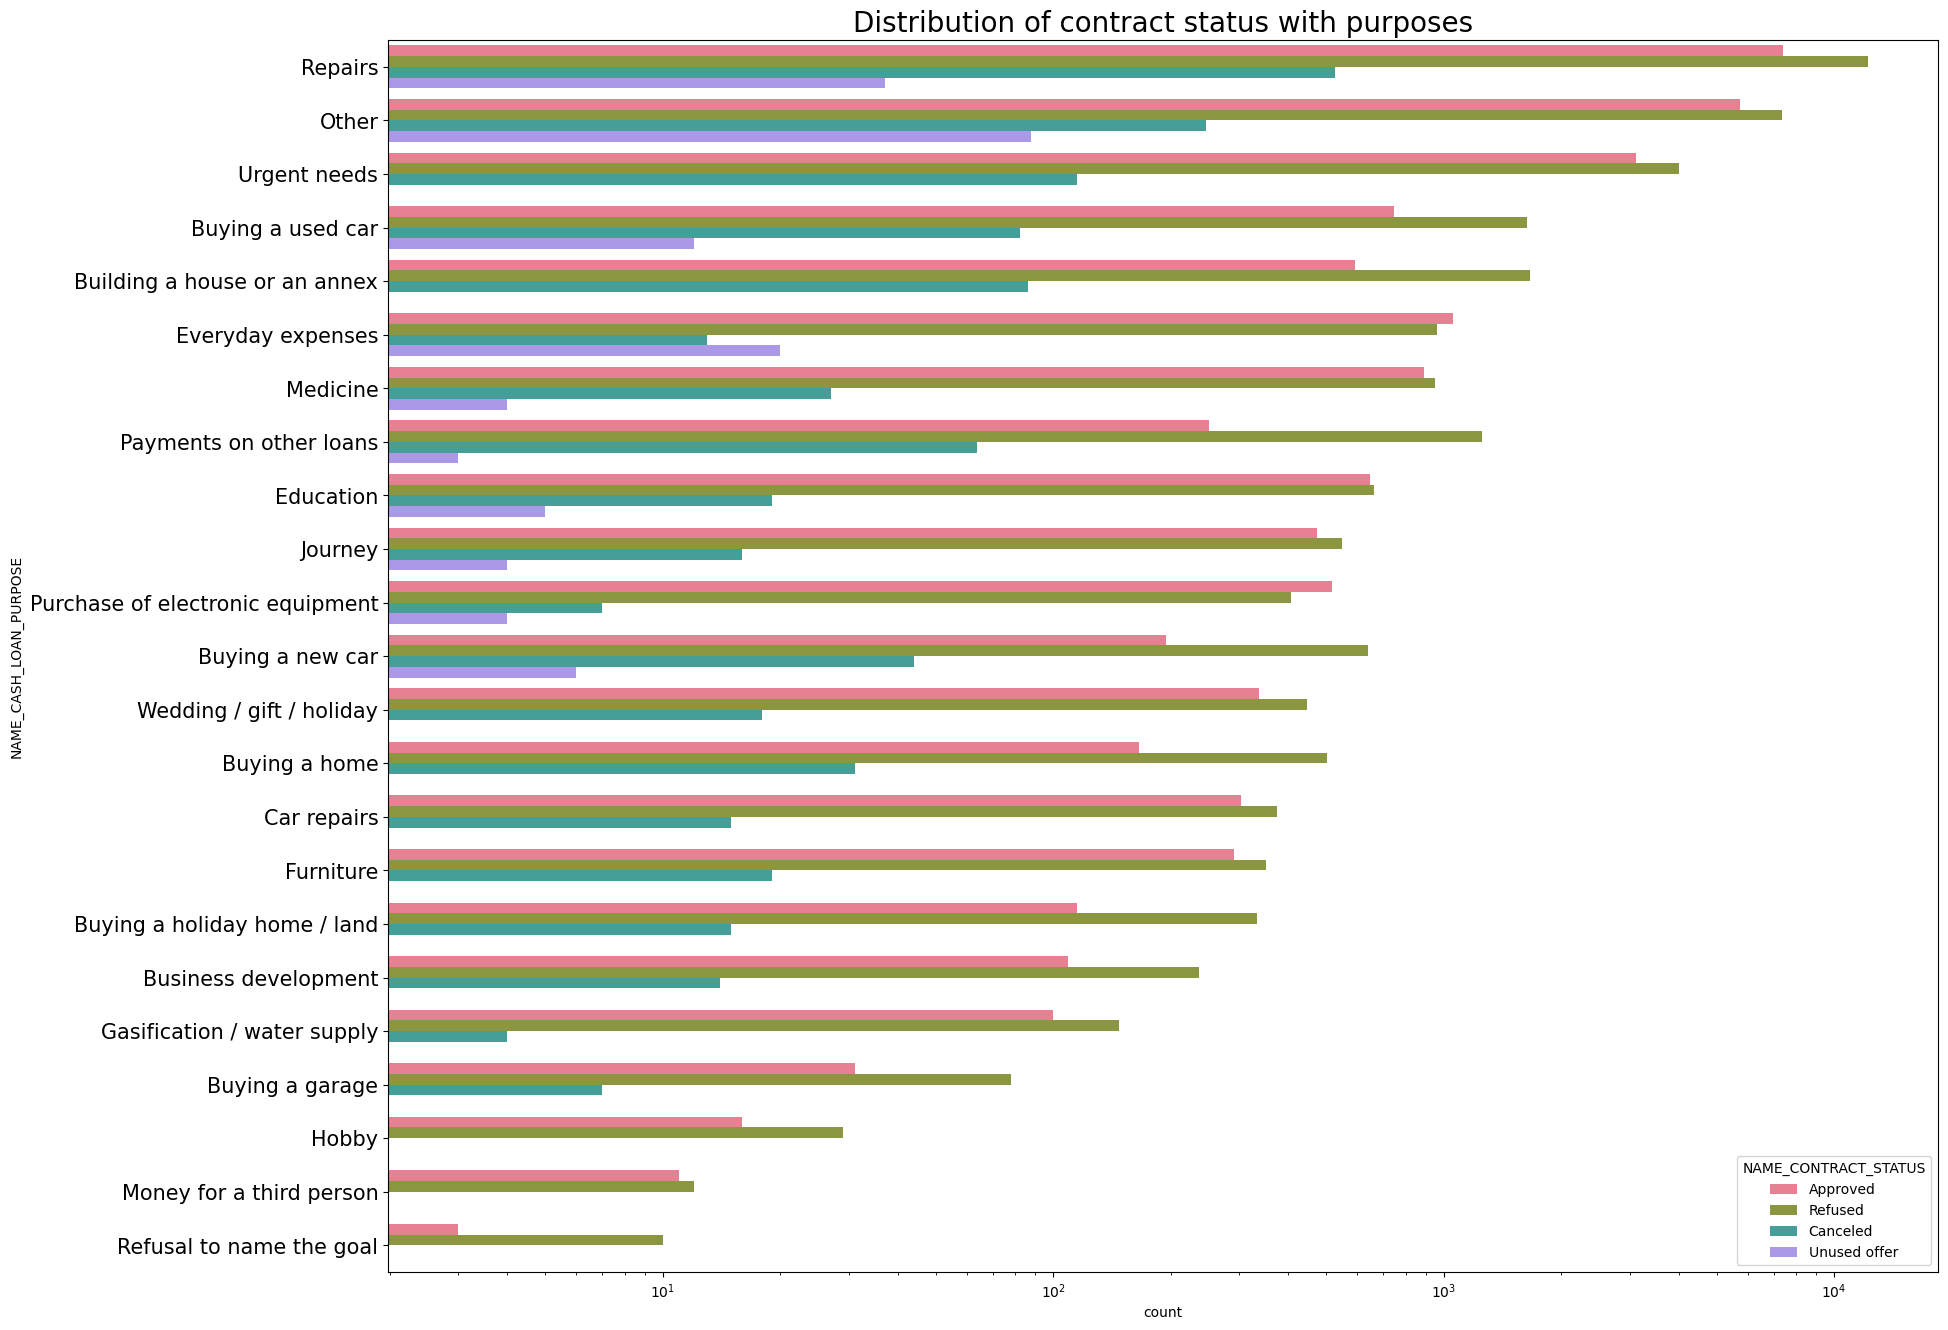

In [145]:
# Distribution of contract status with purposes

plt.figure(figsize=(20, 16))
plt.yticks(rotation=360, fontsize=15)
plt.xscale('log')
plt.title('Distribution of contract status with purposes', fontsize=20)

sns.countplot(data=df_merged, y='NAME_CASH_LOAN_PURPOSE', order=df_merged['NAME_CASH_LOAN_PURPOSE'].value_counts().index, hue='NAME_CONTRACT_STATUS', palette='husl')

plt.show()

>Insights - 
1. There are higher number of 'Refused' counts for loans with 'Repair' purpose.
2. For 'Education' purpose, there are almost equal number of counts of 'Approved' and 'Refused'.
3. 'Payments on other loans' and 'Buying a new car' have higher Rejections than Approvals.

In [146]:
df_merged['TARGET'] = df_merged['TARGET'].astype(str)

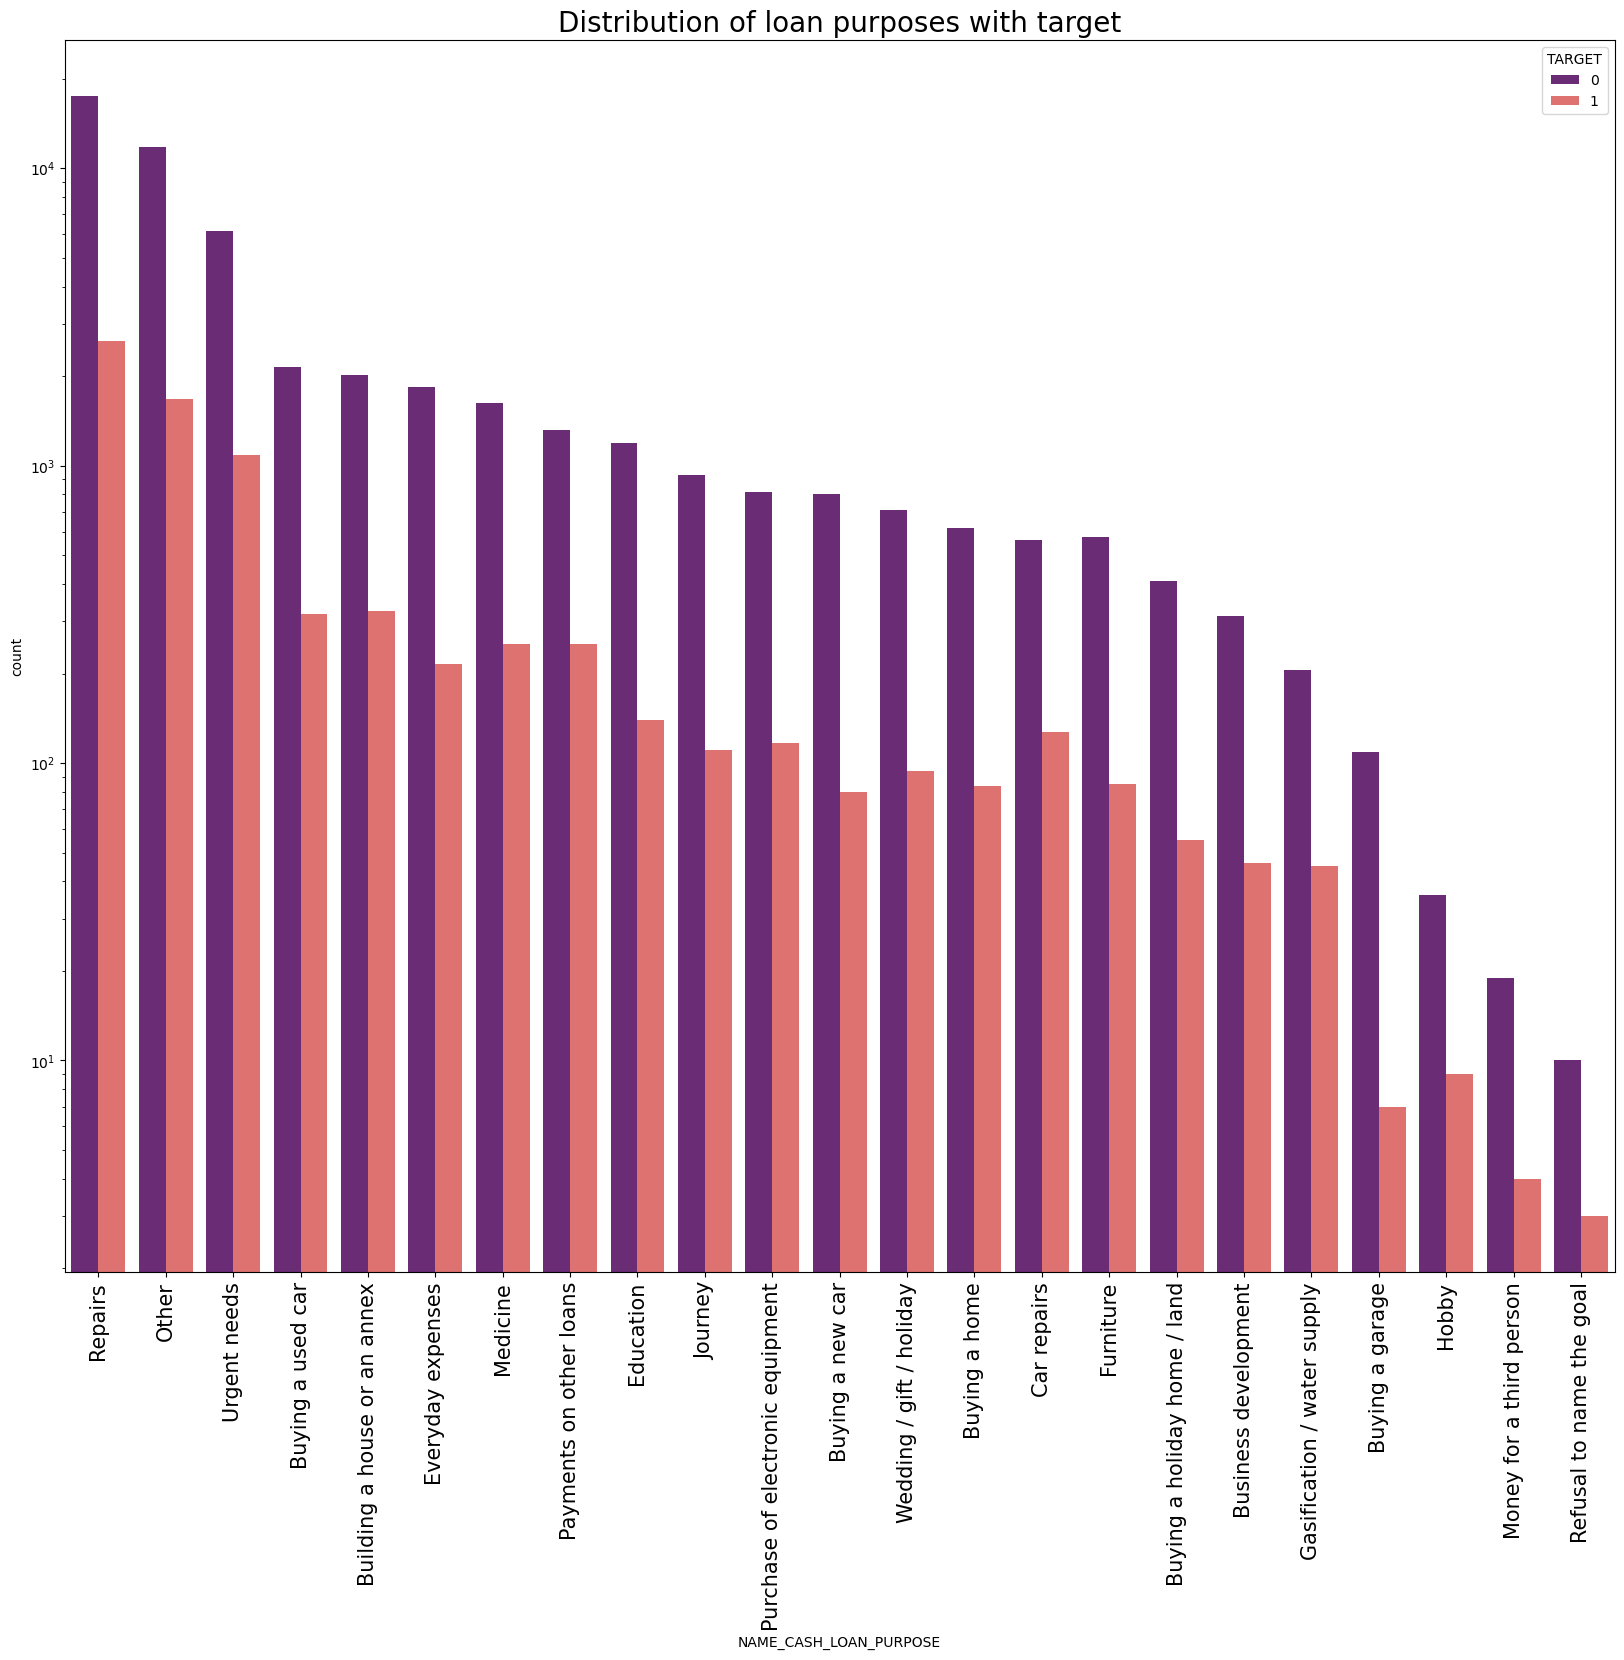

In [147]:
# Distribution of loan purposes with targets

plt.figure(figsize=(20, 16))
plt.xticks(rotation=90, fontsize=15)
plt.yscale('log')
plt.title('Distribution of loan purposes with target',fontsize=20)

sns.countplot(data=df_merged, x='NAME_CASH_LOAN_PURPOSE', order=df_merged['NAME_CASH_LOAN_PURPOSE'].value_counts().index, hue='TARGET', palette='magma')

plt.show()

>Insights - 
1. Loan purposes with 'Repairs' are facing more difficulties in payment on time.
2. Almost in all, there are higher number of loan payment on time without any difficulties (target 0), than target1.
3. Purposes with 'Buying a garage','Money for a third person' and 'Refusal to the name the goal' have less payment difficulties than others.

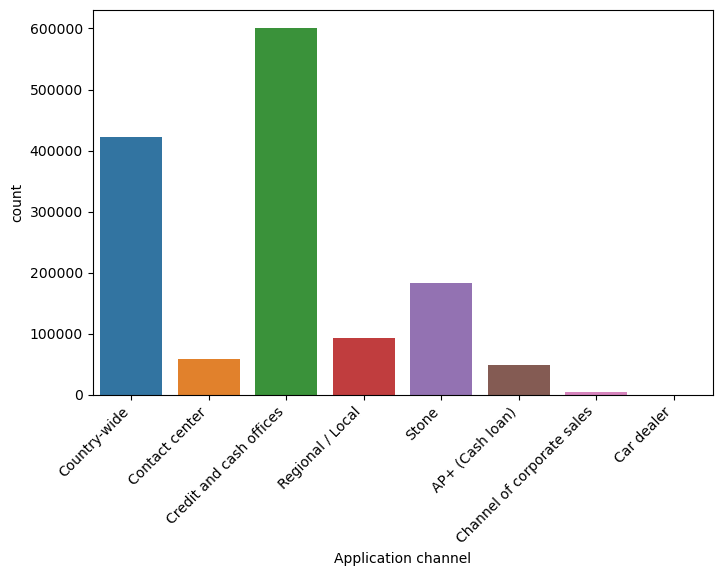

In [148]:
# Application Channel

plt.figure(figsize=(8,5))   
sns.countplot(x = 'CHANNEL_TYPE',data=df_merged)
plt.xticks(rotation = 45, horizontalalignment='right')
plt.xlabel('Application channel')
plt.show()

>Insights - 'Credit and Cash Offices' have higher number of counts.

> On Numerical variables

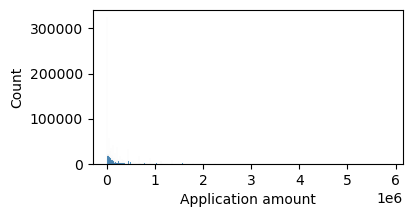

In [188]:
# Applied Loasn Amount

plt.figure(figsize=(4,2))
sns.histplot(df_merged['AMT_APPLICATION'])
plt.xlabel('Application amount')
plt.show()

>Insights - Most of the applications were the anount of below 2000000 as we see from the above distribution plot.

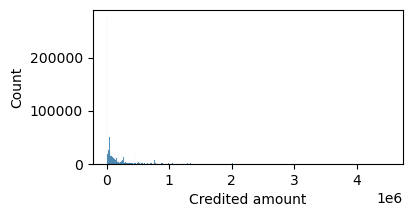

In [187]:
# Credit Loan Amount

plt.figure(figsize=(4,2))
sns.histplot(df_merged['AMT_CREDIT'])
plt.xlabel('Credited amount')
plt.show()

>Insights - The distribution of the credit amount of loan was mostly in 2000000 range.

<b> b) Bivariate Analysis

> Numerical Bivariate Analysis on Merged Dataset

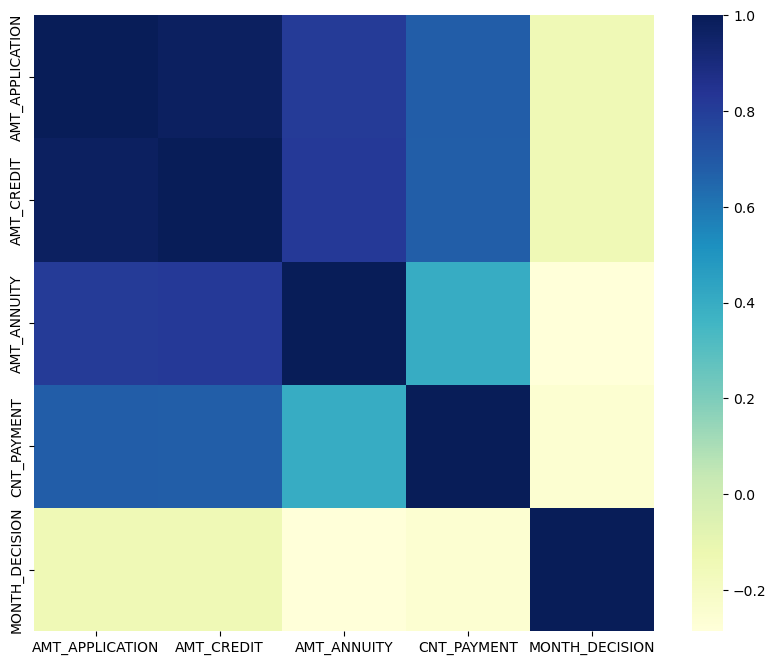

In [151]:
# Correlation matrix

# Listing few relevant columns for correlation analysis

corr_cols = ['AMT_APPLICATION','AMT_CREDIT','AMT_ANNUITY','CNT_PAYMENT','MONTH_DECISION']

# Creating dataframe for numerical columns

df_merged_corr = df_merged[corr_cols]

plt.figure(figsize=(10,8))
sns.heatmap(df_merged_corr.corr(),cmap="YlGnBu")
plt.show()

> Insights - 
1. Highly Corelate Columns -
    1. AMT_APPLICATION & AMT_CREDIT - 0.98
    2. AMT_APPLICATION & AMT_ANNUITY - 0.81
    3. AMT_CREDIT & AMT_ANNUITY - 0.82
2. Moderately Corelated Columns - 
    1. AMT_APPLICATION & CNT_PAYMENT - 0.68
    2. AMT_CREDIT & CNT_PAYMENT - 0.68

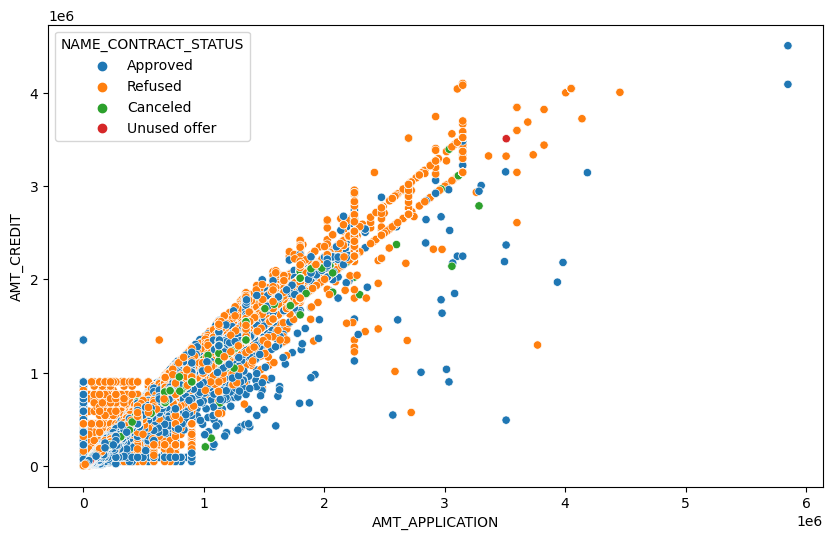

In [152]:
# Application Amount v/s Credited Amount

plt.figure(figsize=(10, 6))
sns.scatterplot(x='AMT_APPLICATION', y='AMT_CREDIT', hue='NAME_CONTRACT_STATUS', data=df_merged)
plt.show()


>Insights - 
1. The Amount Credited is increaded with respect to the Application Amount.
2. The 'Refused' and 'Approved' status of the Applications for the Credit amounts are more in number.
3. There is a higher concentration in the lesser amount of applications and lesser amount of Credit.

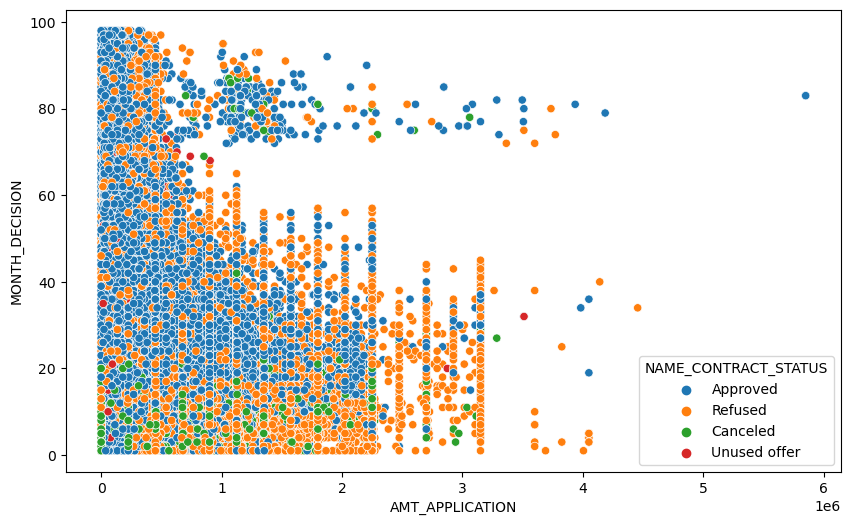

In [153]:
# Application Amount v/s Month Decision

plt.figure(figsize=(10,6))
sns.scatterplot(x='AMT_APPLICATION',y='MONTH_DECISION',hue='NAME_CONTRACT_STATUS', data=df_merged)
plt.show()

> Insights -
1. There is a higher concentration for lower Application amounts.
2. More the amount of Application loans, lesser the Months Decision.
3. Most of the higher amount of loan Application Decision is made in the recent time.

## <b> Categorical Bivariate Analysis on Merged Dataset

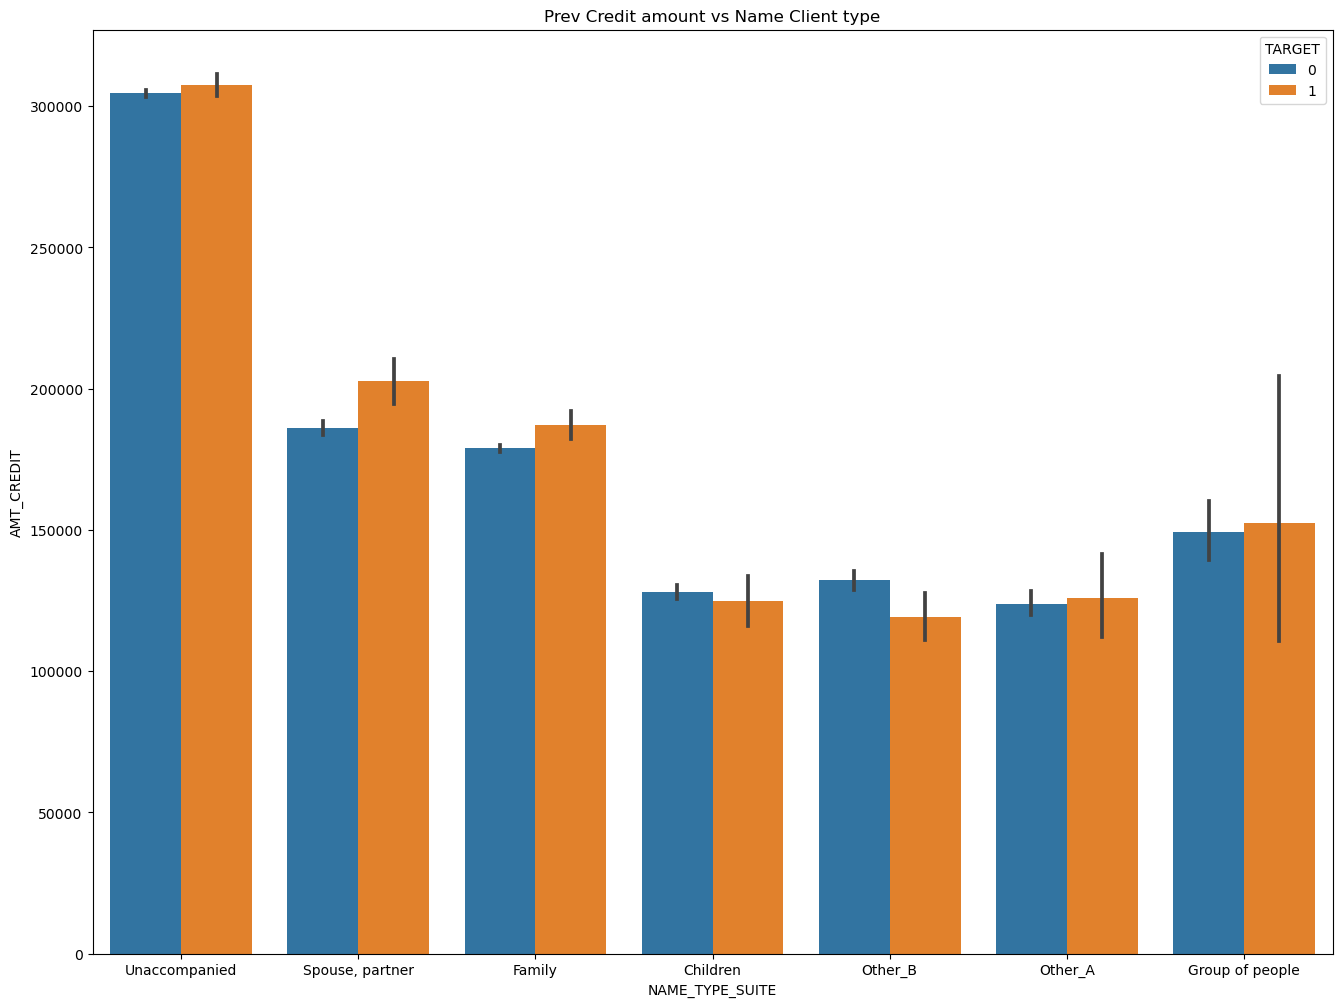

In [154]:
plt.figure(figsize=(16,12))
plt.xticks(rotation=360)
sns.barplot(data =df_merged, y='AMT_CREDIT',hue='TARGET',x='NAME_TYPE_SUITE')
plt.title('Prev Credit amount vs Name Client type')
plt.show()

> Insights - 
1. Clients who are 'Unaccompanied' have higher credit amounts for both targets (Target0 and Target1).
2. Clients with 'Children' and 'OtherB' have more number of target0 (non-defaulters) than target1.

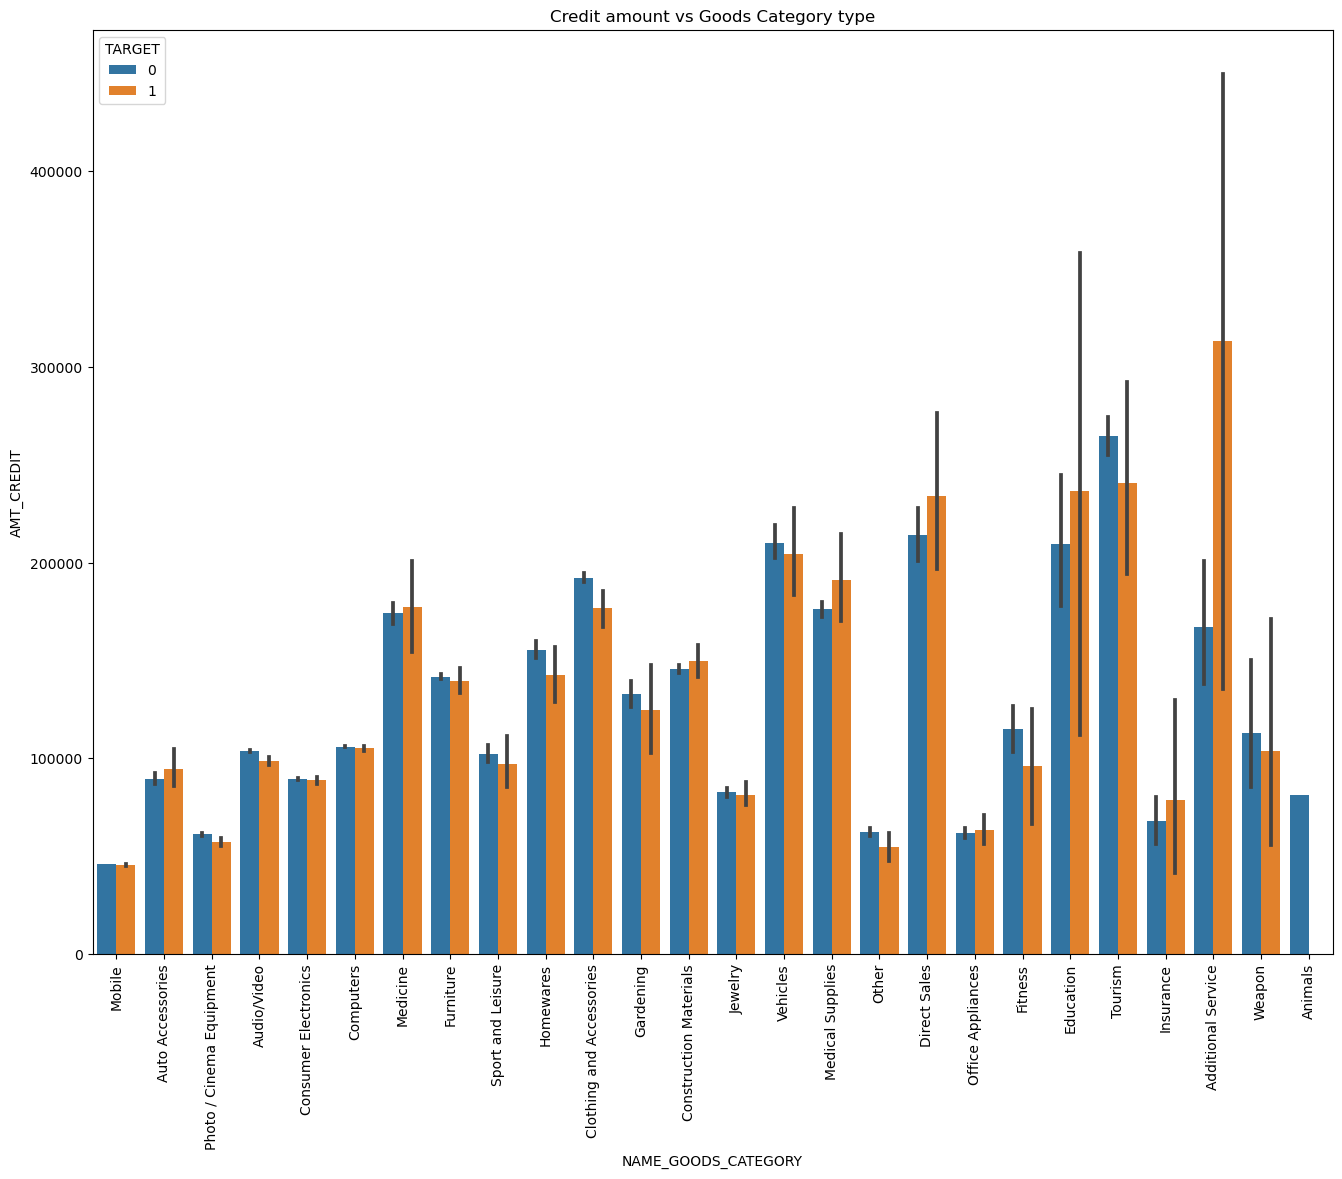

In [155]:
plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
sns.barplot(data =df_merged, y='AMT_CREDIT',hue='TARGET',x='NAME_GOODS_CATEGORY')
plt.title('Credit amount vs Goods Category type')
plt.show()

>Insights -
1. 'Additional Service' goods category has highest number of defaulted(target1) credit amount.
2. 'Tourism' goods category has highest non-defaulted (target0) credits.
3. 'Animals' has only non-defaulted credits.
4. 'Mobile' has the least number of target credits.

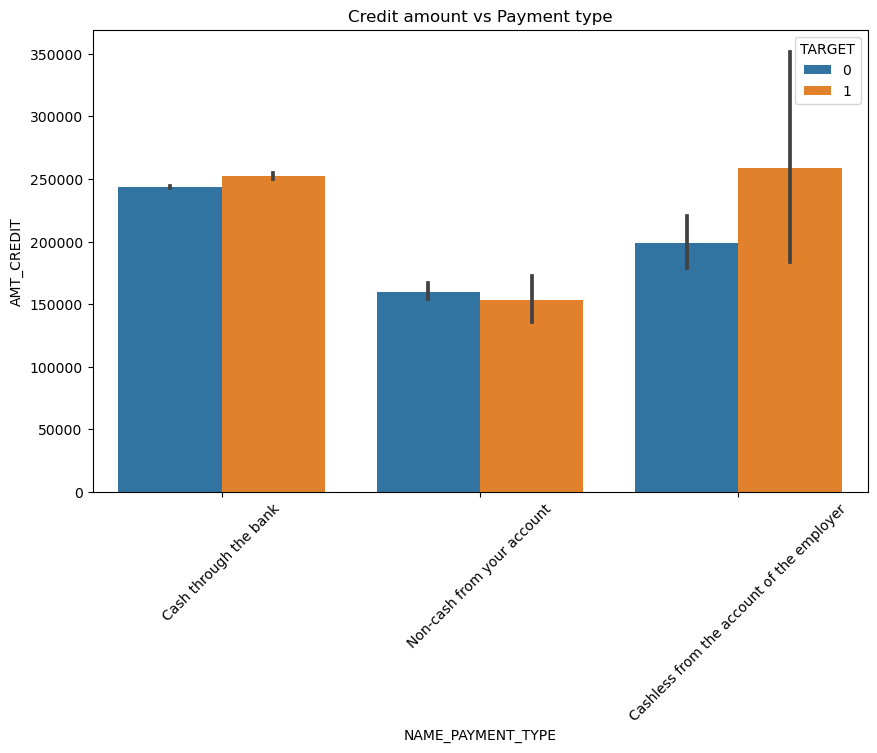

In [156]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=45)
sns.barplot(data =df_merged, y='AMT_CREDIT',hue='TARGET',x='NAME_PAYMENT_TYPE')
plt.title('Credit amount vs Payment type')
plt.show()

>Insights -
1. Only in 'Non-cash from your account' payment type has higher non-defaulter(target0) credits.
2. 'Cash through the bank' payment type has almost same number of credits for both targets.
3. 'Cashless from the account' ahs higher number of defaulter(target1) credits.

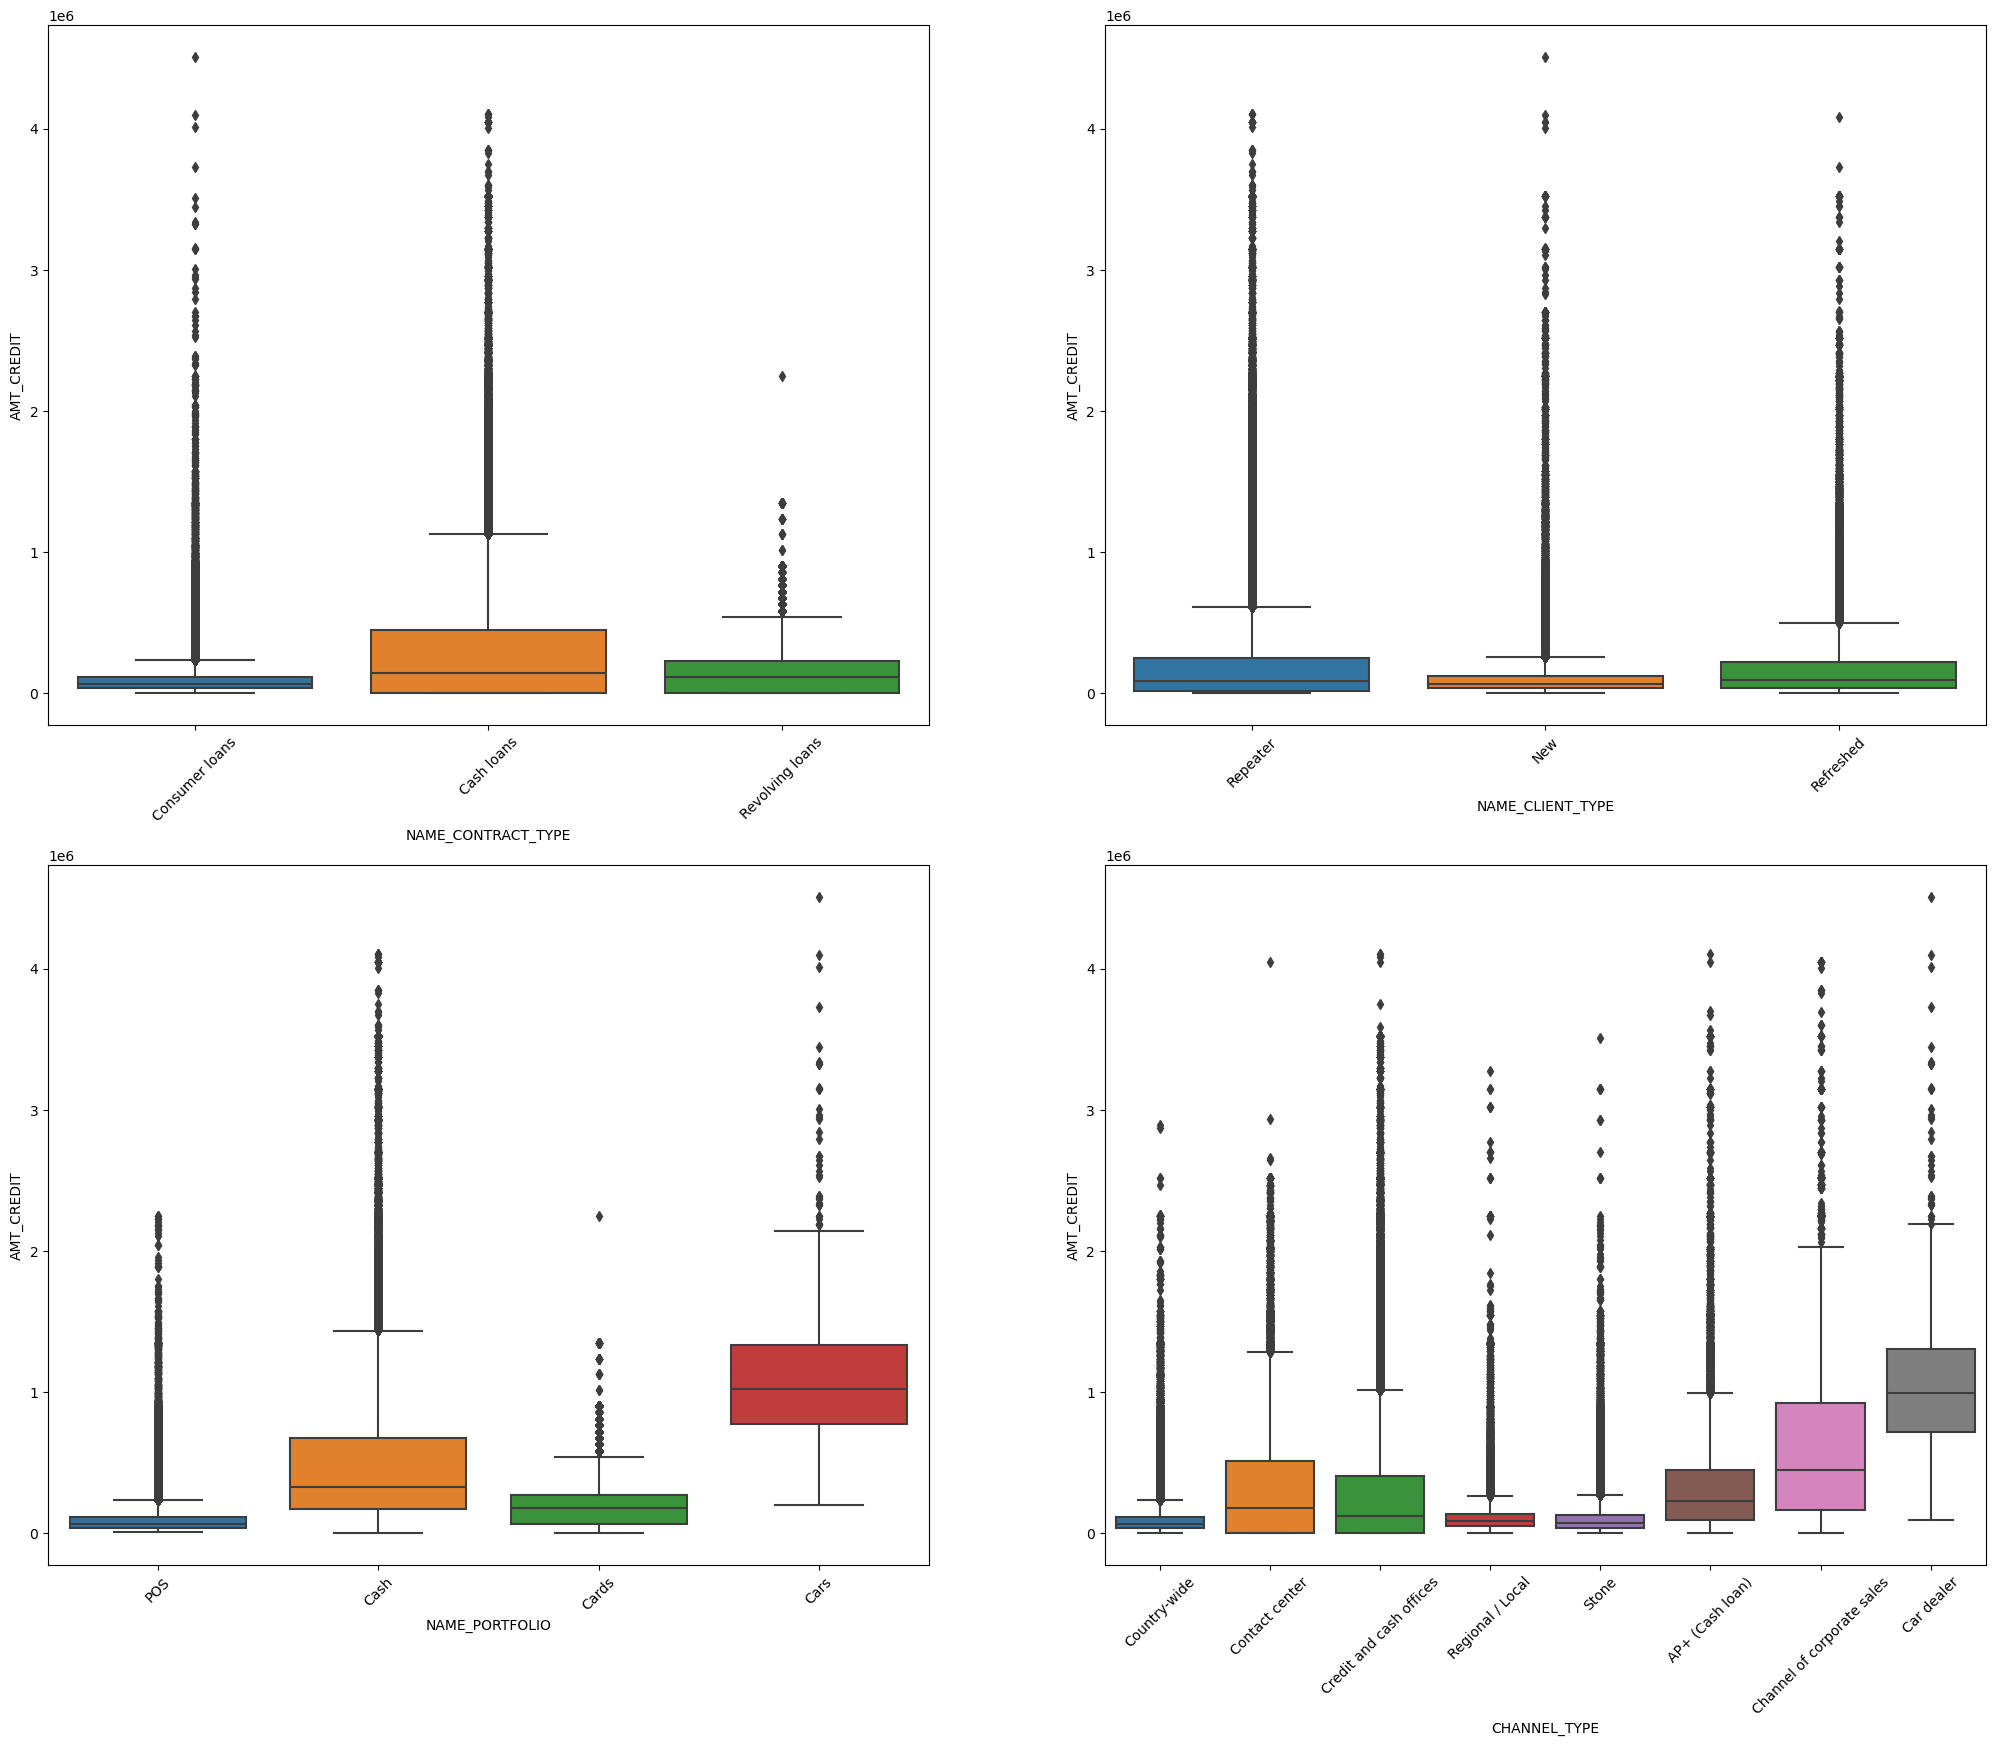

In [157]:
# Category list
categories = ['NAME_CONTRACT_TYPE','NAME_CLIENT_TYPE','NAME_PORTFOLIO','CHANNEL_TYPE']
plt.figure(figsize=(25,20))
k=0
for category in categories:
    k = k+1
    plt.subplot(2,2,k)
    sns.boxplot(x = category, y = 'AMT_CREDIT', data=df_merged)
    plt.xticks(rotation = 45)

>Insights - 
1. 'Cash Loans' are more credited than Consumer or Revolving loans.
2. 'Repeater' clients gets more amount of credit loans than other two.
3. 'Cars' portfolio has the highest credited amount and then 'Cash' portfolio has the second highest.
4. The Channel type 'Car Dealer' has the highest credit amount, followed by 'Channel of Corporate sales', 'Contact Center','Credit and Cash offices' and 'AP+(Cash Loan)'.

## <b> c) Two Segmented Variable Analysis

<Figure size 1200x600 with 0 Axes>

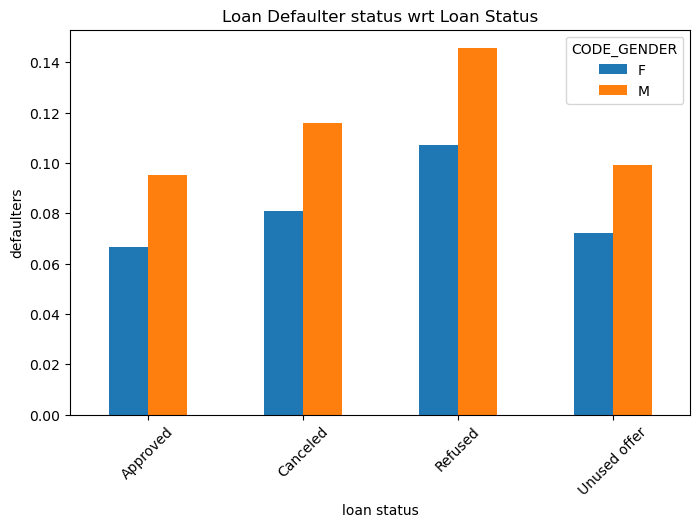

In [158]:
# Loan Defaulter status wrt Loan Status
# Convert 'TARGET' column to numeric
df_merged['TARGET'] = pd.to_numeric(df_merged['TARGET'], errors='coerce')
plt.figure(figsize=(12, 6))
df_merged.pivot_table(values='TARGET',index='NAME_CONTRACT_STATUS',columns='CODE_GENDER',aggfunc='mean').plot.bar(figsize=(8,5),rot=45)
plt.xlabel('loan status')
plt.ylabel('defaulters')
plt.title('Loan Defaulter status wrt Loan Status',fontsize=12)
plt.show()

>Insights - 
1. 'Refused' client is more defaulted than 'Approved' client.
2. 'Males' are more than 'Females'.

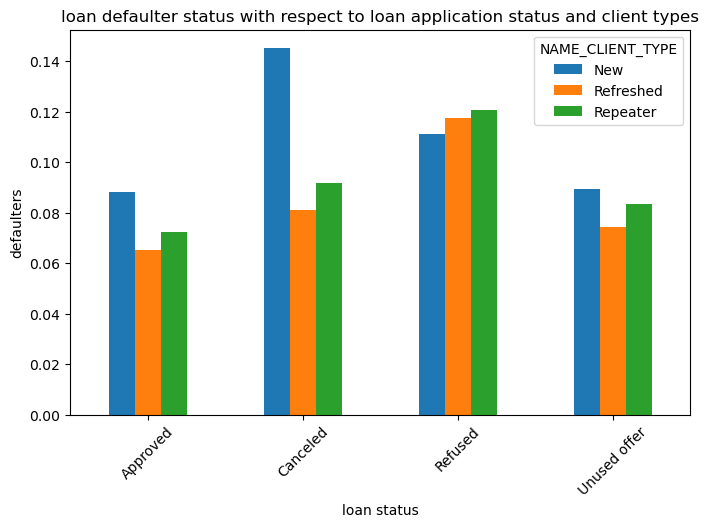

In [159]:
#loan defaulter status with respect to loan application status and client types

df_merged.pivot_table(values='TARGET',index='NAME_CONTRACT_STATUS',columns='NAME_CLIENT_TYPE',aggfunc='mean').plot.bar(figsize=(8,5),rot=45)
plt.xlabel('loan status')
plt.ylabel('defaulters')
plt.title('loan defaulter status with respect to loan application status and client types', fontsize=12)
plt.show()

>Insights - 
1. Defaulters are more for 'Cancelled' status with 'New' client type.
2. For 'Approved' status, the 'New' clients are more defaulted.
3. For 'Refused' status, the 'Repeater' clients are more defualted.
4. For 'Unused offer' status, the 'New' clients are more defaulted.

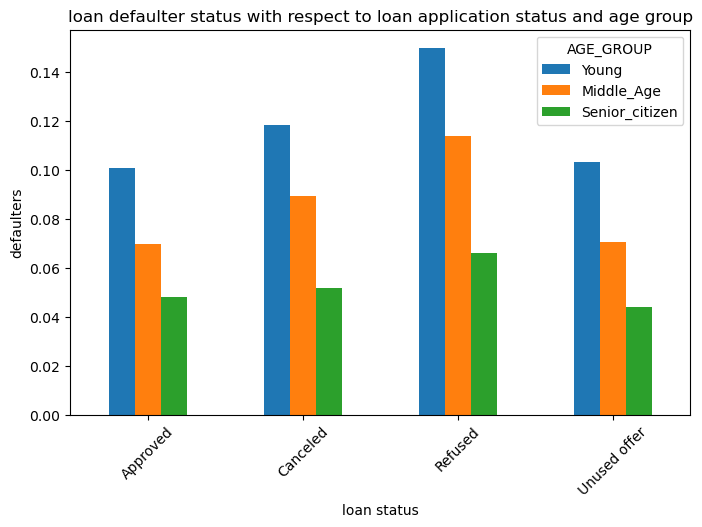

In [160]:
# loan defaulter status with respect to loan application status and age group
df_merged.pivot_table(values='TARGET',index='NAME_CONTRACT_STATUS',columns='AGE_GROUP',aggfunc='mean').plot.bar(figsize=(8,5),rot=45)
plt.xlabel('loan status')
plt.ylabel('defaulters')
plt.title('loan defaulter status with respect to loan application status and age group', fontsize=12)
plt.show()

>Insights -
1. For 'Approved', 'Cancelled', 'Refused' and 'Unused Offer' status, the 'Young' age group has the higher defaulters.
2. 'Refused' status has the highest defaulters with 'Young' age group.
3. 'Senior Citizen' age group has less defaulters.

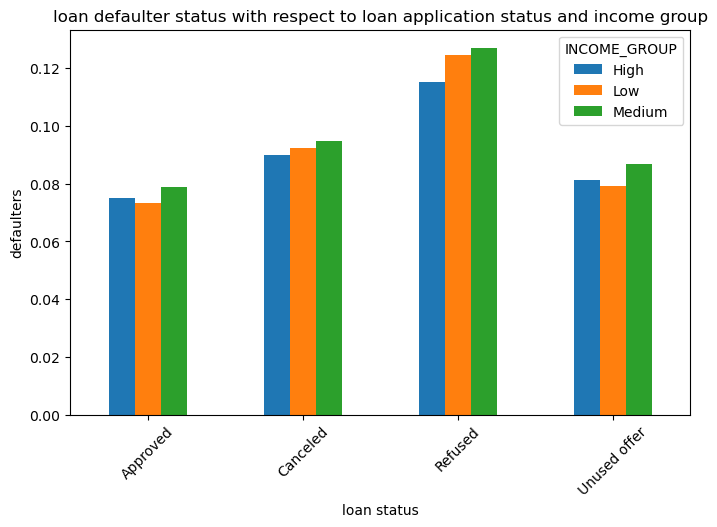

In [161]:
# loan defaulter status with respect to loan application status and income group

df_merged.pivot_table(values='TARGET',index='NAME_CONTRACT_STATUS',columns='INCOME_GROUP',aggfunc='mean').plot.bar(figsize=(8,5),rot=45)
plt.xlabel('loan status')
plt.ylabel('defaulters')
plt.title('loan defaulter status with respect to loan application status and income group', fontsize=12)
plt.show()

>Insights - 'Refused' has the highest defaulters with 'Medium' income group.

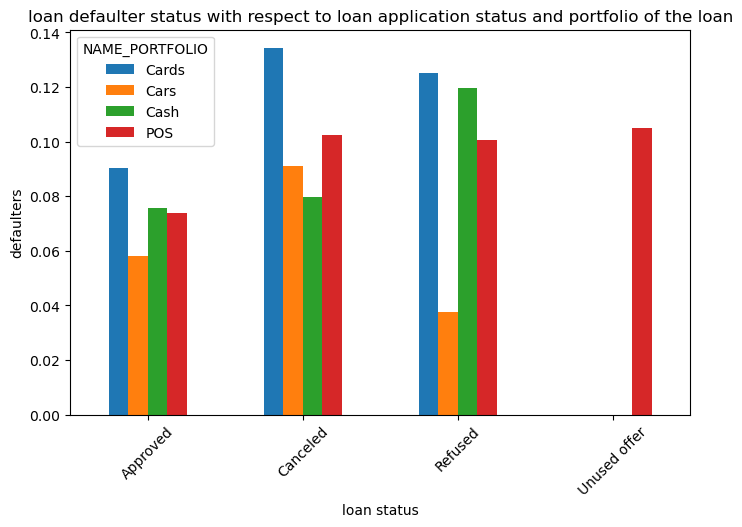

In [162]:
#loan defaulter status with respect to loan application status and portfolio of the loan

df_merged.pivot_table(values='TARGET',index='NAME_CONTRACT_STATUS',columns='NAME_PORTFOLIO',aggfunc='mean').plot.bar(figsize=(8,5),rot=45)
plt.xlabel('loan status')
plt.ylabel('defaulters')
plt.title('loan defaulter status with respect to loan application status and portfolio of the loan', fontsize=12)
plt.show()

>Insights - 
1. 'Cancelled' has the highest defaulters with 'Cards' potfolio.
2. For 'Refused' loan status, 'Cars' are less defaulted.
3. 'POS' for 'Approved' are less defaulted.

# <b> _Conclusion_

<b>Banks should focus less on the following groups as they have higher unsuccessful payments rate -</b>
1. Clients opting for cash Loans.
2. Clients with 'Secondary/Secondary Special' eduaction qualification.
3. Clients who are 'Working' and 'UnEmployed' Professionals.
4. Clients who are married.
5. Clients who are 'Young', especially with 'Low' Income.
6. Loan purposes with 'Repairs' have more rejections.
7. Clients whose loans have been 'Refused', 'Cancelled'.


<b>The following have successful payment rates and highly recommended groups - </b>
1. Clients with 'Approved Consumer' loans
2. The Approval rates are higher on Saturdays
3. Clients with children
4. 'Tourism' goods category have highest success payment rate.
5. 'Non-cash' payment type has higher payment success.
6. 'Senior Citizen' age group have the most success payments.

<b>Top Major variables to consider for loan prediction before approving application to minimize risk of loss:</b>
1. NAME_EDUCATION_TYPE
2. AMT_INCOME_TOTAL
3. DAYS_BIRTH
4. AMT_CREDIT
5. DAYS_EMPLOYED
6. AMT_ANNUITY
7. NAME_INCOME_TYPE
8. CODE_GENDER
